In [15]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import signal
import matplotlib.ticker as ticker
import matplotlib.font_manager as fm
#import seaborn as sns; sns.set()

datas = ['mini_test', 'crop','euro', 'isic', 'chest']
datas_fg = ["cars", 'cub', "places", "plantae", 'tiered_test']
datas_full = ['miniIN', 'CropDiseases', 'EuroSAT', 'ISIC', 'ChestX', "Cars", "CUB", "Places", "Plantae", "tieredIN"]
plt.rcParams['font.family'] = 'Times New Roman'
 

def fmt(x, pos):
    return '{}%'.format(int(x))

# print(mpl.matplotlib_fname())
# print(mpl.get_cachedir())

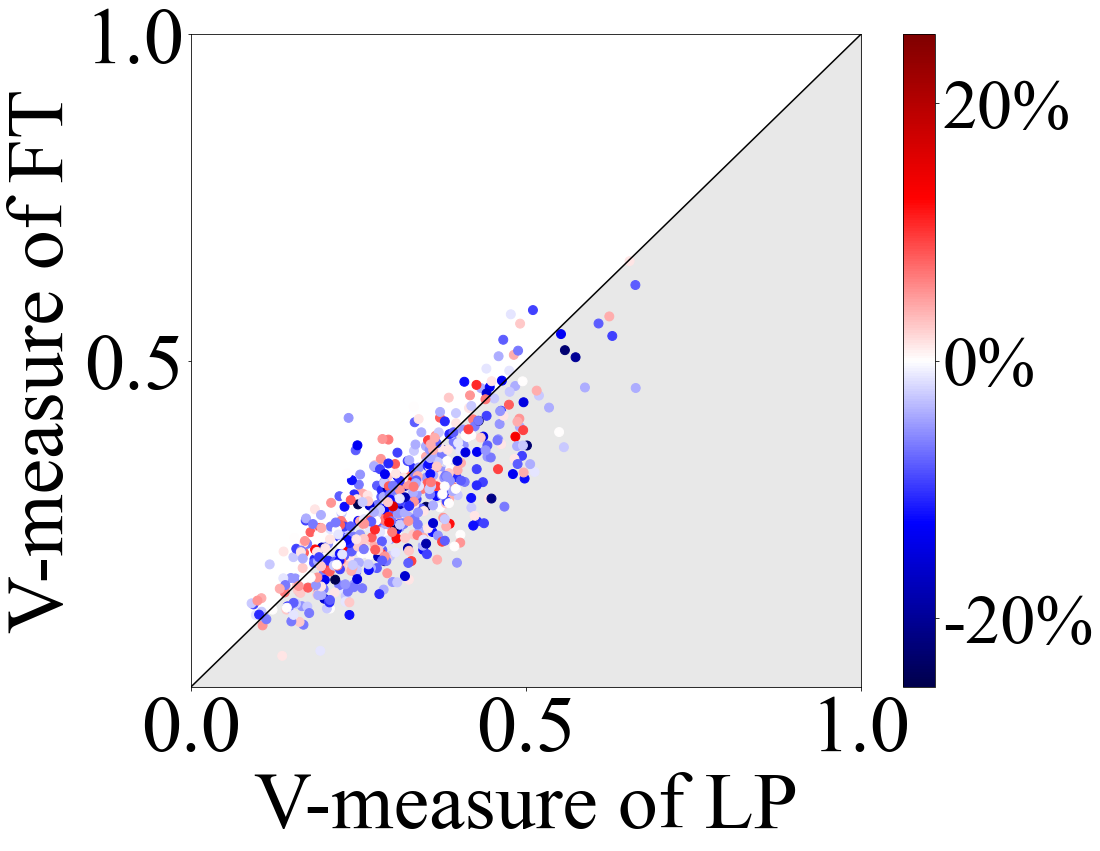

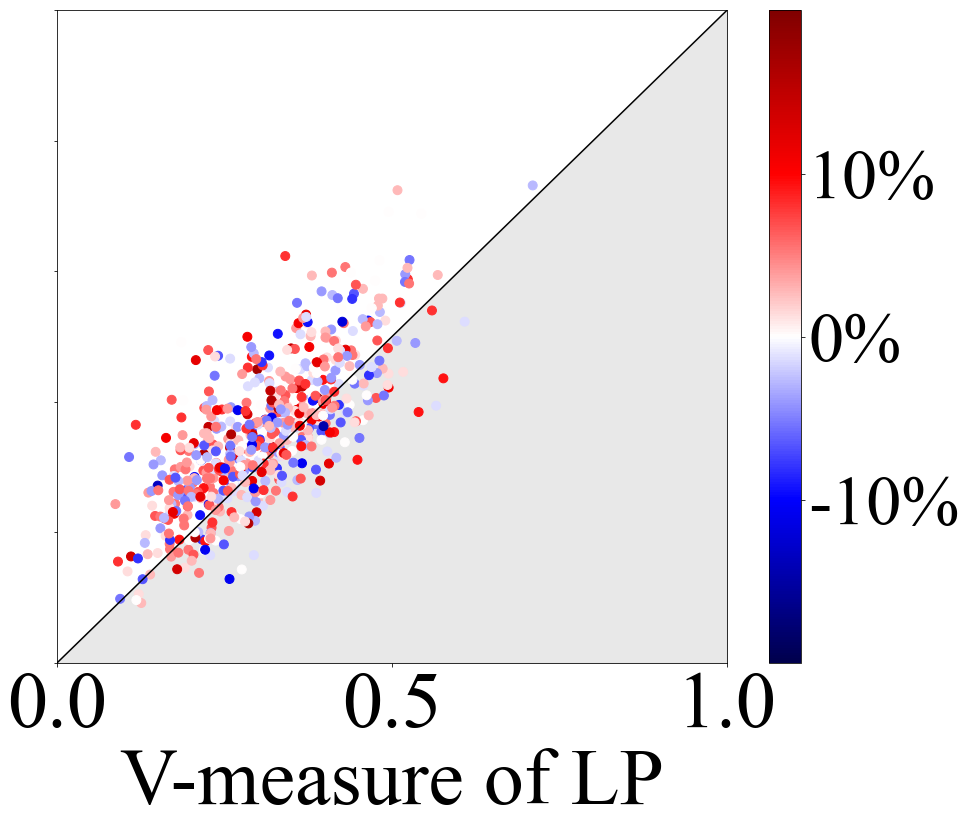

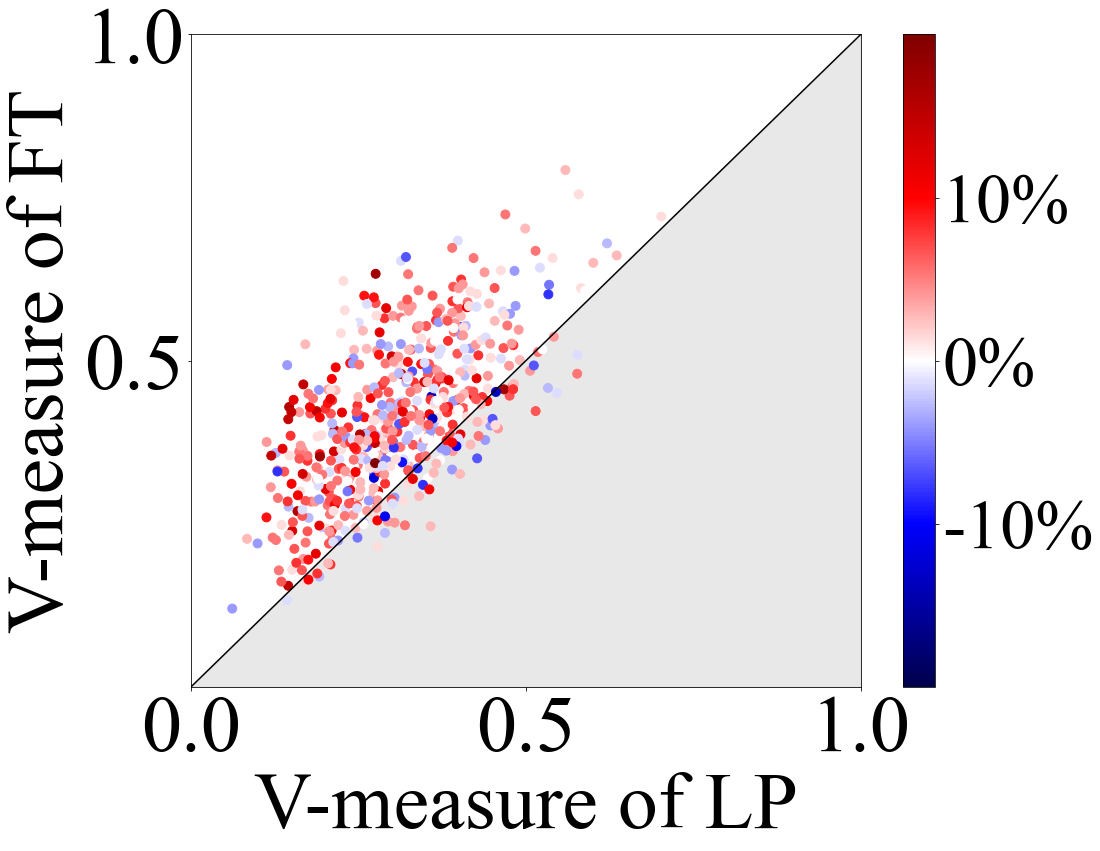

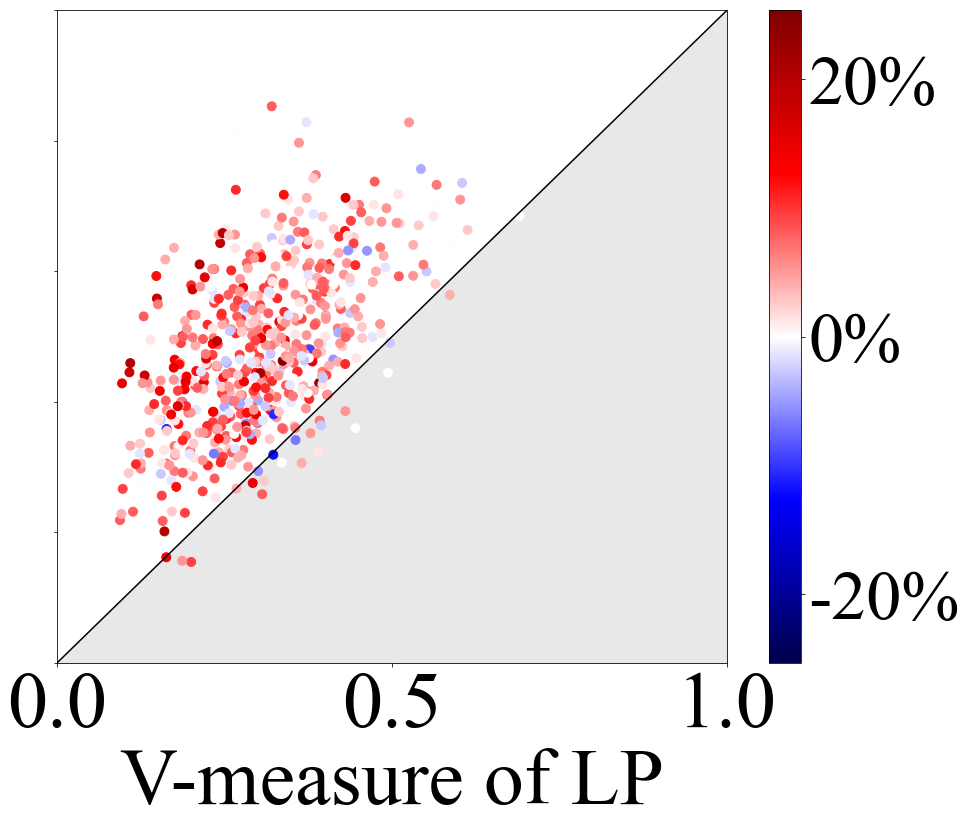

In [16]:
# main CUB
for idx, data in enumerate(['01shot', '05shot', '10shot', '20shot']):
    fig, ax1 = plt.subplots(figsize = (15, 12))
    v_score = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/cub/05way_0{}_full_default/v_score_query.csv'.format(data), index_col='Unnamed: 0')
    v_score_0 = v_score.loc[:,'epoch0']
    v_score_f = v_score.iloc[:,-1]
    test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/cub/05way_0{}_full_default/test_history.csv'.format(data), index_col='Unnamed: 0')
    test_acc_h = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/cub/05way_0{}_head_default/test_history.csv'.format(data), index_col='Unnamed: 0')
    acc = (test_acc.iloc[:,-1] - test_acc_h.iloc[:,-1])*100
    abs_max = max(max(acc), -min(acc))
    plt.plot([0, 1], [0, 1], color="black")
    plt.fill_between([0,1], [0,1], alpha=0.5, color="lightgray")
    plt.scatter(v_score_0, v_score_f, s = 80, c = acc, cmap = 'seismic', vmin=-abs_max, vmax=abs_max)
    plt.xlim([0,1])
    plt.ylim([0,1])
    
    plt.xticks(np.arange(0, 1.2, 0.5), size = 80)
    if data == '01shot' or data=='10shot':
        plt.yticks(np.arange(0.5, 1.2, 0.5), size = 80)
        plt.ylabel("V-measure of FT", size = 80)
    else:
        plt.yticks(color='w')
    # if data == 'places' or data=='euro':
    plt.xlabel("V-measure of LP", size = 80)
    cbar = plt.colorbar(format=ticker.FuncFormatter(fmt))
    cbar.ax.tick_params(labelsize=70)
    #plt.title("CUB (k={})".format(int(data[:2])), position=(0.5, 10), fontsize = 100)
    plt.savefig('./img_pdf/v_score_plot/cub_{}_main.pdf'.format(data), bbox_inches='tight', format='pdf')

KeyError: 'epoch0'

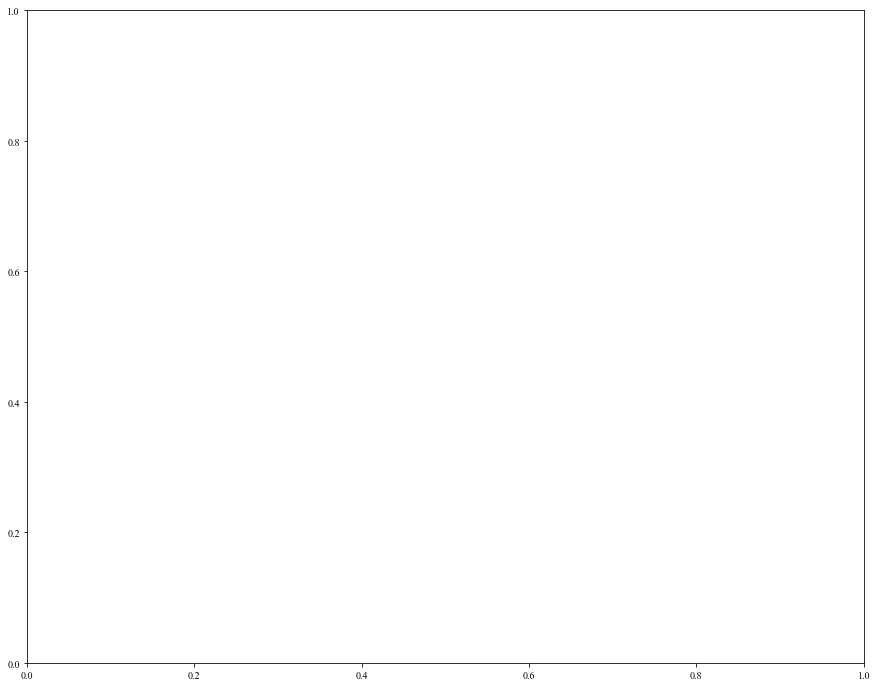

In [26]:
# 10shot 
for idx, data in enumerate(datas+datas_fg):
    fig, ax1 = plt.subplots(figsize = (15, 12))
    v_score = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/v_score_query.csv'.format(data), index_col='Unnamed: 0')
    v_score_0 = v_score.loc[:,'epoch0']
    v_score_f = v_score.iloc[:,-1]
    test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/test_history.csv'.format(data), index_col='Unnamed: 0')
    test_acc_h = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_history.csv'.format(data), index_col='Unnamed: 0')
    acc = (test_acc.iloc[:,-1] - test_acc_h.iloc[:,-1])*100
    abs_max = max(max(acc), -min(acc))
    plt.plot([0, 1], [0, 1], color="black")
    plt.fill_between([0,1], [0,1], alpha=0.5, color="lightgray")
    plt.scatter(v_score_0, v_score_f, s = 80, c = acc, cmap = 'seismic', vmin=-abs_max, vmax=abs_max)
    plt.xlim([0,1])
    plt.ylim([0,1])
    
    plt.xticks(np.arange(0, 1.2, 0.5), size = 80)
    if data == 'd':
        plt.yticks(np.arange(0.5, 1.2, 0.5), size = 80)
        plt.ylabel("V-measure of FT", size = 80)
    else:
        plt.yticks(color='w')
    # if data == 'places' or data=='euro':
    plt.xlabel("V-measure of LP", size = 80)
    cbar = plt.colorbar(format=ticker.FuncFormatter(fmt))
    cbar.ax.tick_params(labelsize=70) 
    plt.title(datas_full[idx]+" (k=1)", position=(0.5, 10), fontsize = 100)
    plt.savefig('./img_pdf/v_score_plot/mini/1shot_{}.pdf'.format(data), bbox_inches='tight', format='pdf')

### Query V-score

In [838]:
len(v_score_s.columns)

357

In [954]:
for data in datas_fg+datas:
    for shot in ['05shot', '20shot']:
        path_0 = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_full_default/v_score_support_0.csv'.format(data, shot)
        path = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_full_default/v_score_support.csv'.format(data, shot)
        v_0 = pd.read_csv(path_0, index_col='Unnamed: 0')
        v = pd.read_csv(path, index_col='Unnamed: 0')
        if len(v.columns) == 357:
            v = v.iloc[:,:100]
        v_concat = pd.concat([v_0, v], axis = 1)
        if len(v_concat.columns) == 101: v_concat.to_csv(path)
        
        else: continue

In [747]:
for data in datas:
    for shot in ['01shot', '05shot']:
        path_0 = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_full_default/mixup/both/v_score_query_0.csv'.format(data, shot)
        path = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_full_default/mixup/both/v_score_query.csv'.format(data, shot)
        v_0 = pd.read_csv(path_0, index_col='Unnamed: 0')
        v = pd.read_csv(path, index_col='Unnamed: 0')
        v_concat = pd.concat([v_0, v], axis = 1)
        if len(v_concat.columns) == 101: v_concat.to_csv(path)
        else: continue

In [726]:
v_score_f.iloc[]

epoch0    epoch1    epoch2    epoch3    epoch4    epoch5    epoch6  \
1    0.688921  0.669463  0.653895  0.685080  0.598477  0.650449  0.710882   
2    0.718277  0.608787  0.722085  0.563220  0.552053  0.613294  0.631616   
3    0.748883  0.753241  0.690518  0.829956  0.708338  0.747780  0.765743   
4    0.737541  0.728991  0.754029  0.744053  0.769768  0.653818  0.695474   
5    0.655745  0.761450  0.627250  0.648319  0.664503  0.679262  0.629652   
..        ...       ...       ...       ...       ...       ...       ...   
596  0.584001  0.487217  0.547386  0.544262  0.525366  0.379965  0.584658   
597  0.443067  0.501391  0.428804  0.472174  0.495274  0.545293  0.410577   
598  0.603423  0.540829  0.438209  0.664613  0.588645  0.509296  0.503572   
599  0.595490  0.520028  0.566835  0.555568  0.548571  0.565862  0.597301   
600  0.674953  0.575010  0.561371  0.722167  0.540041  0.533191  0.597209   

       epoch7    epoch8    epoch9  ...   epoch91   epoch92   epoch93  \
1    0.679440  0.708043  0.508815  ...  0.644178  0.657071  0.573726   
2    0.523388  0.573460  0.660093  ...  0.540390  0.630812  0.600703   
3    0.737843  0.719732  0.679353  ...  0.666756  0.797525  0.639253   
4    0.728972  0.651664  0.589924  ...  0.564853  0.601192  0.492315   
5    0.681159  0.671358  0.675839  ...  0.606170  0.688808  0.655353   
..        ...       ...       ...  ...       ...       ...       ...   
596  0.477417  0.568625  0.504002  ...  0.438222  0.420033  0.433196   
597  0.468017  0.325775  0.359030  ...  0.428480  0.450433  0.407287   
598  0.568928  0.498247  0.520940  ...  0.423979  0.488504  0.441349   
599  0.485299  0.506011  0.468419  ...  0.443146  0.344256  0.476362   
600  0.541389  0.569359  0.558592  ...  0.458070  0.533315  0.528408   

      epoch94   epoch95   epoch96   epoch97   epoch98   epoch99  epoch100  
1    0.535591  0.718510  0.589523  0.679045  0.645810  0.542646  0.587881  
2    0.656093  0.617380  0.633560  0.606896  0.675389  0.593326  0.621275  
3    0.641390  0.665071  0.635938  0.761396  0.700973  0.736518  0.769680  
4    0.646897  0.624733  0.666198  0.560125  0.553959  0.590921  0.598454  
5    0.633492  0.644708  0.568132  0.641237  0.626741  0.579437  0.783678  
..        ...       ...       ...       ...       ...       ...       ...  
596  0.384251  0.490394  0.416501  0.449862  0.572263  0.420576  0.379658  
597  0.438695  0.411912  0.402099  0.488289  0.385419  0.398403  0.380565  
598  0.473084  0.531042  0.417971  0.507747  0.367908  0.357660  0.386346  
599  0.514374  0.453016  0.422719  0.443383  0.520174  0.450792  0.552248  
600  0.561687  0.630810  0.438818  0.603841  0.499079  0.572256  0.601900  

[600 rows x 101 columns]

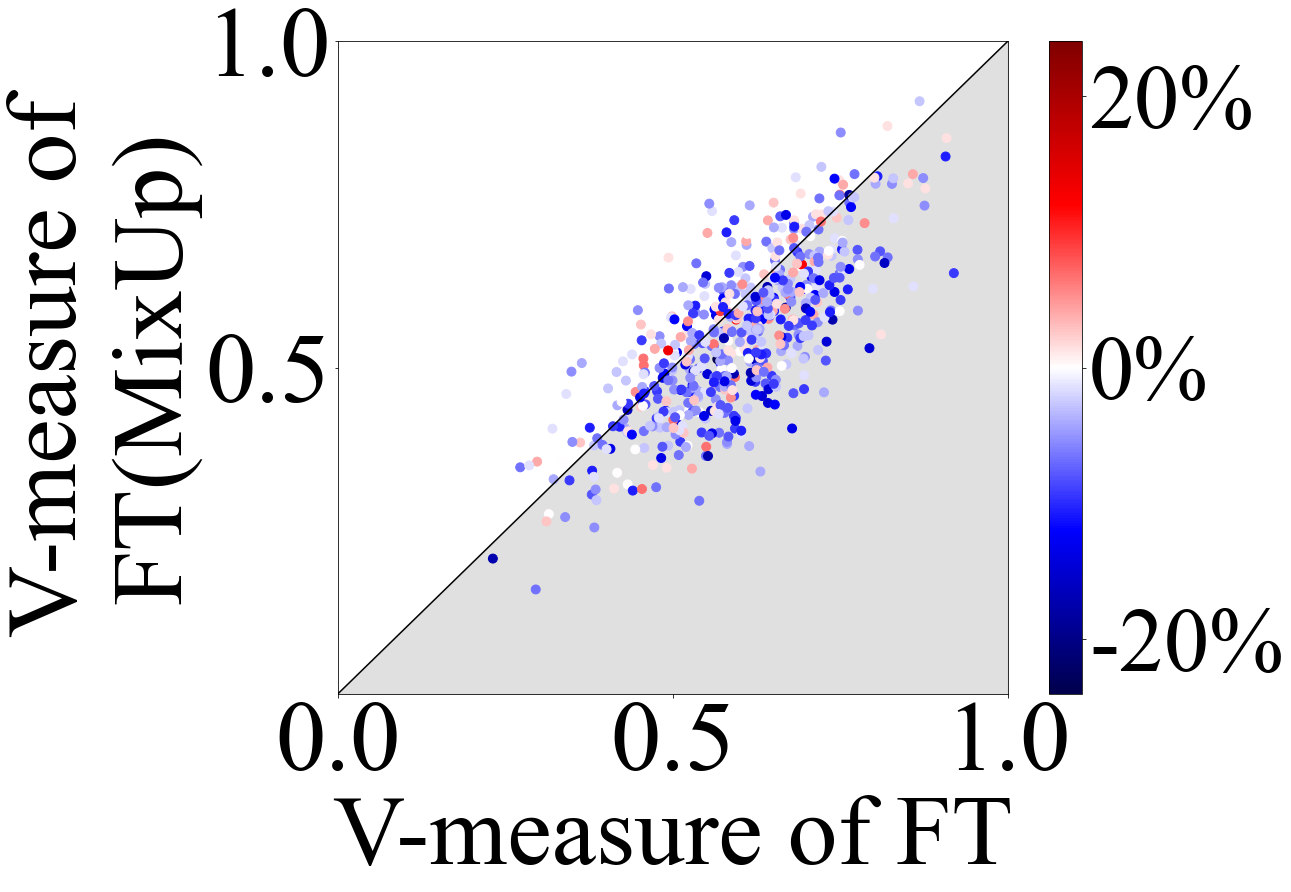

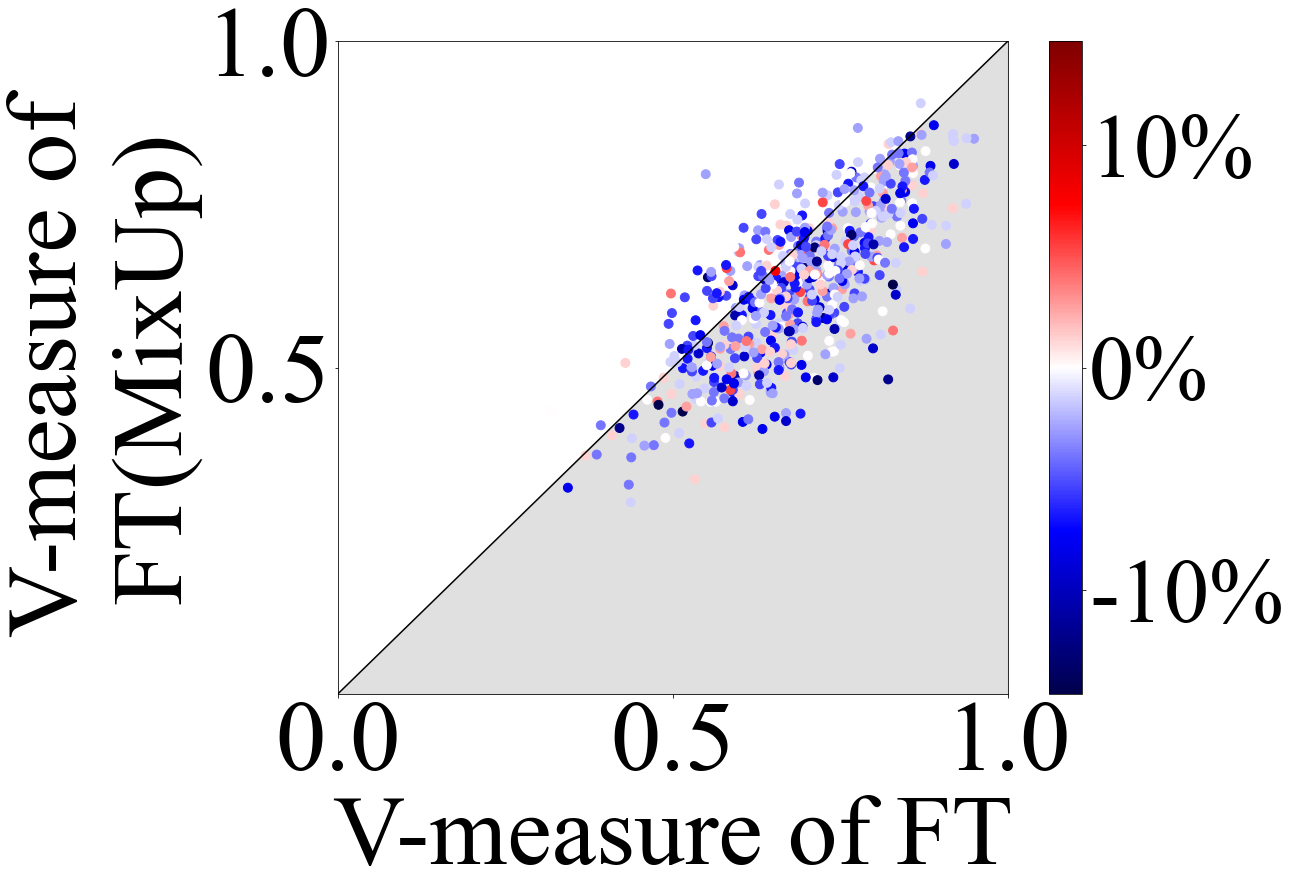

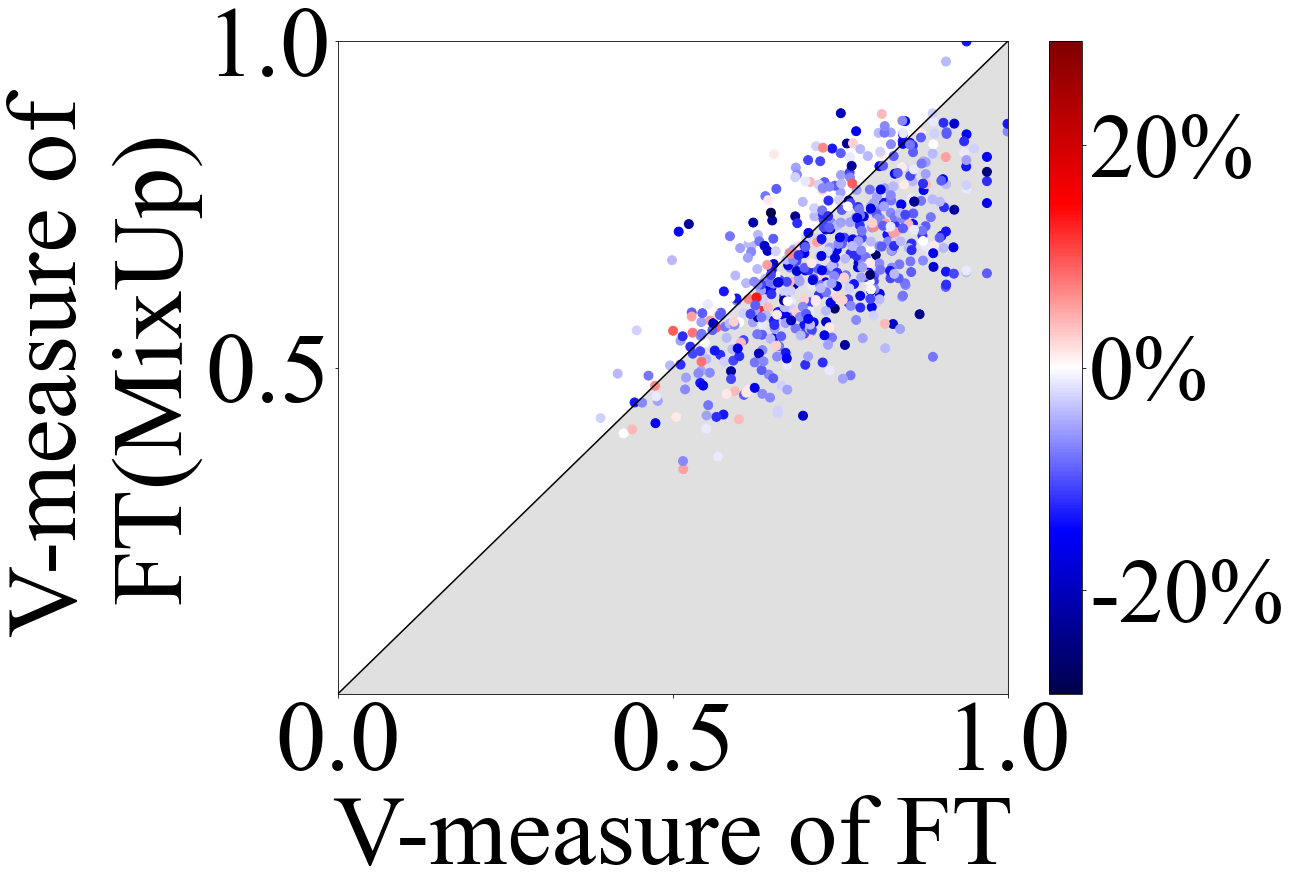

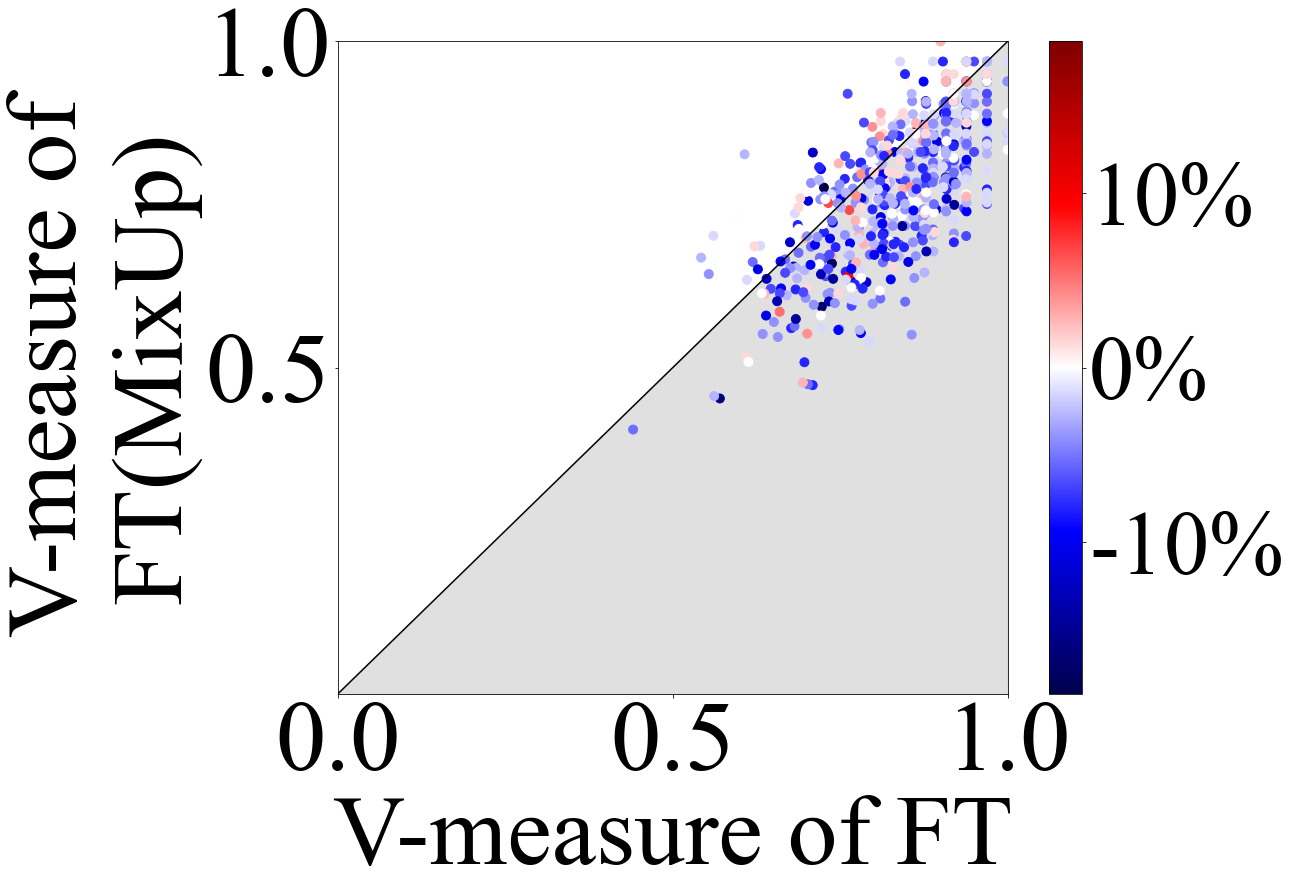

In [996]:
# main mixup
for data in ['mini_test', 'euro']:
    for shot in ['05shot','20shot']:
        fig, ax1 = plt.subplots(figsize = (15, 12))
        v_score_m= pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_full_default/mixup/both/v_score_query.csv'.format(data,shot), index_col='Unnamed: 0')
        v_score_f = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_full_default/v_score_query.csv'.format(data,shot), index_col='Unnamed: 0')
        v_score_f = v_score_f.iloc[:,-1]
        v_score_m = v_score_m.iloc[:,-1]
        test_acc_m = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_full_default/mixup/both/test_history.csv'.format(data, shot), index_col='Unnamed: 0')
        test_acc_f = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_0{}_full_default/test_history.csv'.format(data, shot), index_col='Unnamed: 0')
        acc = (test_acc_m.iloc[:,-1] - test_acc_f.iloc[:,-1])*100
        abs_max = max(max(acc), -min(acc))
        plt.plot([0, 1], [0, 1], color="black")
        plt.fill_between([0,1], [0,1], alpha=0.7, color="lightgray")
        #plt.fill_between([0,0.5, 1], [1,1,1], [0,0.5,1], alpha=1, color="lightgray")
        plt.scatter(v_score_f, v_score_m, s = 80, c = acc, cmap = 'seismic', vmin=-abs_max, vmax=abs_max)
        plt.xlim([0,1])
        plt.ylim([0,1]) 

        plt.xticks(np.arange(0, 1.2, 0.5), size = 100)
        plt.yticks(np.arange(0.5, 1.2, 0.5), size = 100)
        plt.ylabel("V-measure of\nFT(MixUp)", size = 100)
        plt.xlabel("V-measure of FT", size = 100)
        cbar = plt.colorbar(format=ticker.FuncFormatter(fmt))
        cbar.ax.tick_params(labelsize=90) 
        #plt.title(data+" (k=1)", position=(0.5, 10), fontsize = 100)
        plt.savefig('./img_pdf/v_score_plot/{}_{}_mixup.pdf'.format(shot,data), bbox_inches='tight', format='pdf')

In [ ]:
# mixup 5shot
for idx, data in enumerate(datas+datas_fg):
    fig, ax1 = plt.subplots(figsize = (15, 12))
    v_score_m= pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/mixup/both/v_score_query.csv'.format(data), index_col='Unnamed: 0')
    v_score_f = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/v_score_query.csv'.format(data), index_col='Unnamed: 0')
    v_score_f = v_score_f.iloc[:,-1]
    v_score_m = v_score_m.iloc[:,-1]
    test_acc_m = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/mixup/both/test_history.csv'.format(data), index_col='Unnamed: 0')
    test_acc_f = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/test_history.csv'.format(data), index_col='Unnamed: 0')
    acc = (test_acc_m.iloc[:,-1] - test_acc_f.iloc[:,-1])*100
    abs_max = max(max(acc), -min(acc))
    plt.plot([0, 1], [0, 1], color="black")
    plt.fill_between([0,1], [0,1], alpha=0.5, color="lightgray")
    plt.scatter(v_score_f, v_score_m, s = 80, c = acc, cmap = 'seismic', vmin=-abs_max, vmax=abs_max)
    plt.xlim([0,1])
    plt.ylim([0,1]) 
    
    plt.xticks(np.arange(0, 1.2, 0.5), size = 90)
    plt.yticks(np.arange(0.5, 1.2, 0.5), size = 90)

    if data == 'mini_test' or data=="cub":
        plt.ylabel("V-measure of\nFT(MixUp)", size = 100)
    plt.xlabel("V-measure of FT", size = 100)
    cbar = plt.colorbar(format=ticker.FuncFormatter(fmt))
    cbar.ax.tick_params(labelsize=90) 
    #plt.title(data+" (k=1)", position=(0.5, 10), fontsize = 100)
    plt.title(datas_full[idx]+" (k=5)", loc='center', fontsize = 90)
    plt.savefig('./img_pdf/v_score_plot/mixup/5shot_{}_mixup.pdf'.format(data), bbox_inches='tight', format='pdf')

In [782]:
v_score_f

1      0.564556
2      0.732529
3      0.738377
4      0.673951
5      0.725569
         ...   
596         NaN
597         NaN
598         NaN
599         NaN
600         NaN
Name: epoch100, Length: 600, dtype: float64

In [789]:
test_acc_f

epoch1    epoch2    epoch3    epoch4    epoch5    epoch6    epoch7  \
1    0.306667  0.506667  0.773333  0.840000  0.880000  0.933333  0.973333   
2    0.600000  0.786667  0.906667  0.933333  0.960000  0.960000  0.986667   
3    0.320000  0.400000  0.760000  0.893333  0.893333  0.946667  0.946667   
4    0.520000  0.773333  0.906667  0.973333  1.000000  0.973333  1.000000   
5    0.386667  0.560000  0.760000  0.920000  0.880000  0.853333  0.920000   
..        ...       ...       ...       ...       ...       ...       ...   
596  0.293333  0.426667  0.813333  0.826667  0.826667  0.880000  0.866667   
597  0.533333  0.773333  0.906667  0.973333  0.986667  0.986667  0.986667   
598  0.320000  0.440000  0.853333  0.986667  1.000000  1.000000  1.000000   
599  0.400000  0.680000  0.813333  0.880000  0.880000  0.880000  0.920000   
600  0.200000  0.333333  0.640000  0.746667  0.826667  0.853333  0.866667   

       epoch8    epoch9   epoch10  ...   epoch91   epoch92   epoch93  \
1    0.986667  0.986667  0.986667  ...  1.000000  0.986667  0.986667   
2    1.000000  0.986667  1.000000  ...  1.000000  1.000000  1.000000   
3    0.946667  0.946667  0.946667  ...  0.973333  0.973333  0.973333   
4    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
5    0.933333  0.960000  0.946667  ...  0.986667  0.986667  0.986667   
..        ...       ...       ...  ...       ...       ...       ...   
596  0.866667  0.880000  0.853333  ...  0.946667  0.946667  0.946667   
597  0.986667  0.986667  0.986667  ...  0.986667  0.986667  0.986667   
598  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
599  0.920000  0.946667  0.960000  ...  0.960000  0.960000  0.960000   
600  0.853333  0.853333  0.853333  ...  0.906667  0.933333  0.906667   

      epoch94   epoch95   epoch96   epoch97   epoch98   epoch99  epoch100  
1    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
2    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  0.986667  
3    0.973333  0.973333  0.973333  0.973333  0.973333  0.973333  0.973333  
4    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
5    0.986667  0.986667  0.986667  0.986667  0.986667  0.986667  0.986667  
..        ...       ...       ...       ...       ...       ...       ...  
596  0.960000  0.973333  0.973333  0.973333  0.973333  0.973333  0.973333  
597  1.000000  0.986667  0.986667  1.000000  0.986667  0.986667  0.986667  
598  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
599  0.960000  0.960000  0.960000  0.960000  0.960000  0.960000  0.960000  
600  0.906667  0.893333  0.880000  0.893333  0.906667  0.893333  0.893333  

[600 rows x 100 columns]

In [788]:
test_acc_m

epoch1    epoch2    epoch3    epoch4    epoch5    epoch6    epoch7  \
1    0.360000  0.493333  0.920000  0.973333  0.906667  0.946667  0.960000   
2    0.360000  0.626667  0.733333  0.800000  0.826667  0.880000  0.920000   
3    0.280000  0.533333  0.706667  0.786667  0.840000  0.920000  0.933333   
4    0.360000  0.733333  0.760000  0.826667  0.960000  0.973333  1.000000   
5    0.426667  0.520000  0.666667  0.813333  0.813333  0.813333  0.813333   
..        ...       ...       ...       ...       ...       ...       ...   
596  0.360000  0.573333  0.746667  0.813333  0.906667  0.893333  0.853333   
597  0.266667  0.533333  0.693333  0.893333  0.893333  0.960000  0.986667   
598  0.386667  0.573333  0.800000  0.906667  0.973333  0.986667  0.986667   
599  0.213333  0.426667  0.773333  0.840000  0.880000  0.906667  0.933333   
600  0.240000  0.306667  0.640000  0.813333  0.813333  0.800000  0.826667   

       epoch8    epoch9   epoch10  ...   epoch91   epoch92   epoch93  \
1    0.973333  0.973333  0.973333  ...  1.000000  1.000000  1.000000   
2    0.946667  0.920000  0.946667  ...  0.973333  1.000000  1.000000   
3    0.946667  0.946667  0.946667  ...  0.973333  0.973333  0.973333   
4    0.986667  0.986667  0.986667  ...  1.000000  1.000000  1.000000   
5    0.880000  0.933333  0.933333  ...  0.986667  0.960000  0.960000   
..        ...       ...       ...  ...       ...       ...       ...   
596  0.853333  0.866667  0.840000  ...  0.946667  0.933333  0.973333   
597  0.973333  0.986667  0.986667  ...  1.000000  1.000000  1.000000   
598  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
599  0.933333  0.933333  0.946667  ...  0.973333  0.986667  0.986667   
600  0.866667  0.840000  0.826667  ...  0.866667  0.866667  0.853333   

      epoch94   epoch95   epoch96   epoch97   epoch98   epoch99  epoch100  
1    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
2    0.986667  0.986667  0.986667  1.000000  1.000000  0.986667  1.000000  
3    0.973333  0.973333  0.973333  0.973333  0.973333  0.973333  0.973333  
4    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
5    0.946667  0.986667  0.960000  0.946667  0.946667  0.933333  0.906667  
..        ...       ...       ...       ...       ...       ...       ...  
596  0.946667  0.946667  0.973333  0.960000  0.973333  0.973333  0.946667  
597  1.000000  0.986667  0.986667  0.986667  0.986667  1.000000  1.000000  
598  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
599  0.986667  0.986667  0.986667  0.986667  0.986667  0.986667  0.986667  
600  0.853333  0.880000  0.893333  0.866667  0.880000  0.880000  0.880000  

[600 rows x 100 columns]

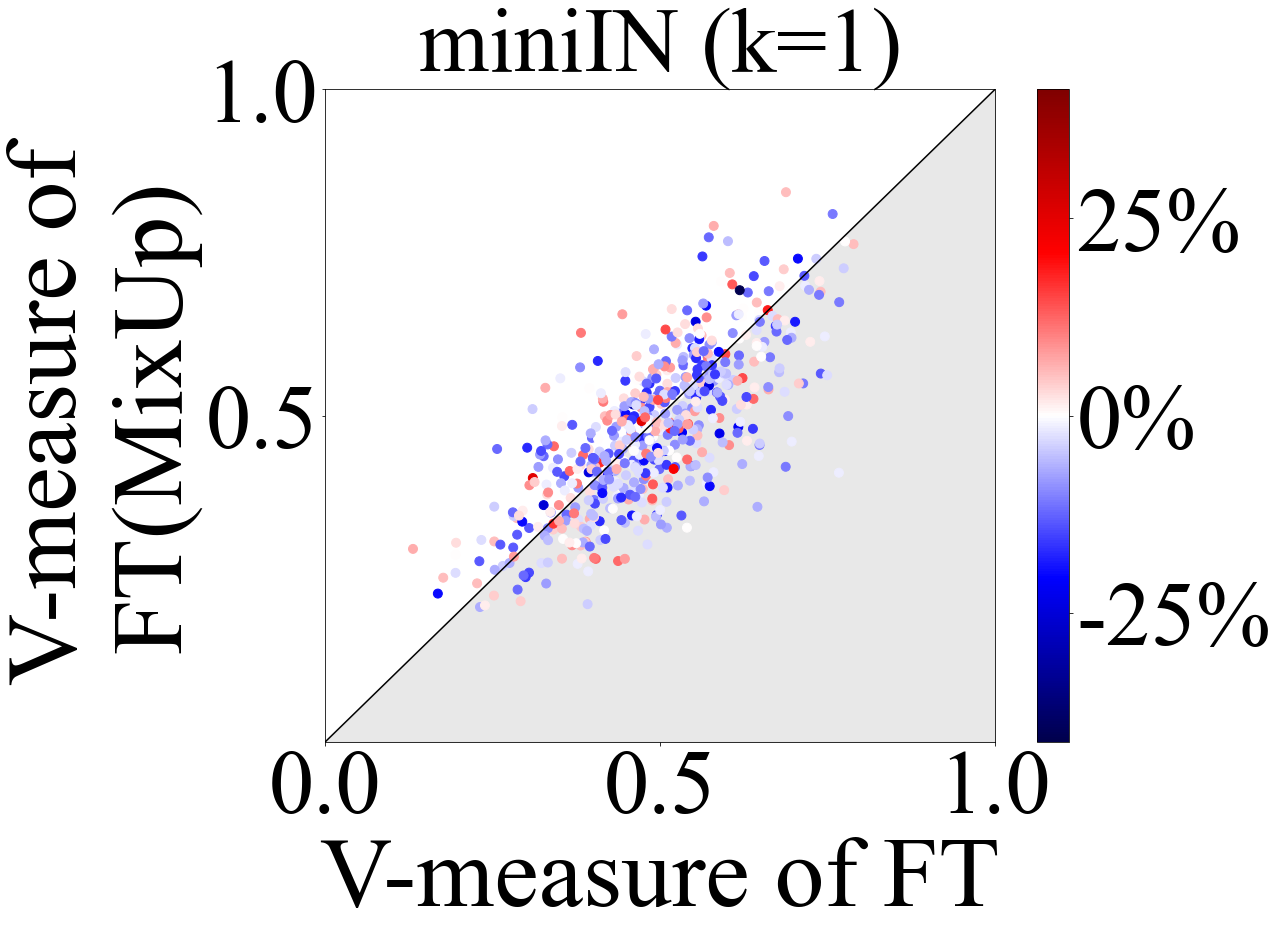

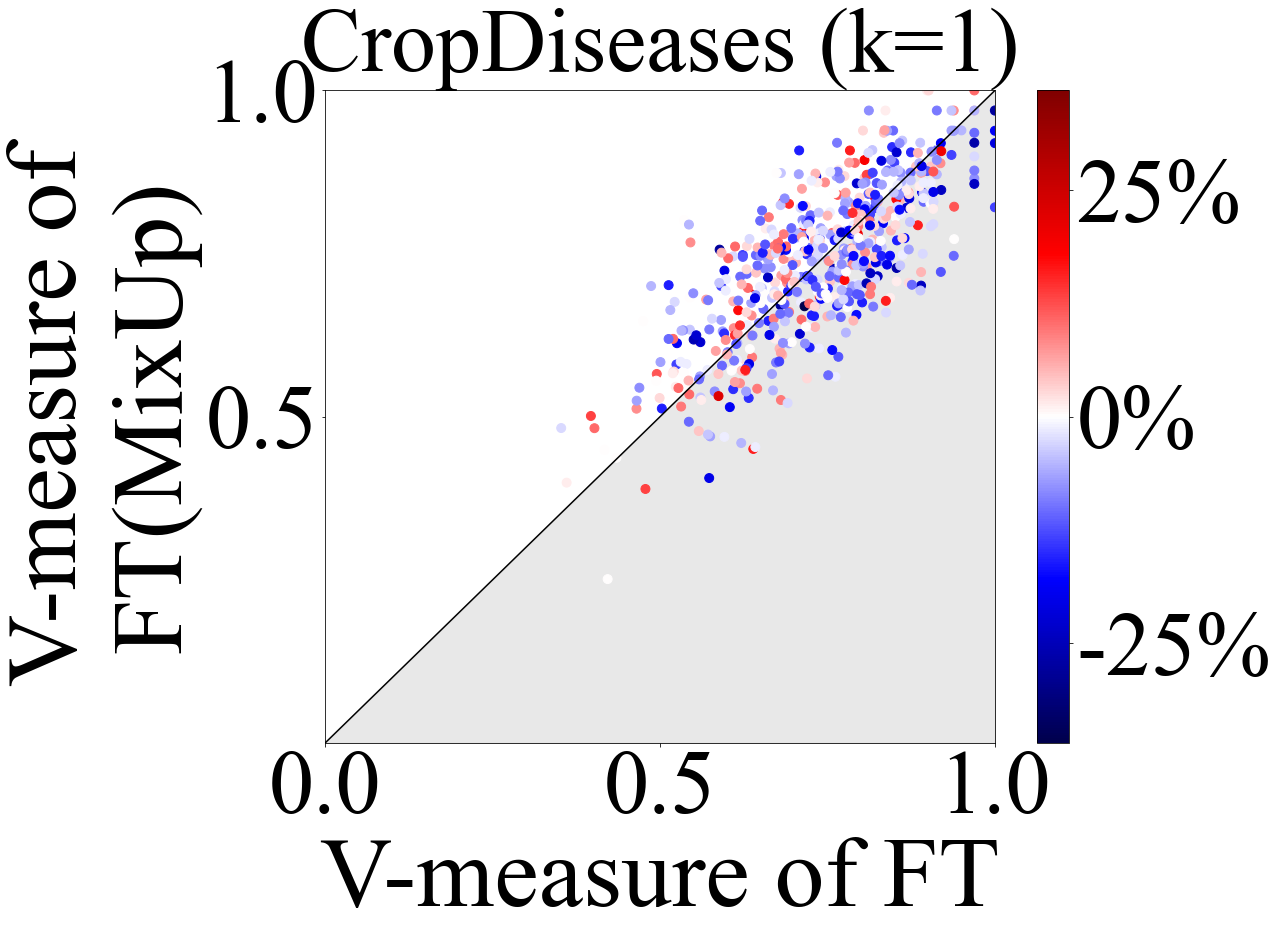

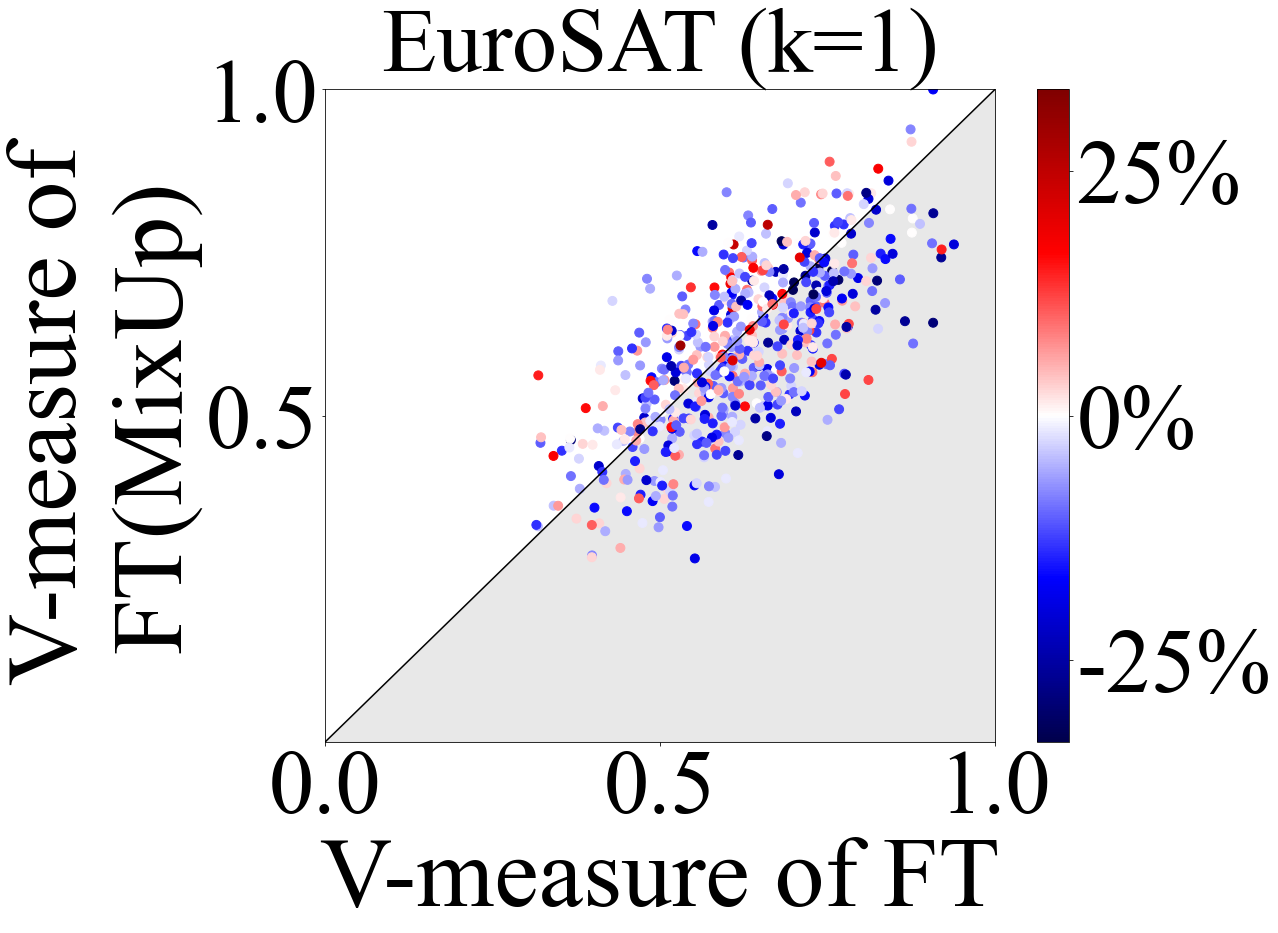

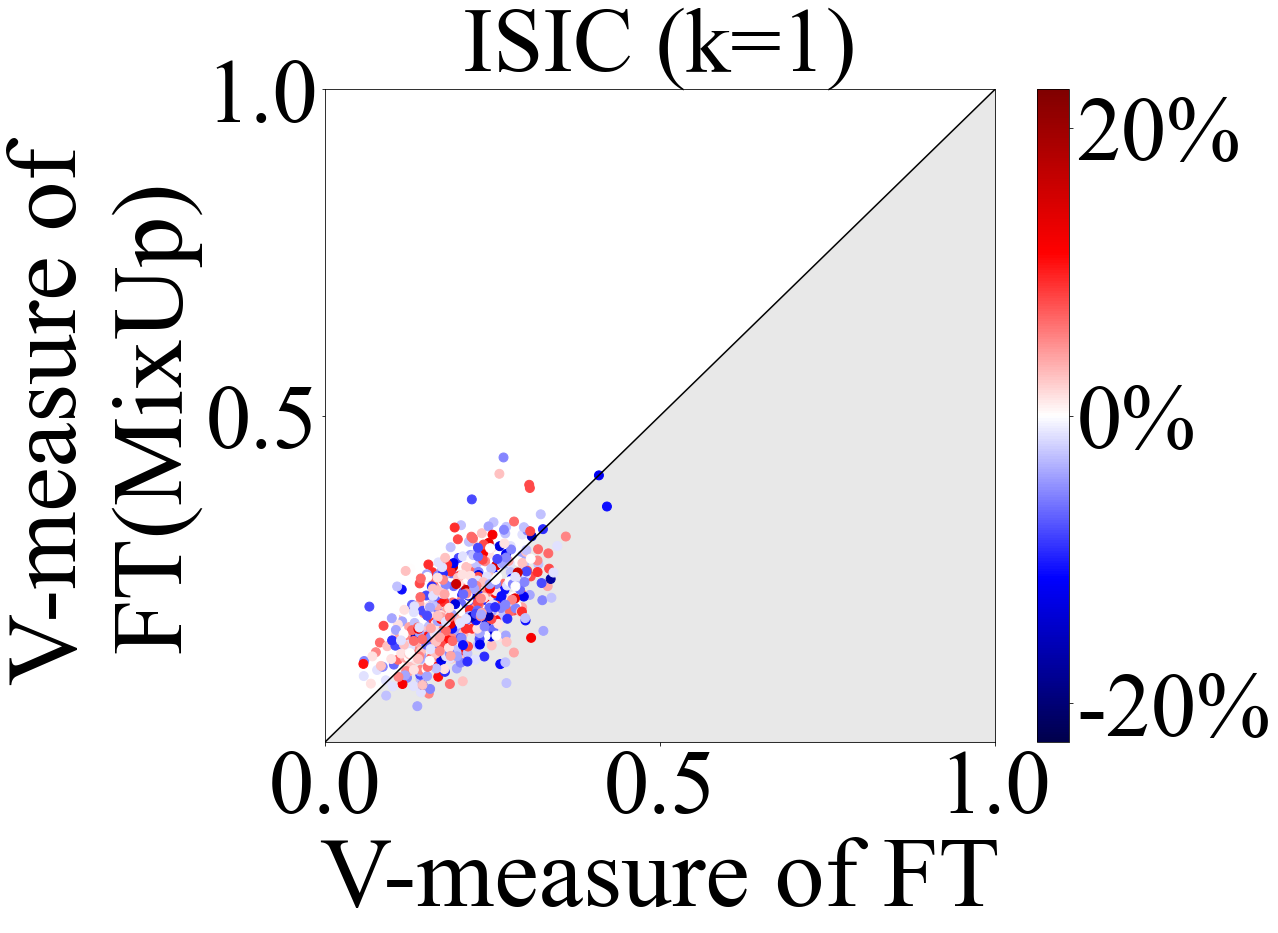

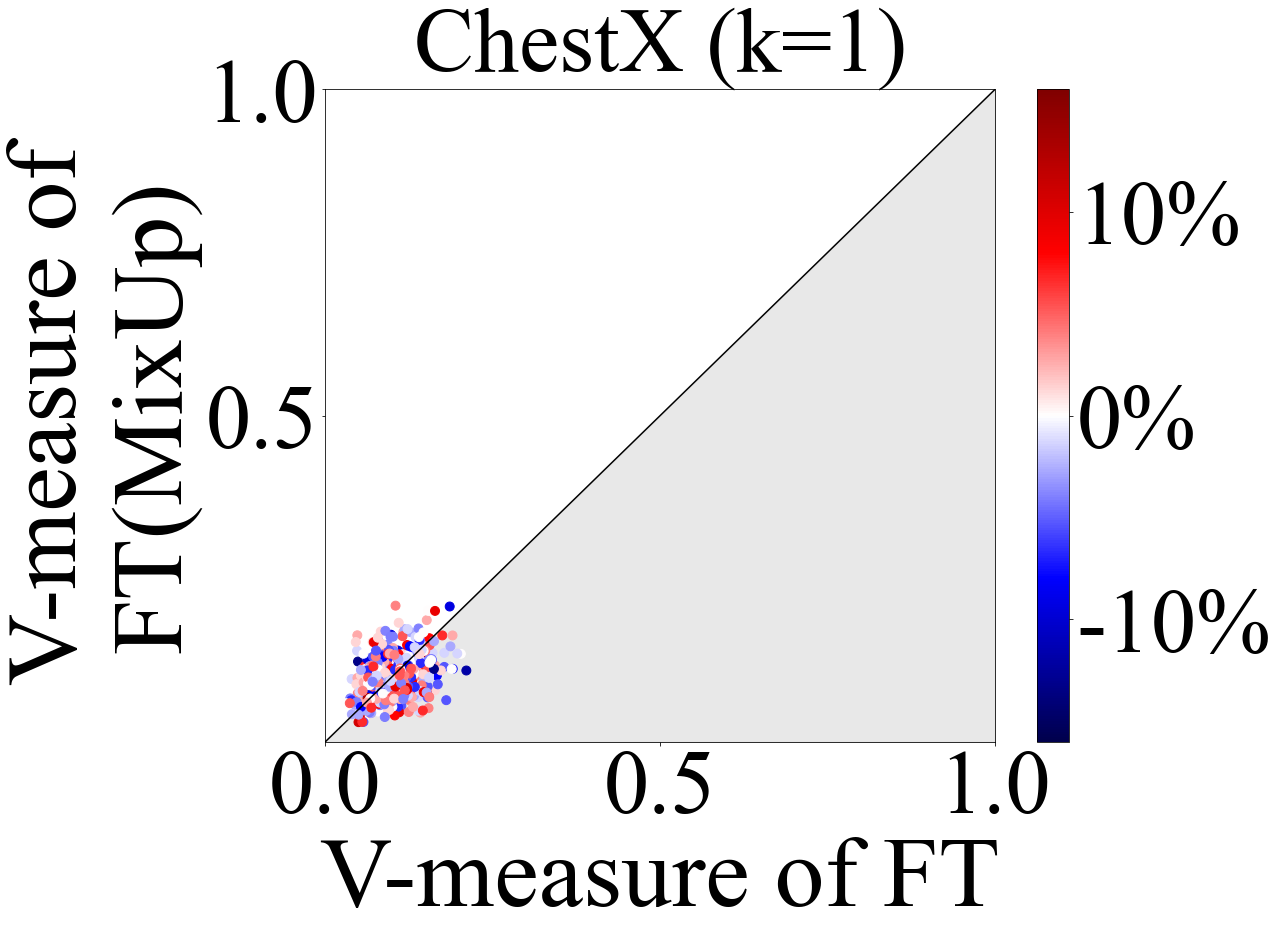

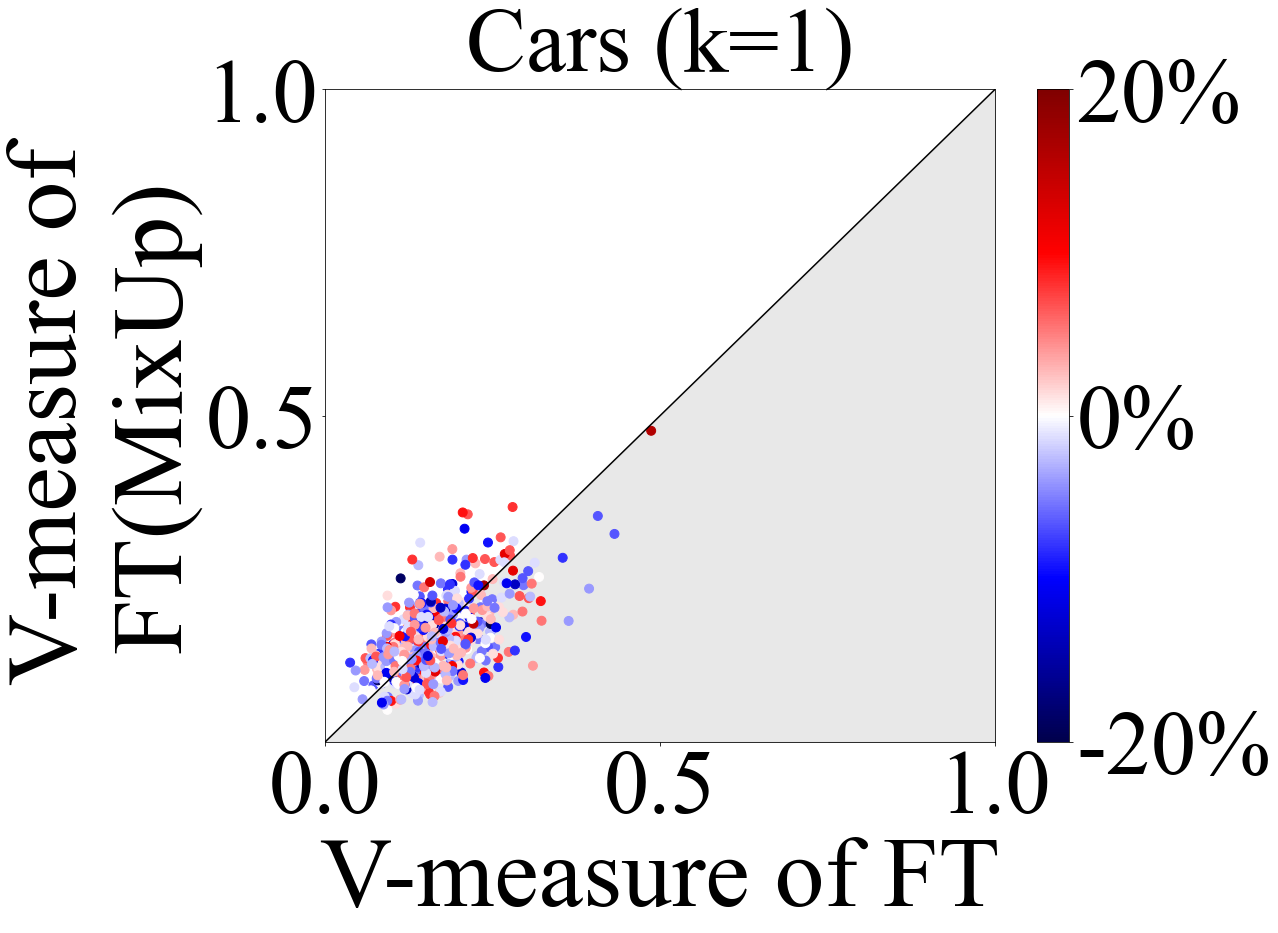

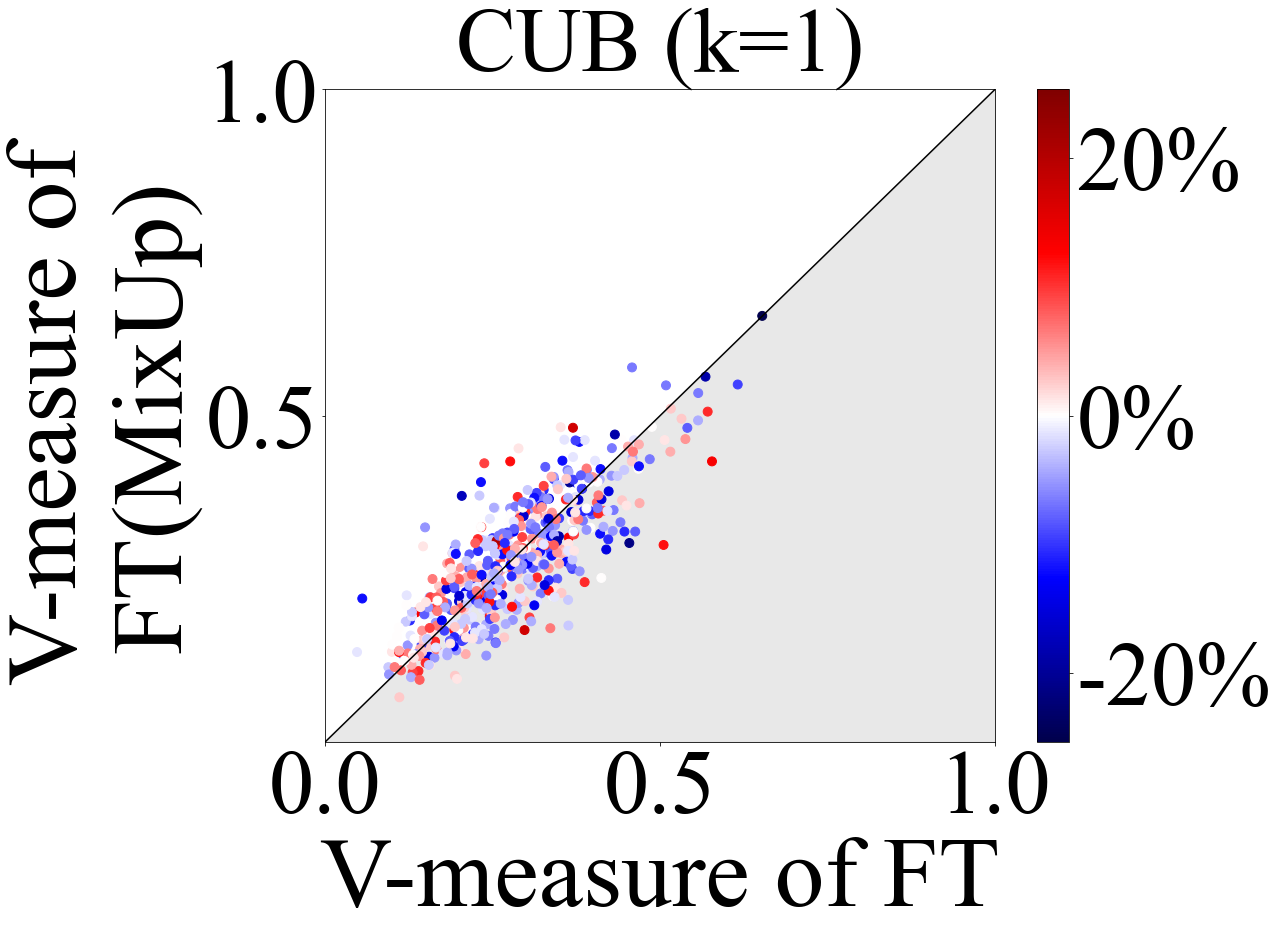

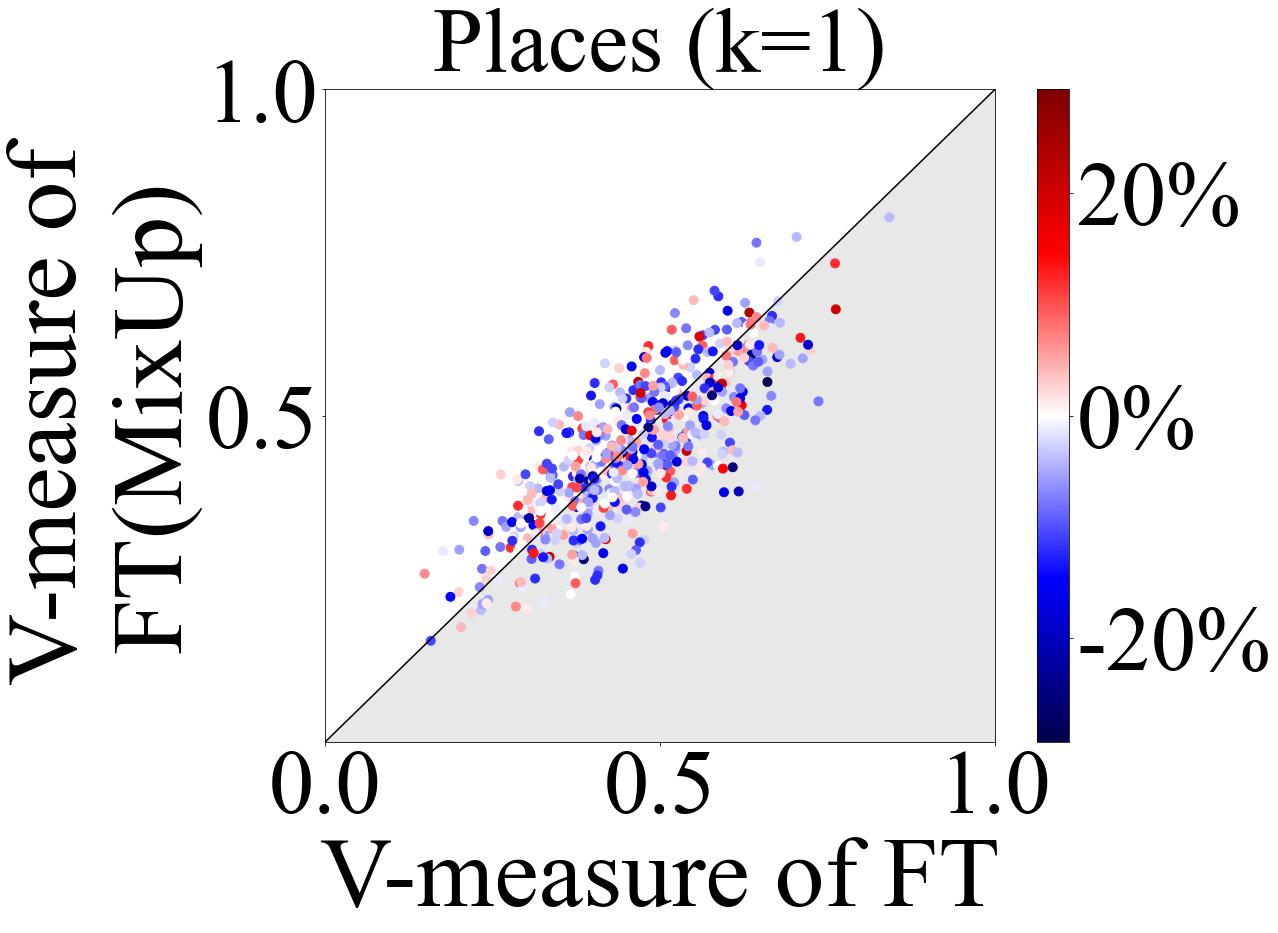

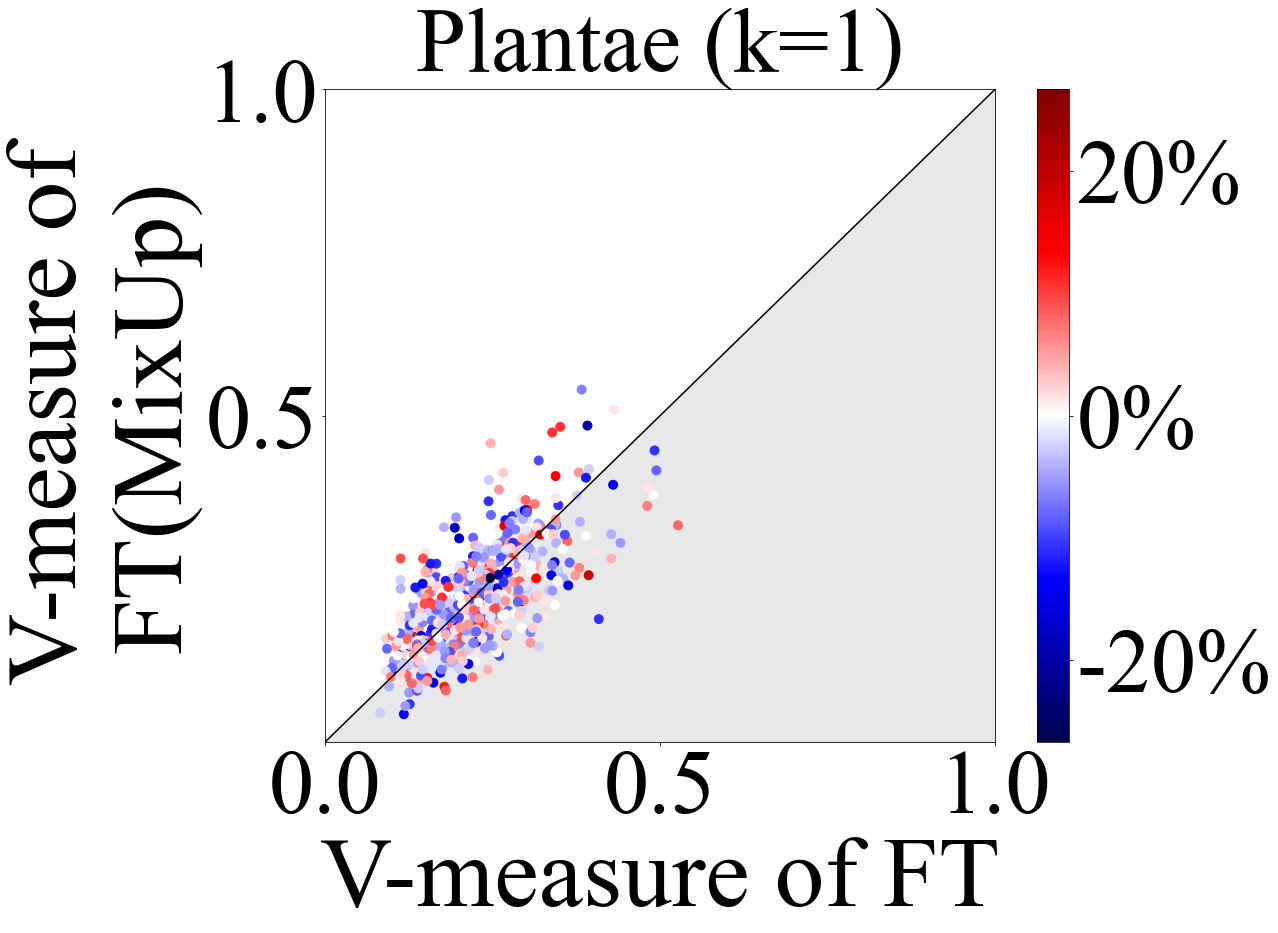

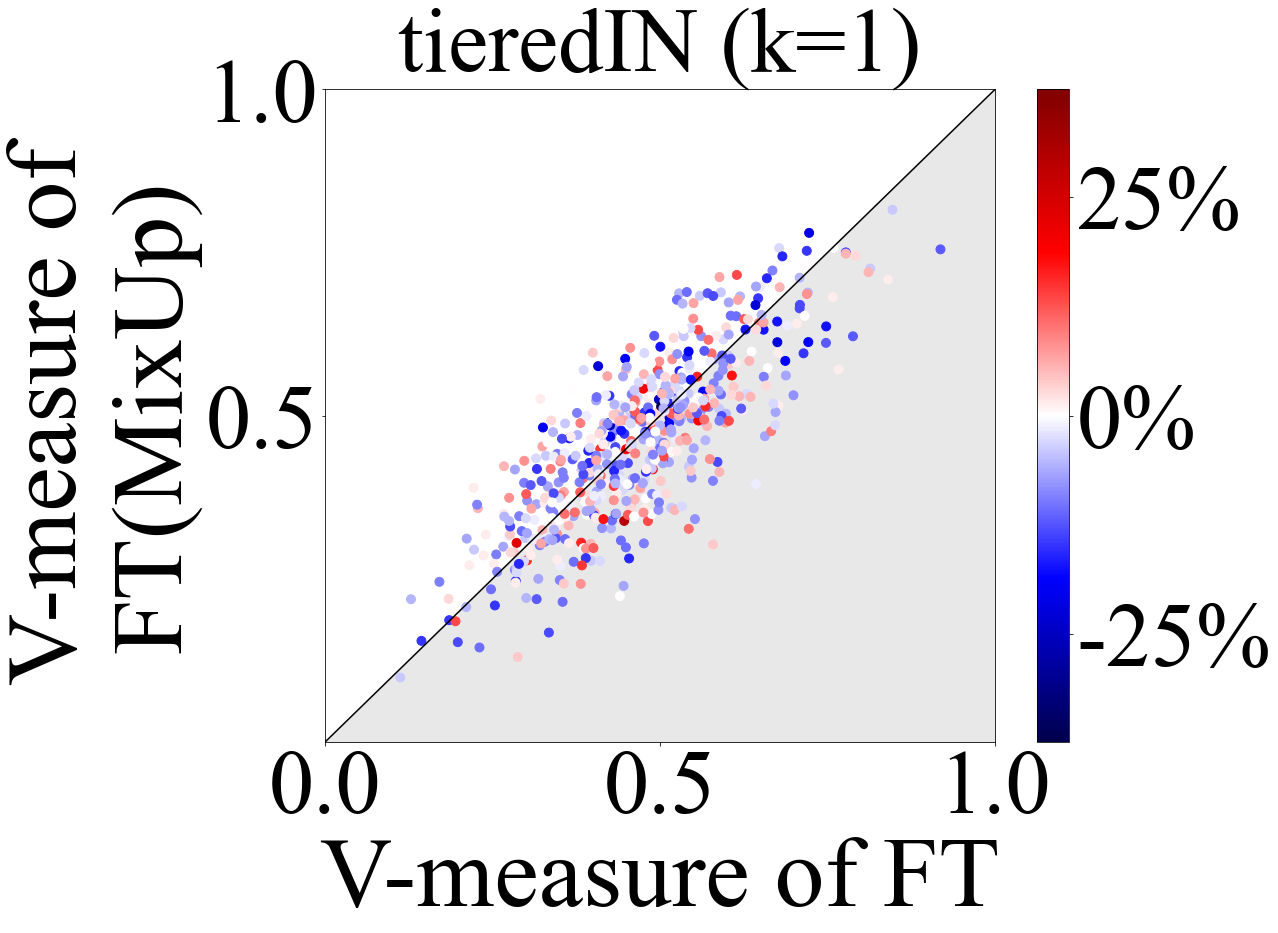

In [27]:
# mixup 1shot
for idx, data in enumerate(datas+datas_fg):
    fig, ax1 = plt.subplots(figsize = (15, 12))
    v_score_m= pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/mixup/both/v_score_query.csv'.format(data), index_col='Unnamed: 0')
    v_score_f = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/v_score_query.csv'.format(data), index_col='Unnamed: 0')
    v_score_f = v_score_f.iloc[:,-1]
    v_score_m = v_score_m.iloc[:,-1]
    test_acc_m = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/mixup/both/test_history.csv'.format(data), index_col='Unnamed: 0')
    test_acc_f = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/test_history.csv'.format(data), index_col='Unnamed: 0')
    acc = (test_acc_m.iloc[:,-1] - test_acc_f.iloc[:,-1])*100
    abs_max = max(max(acc), -min(acc))
    plt.plot([0, 1], [0, 1], color="black")
    plt.fill_between([0,1], [0,1], alpha=0.5, color="lightgray")
    plt.scatter(v_score_f, v_score_m, s = 80, c = acc, cmap = 'seismic', vmin=-abs_max, vmax=abs_max)
    plt.xlim([0,1])
    plt.ylim([0,1]) 
    
    plt.xticks(np.arange(0, 1.2, 0.5), size = 90)
    plt.yticks(np.arange(0.5, 1.2, 0.5), size = 90)

    plt.ylabel("V-measure of\nFT(MixUp)", size = 100)
    plt.xlabel("V-measure of FT", size = 100)
    cbar = plt.colorbar(format=ticker.FuncFormatter(fmt))
    cbar.ax.tick_params(labelsize=90) 
    #plt.title(data+" (k=1)", position=(0.5, 10), fontsize = 100)
    plt.title(datas_full[idx]+" (k=1)", loc='center', fontsize = 90)
    plt.savefig('./img_pdf/v_score_plot/mixup/1shot_{}_mixup.pdf'.format(data), bbox_inches='tight', format='pdf')

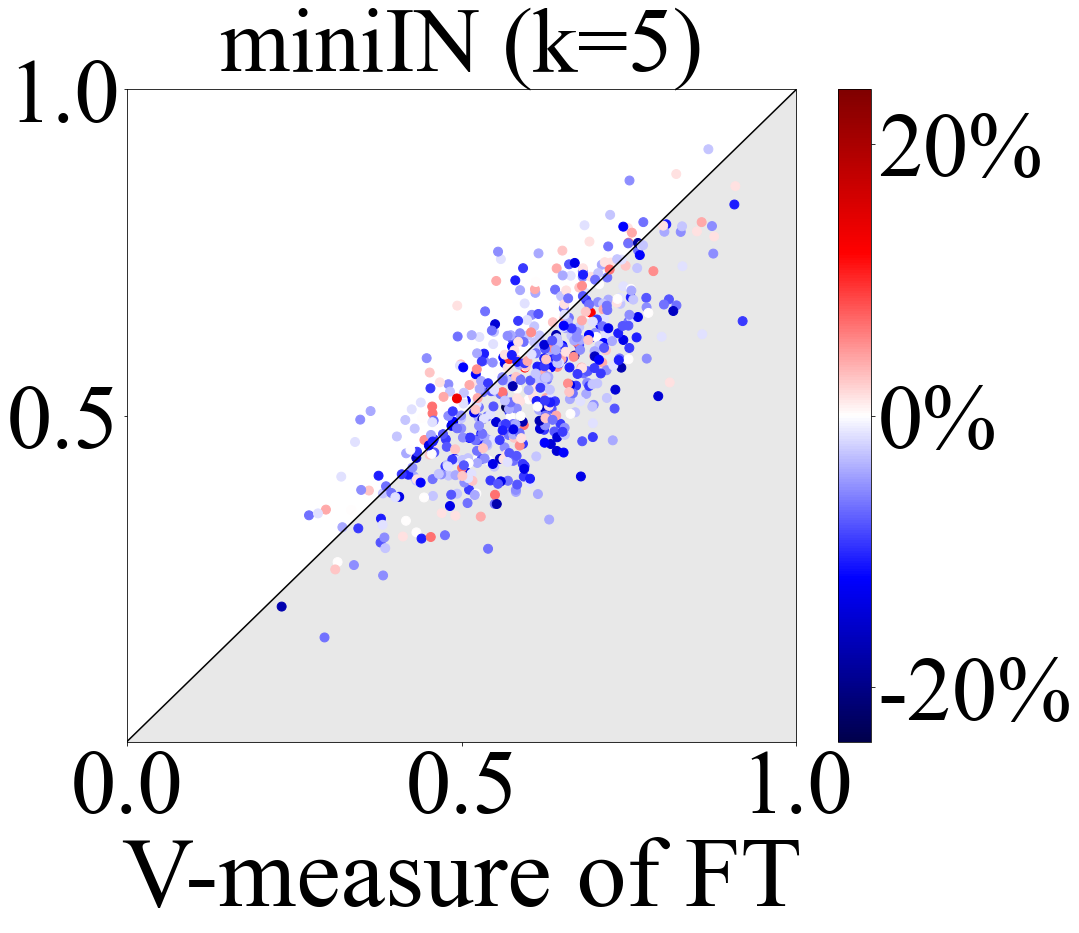

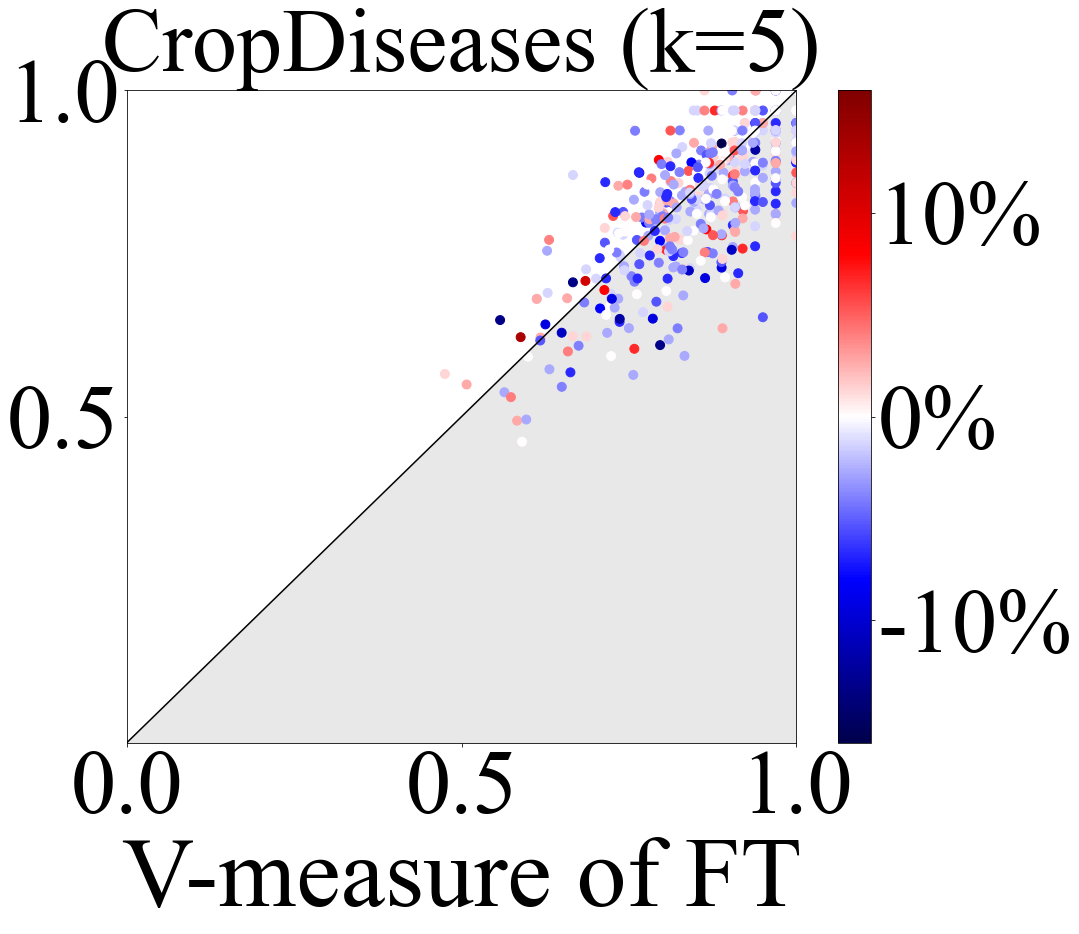

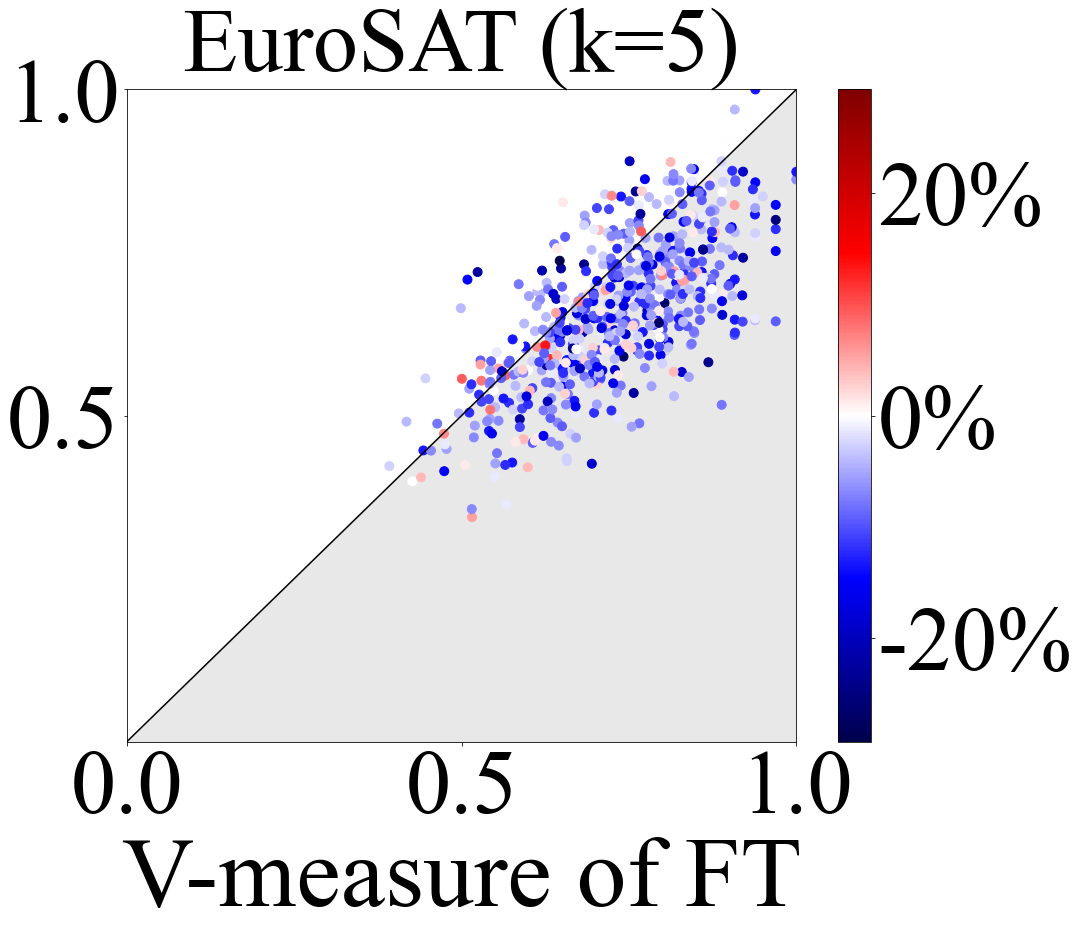

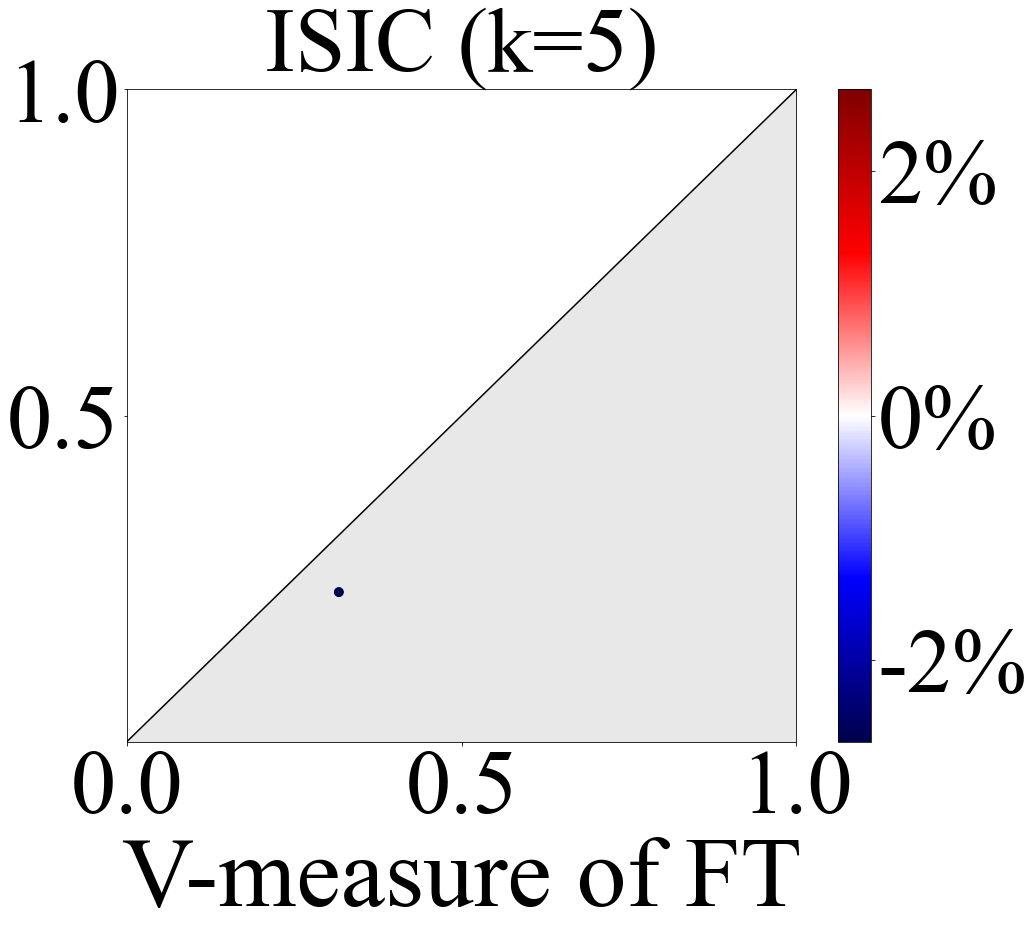

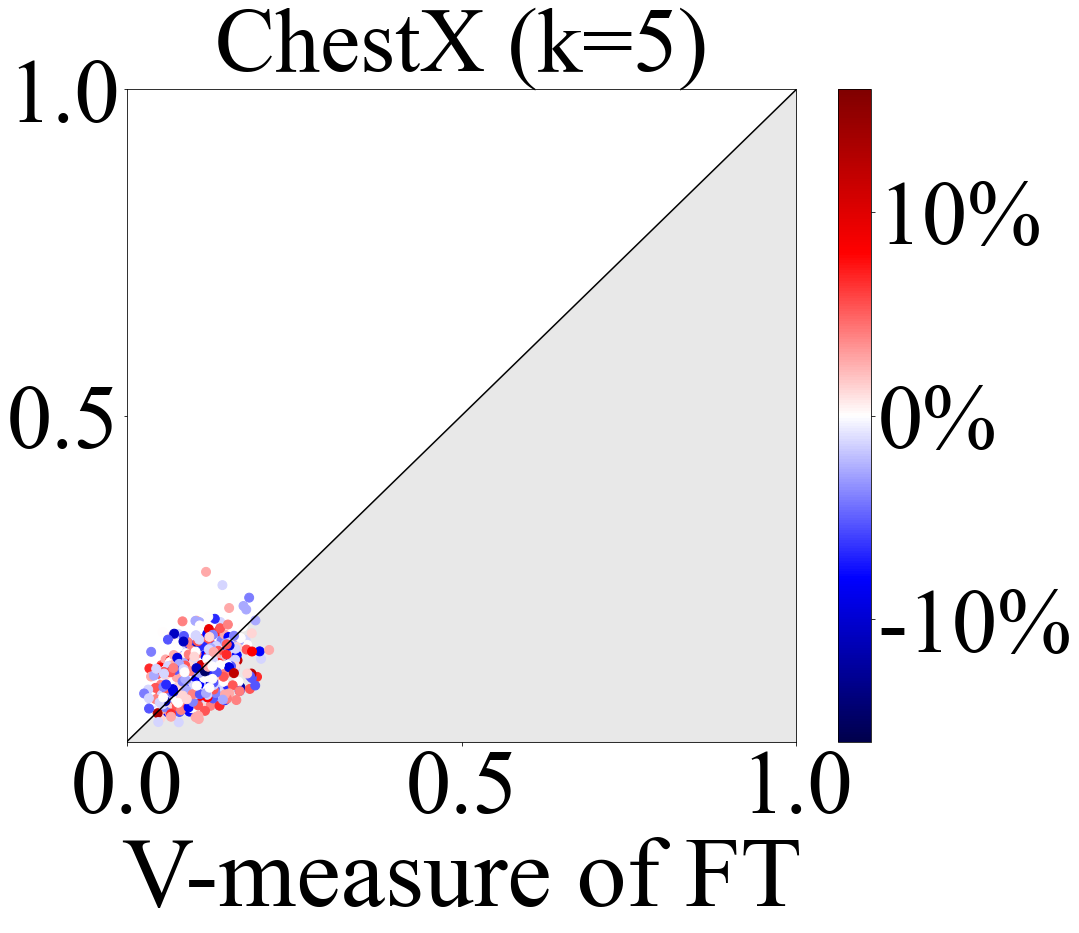

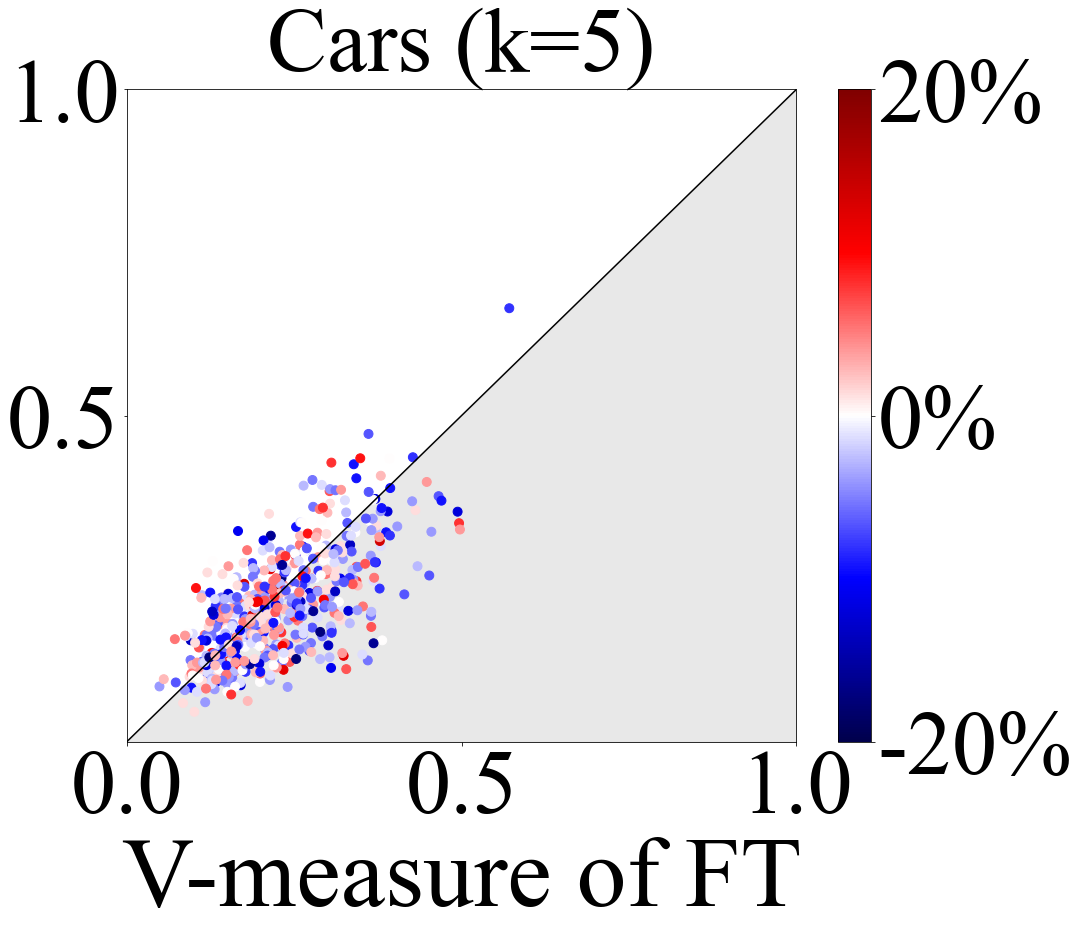

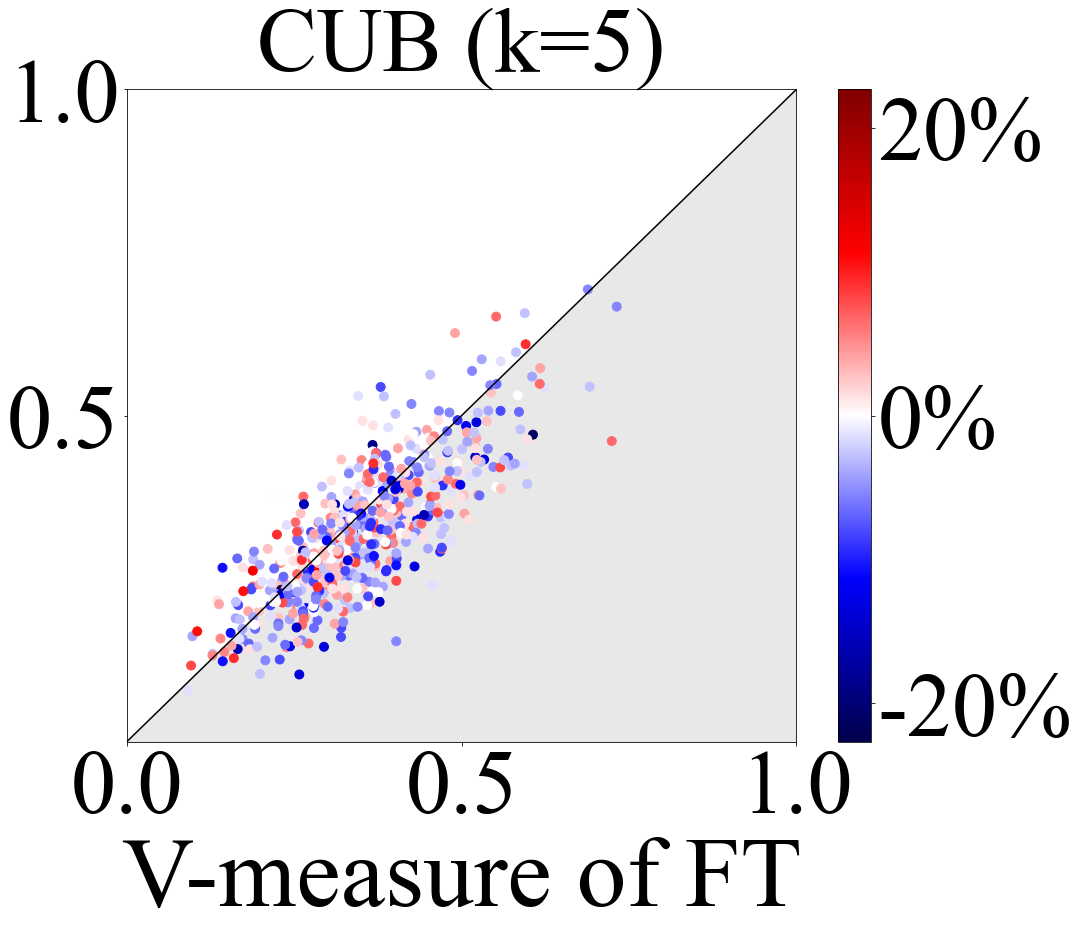

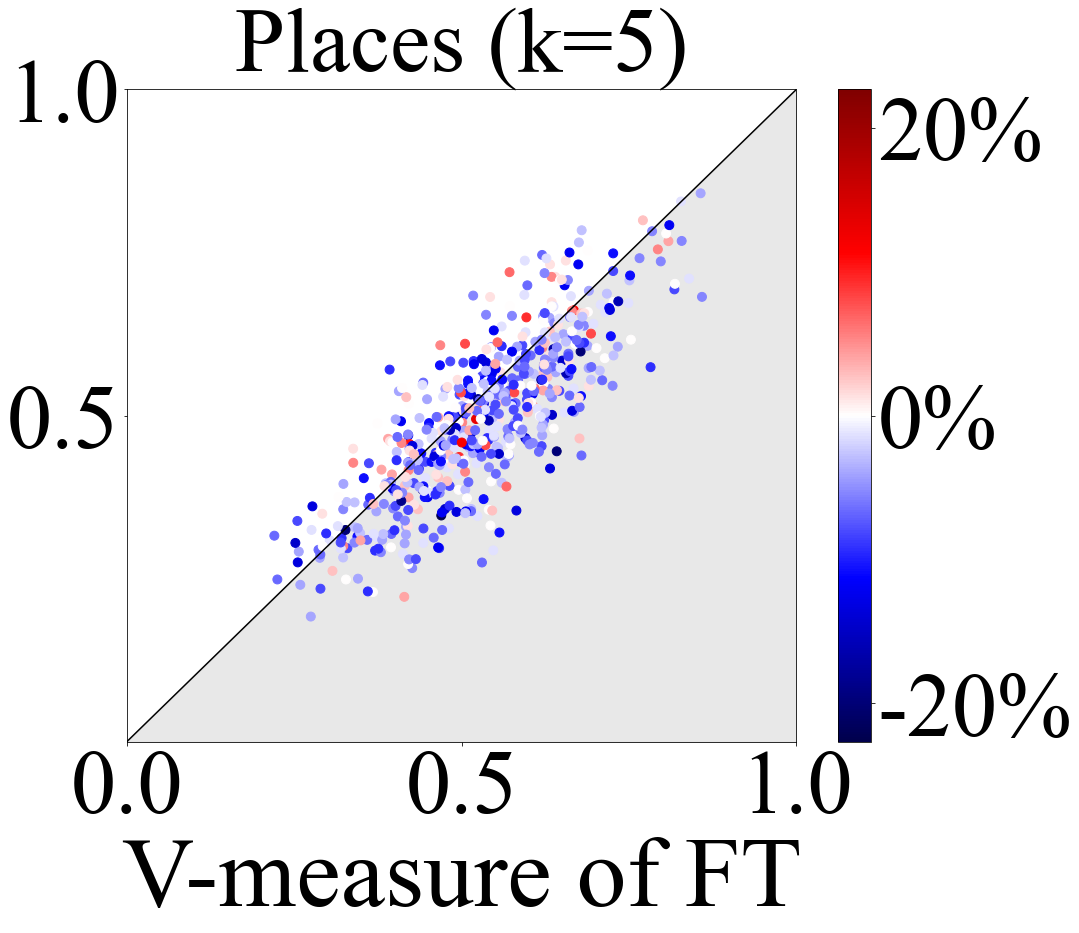

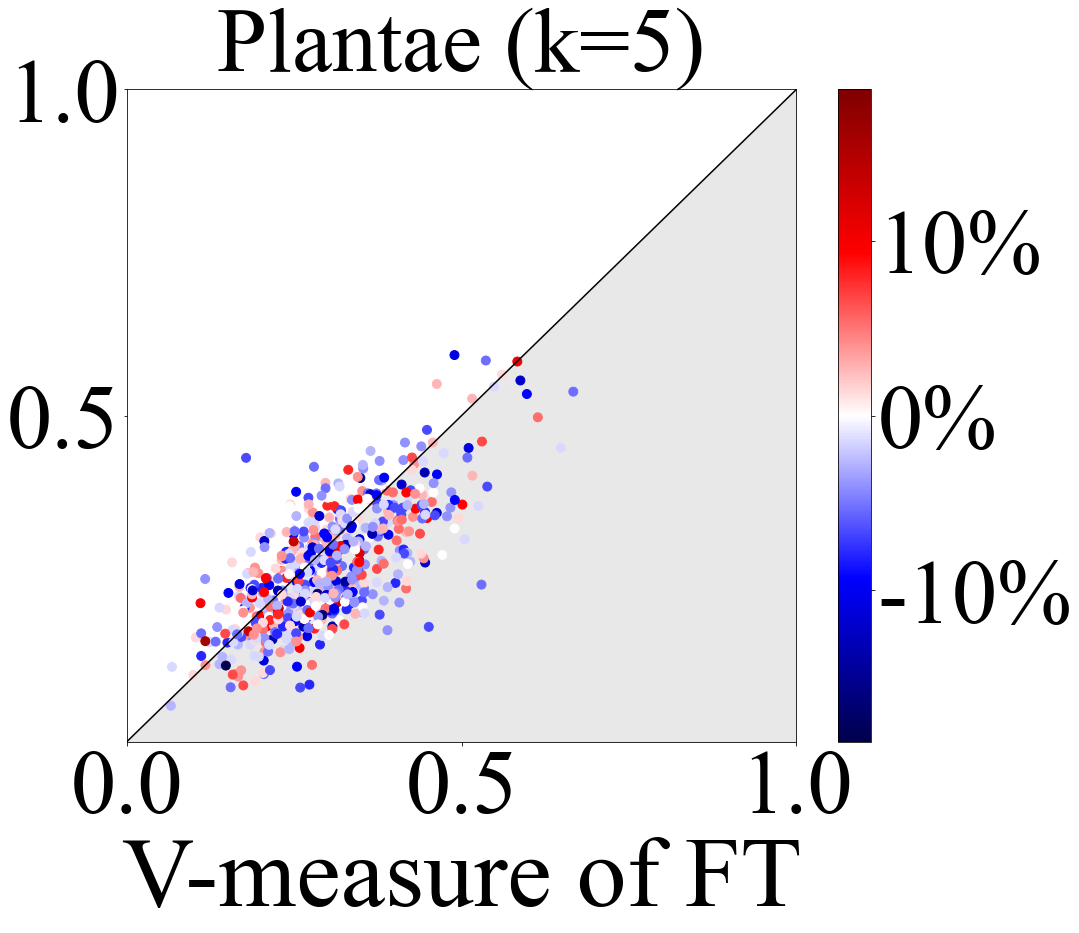

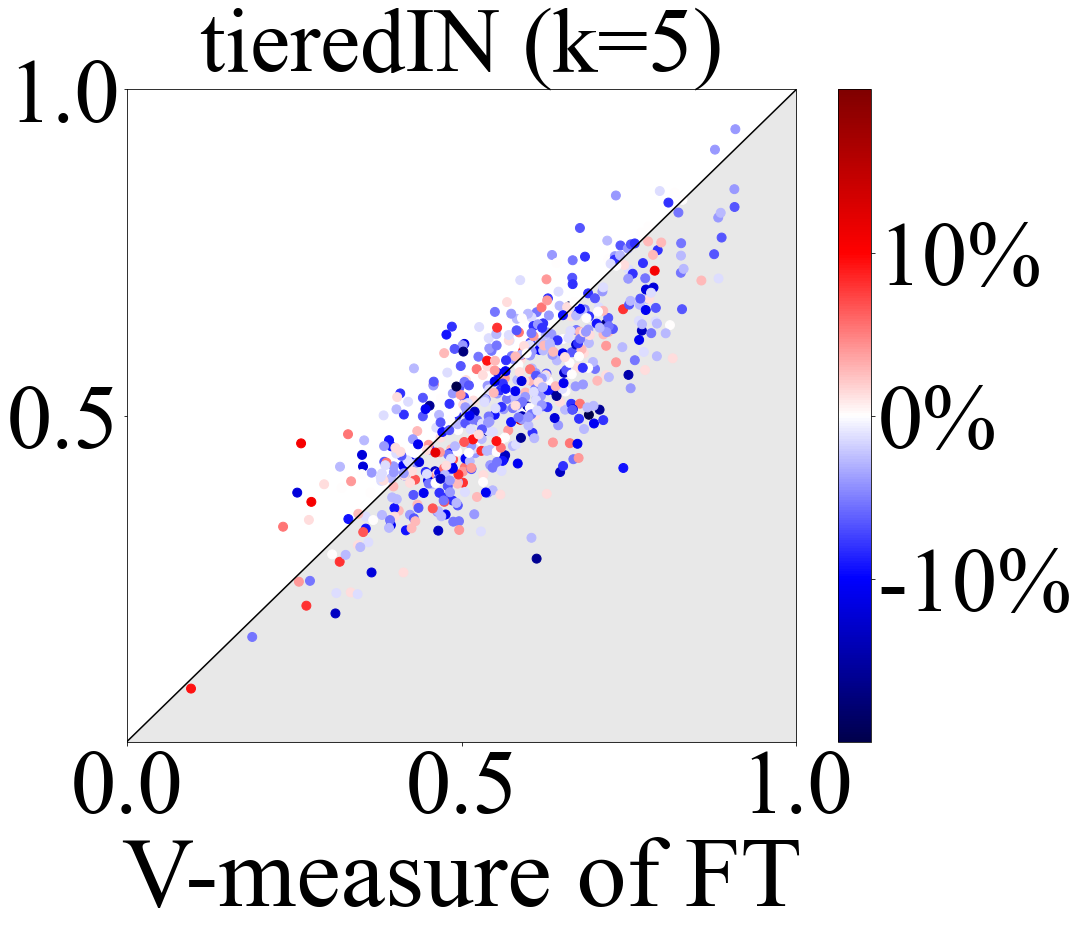

In [30]:
# mixup 5shot
for idx, data in enumerate(datas+datas_fg):
    fig, ax1 = plt.subplots(figsize = (15, 12))
    v_score_m= pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/mixup/both/v_score_query.csv'.format(data), index_col='Unnamed: 0')
    v_score_f = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/v_score_query.csv'.format(data), index_col='Unnamed: 0')
    v_score_f = v_score_f.iloc[:,-1]
    v_score_m = v_score_m.iloc[:,-1]
    test_acc_m = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/mixup/both/test_history.csv'.format(data), index_col='Unnamed: 0')
    test_acc_f = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/test_history.csv'.format(data), index_col='Unnamed: 0')
    acc = (test_acc_m.iloc[:,-1] - test_acc_f.iloc[:,-1])*100
    abs_max = max(max(acc), -min(acc))
    plt.plot([0, 1], [0, 1], color="black")
    plt.fill_between([0,1], [0,1], alpha=0.5, color="lightgray")
    plt.scatter(v_score_f, v_score_m, s = 80, c = acc, cmap = 'seismic', vmin=-abs_max, vmax=abs_max)
    plt.xlim([0,1])
    plt.ylim([0,1]) 
    
    plt.xticks(np.arange(0, 1.2, 0.5), size = 90)
    plt.yticks(np.arange(0.5, 1.2, 0.5), size = 90)

    plt.xlabel("V-measure of FT", size = 100)
    cbar = plt.colorbar(format=ticker.FuncFormatter(fmt))
    cbar.ax.tick_params(labelsize=90) 
    #plt.title(data+" (k=1)", position=(0.5, 10), fontsize = 100)
    plt.title(datas_full[idx]+" (k=5)", loc='center', fontsize = 90)
    plt.savefig('./img_pdf/v_score_plot/mixup/5shot_{}_mixup.pdf'.format(data), bbox_inches='tight', format='pdf')

In [ ]:
# main
for shot in ['01', '05', '20']:
    fig, ax1 = plt.subplots(figsize = (15, 12))
    v_score = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/cub/05way_0{}shot_full_default/v_score_query.csv'.format(shot), index_col='Unnamed: 0')
    v_score_0 = v_score.loc[:,'epoch0']
    v_score_f = v_score.iloc[:,-1]
    test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/cub/05way_0{}shot_full_default/test_history.csv'.format(shot), index_col='Unnamed: 0')
    test_acc_h = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/cub/05way_0{}shot_head_default/test_history.csv'.format(shot), index_col='Unnamed: 0')
    acc = (test_acc.iloc[:,-1] - test_acc_h.iloc[:,-1])*100
    abs_max = max(max(acc), -min(acc))
    plt.plot([0, 1], [0, 1], color="black")
    plt.fill_between([0,1], [0,1], alpha=0.5, color="lightgray")
    plt.scatter(v_score_0, v_score_f, s = 80, c = acc, cmap = 'seismic', vmin=-abs_max, vmax=abs_max)
    plt.xlim([0,1])
    plt.ylim([0,1]) 
    
    plt.xticks(np.arange(0, 1.2, 0.5), size = 100)
    plt.yticks(np.arange(0.5, 1.2, 0.5), size = 100)
    if shot == '01':
        plt.ylabel("V-measure of FT", size = 100)
    # if data == 'places' or data=='euro':
    plt.xlabel("V-measure of LP", size = 100)
    cbar = plt.colorbar(format=ticker.FuncFormatter(fmt))
    cbar.ax.tick_params(labelsize=90) 
    #plt.title(data+" (k=1)", position=(0.5, 10), fontsize = 100)
    plt.savefig('./img_pdf/v_score_plot/cub_{}shot_main.pdf'.format(shot), bbox_inches='tight', format='pdf')

In [702]:
data

'cars'

In [ ]:
# 1shot
for idx, data in enumerate(datas+datas_fg):
    fig, ax1 = plt.subplots(figsize = (15, 12))
    v_score = pd.read_csv('./logs/baseline/output/resnet18_base_LS_default/{}/05way_001shot_full_default/v_score_query.csv'.format(data), index_col='Unnamed: 0')
    v_score_0 = v_score.loc[:,'epoch0']
    v_score_f = v_score.iloc[:,-1]
    test_acc = pd.read_csv('./logs/baseline/output/resnet18_base_LS_default/{}/05way_001shot_full_default/test_history.csv'.format(data), index_col='Unnamed: 0')
    test_acc_h = pd.read_csv('./logs/baseline/output/resnet18_base_LS_default/{}/05way_001shot_head_default/test_history.csv'.format(data), index_col='Unnamed: 0')
    acc = (test_acc.iloc[:,-1] - test_acc_h.iloc[:,-1])*100
    abs_max = max(max(acc), -min(acc))
    plt.plot([0, 1], [0, 1], color="black")
    plt.fill_between([0,1], [0,1], alpha=0.5, color="lightgray")
    plt.scatter(v_score_0, v_score_f, s = 80, c = acc, cmap = 'seismic', vmin=-abs_max, vmax=abs_max)
    plt.xlim([0,1])
    plt.ylim([0,1])
    
    plt.xticks(np.arange(0, 1.2, 0.5), size = 80)
    if data == 'mini_test' or data=='cub':
        plt.yticks(np.arange(0.5, 1.2, 0.5), size = 80)
        plt.ylabel("V-measure of FT", size = 80)
    else:
        plt.yticks(color='w')
    # if data == 'places' or data=='euro':
    plt.xlabel("V-measure of LP", fontsize = 80)
    cbar = plt.colorbar(format=ticker.FuncFormatter(fmt))
    cbar.ax.tick_params(labelsize=70) 
    plt.title(datas_full[idx]+" (k=1)", position=(0.5, 10), fontsize = 90) #y=-0.01
    plt.savefig('./img_pdf/v_score_plot/tiered/1shot_{}.pdf'.format(data), bbox_inches='tight', format='pdf')

In [ ]:
# 5shot
for idx, data in enumerate(datas+datas_fg):
    fig, ax1 = plt.subplots(figsize = (15, 12))
    v_score = pd.read_csv('./logs/baseline/output/resnet18_base_LS_default/{}/05way_005shot_full_default/v_score_query.csv'.format(data), index_col='Unnamed: 0')
    v_score_0 = v_score.loc[:,'epoch0']
    v_score_f = v_score.iloc[:,-1]
    test_acc = pd.read_csv('./logs/baseline/output/resnet18_base_LS_default/{}/05way_005shot_full_default/test_history.csv'.format(data), index_col='Unnamed: 0')
    test_acc_h = pd.read_csv('./logs/baseline/output/resnet18_base_LS_default/{}/05way_005shot_head_default/test_history.csv'.format(data), index_col='Unnamed: 0')
    acc = (test_acc.iloc[:,-1] - test_acc_h.iloc[:,-1])*100
    abs_max = max(max(acc), -min(acc))
    plt.plot([0, 1], [0, 1], color="black")
    plt.fill_between([0,1], [0,1], alpha=0.5, color="lightgray")
    plt.scatter(v_score_0, v_score_f, s = 80, c = acc, cmap = 'seismic', vmin=-abs_max, vmax=abs_max)
    plt.xlim([0,1])
    plt.ylim([0,1])
    
    plt.xticks(np.arange(0, 1.2, 0.5), size = 80)
    if data == 'mini_test' or data=='cub':
        plt.yticks(np.arange(0.5, 1.2, 0.5), size = 80)
        plt.ylabel("V-measure of FT", size = 80)
    else:
        plt.yticks(color='w')
    # if data == 'places' or data=='euro':
    plt.xlabel("V-measure of LP", size = 80)
    cbar = plt.colorbar(format=ticker.FuncFormatter(fmt))
    cbar.ax.tick_params(labelsize=70) 
    plt.title(datas_full[idx]+" (k=5)", loc='center', fontsize = 90)
    plt.savefig('./img_pdf/v_score_plot/tiered/5shot_{}.pdf'.format(data), bbox_inches='tight', format='pdf')

In [766]:
v_score

epoch1    epoch2    epoch3    epoch4    epoch5    epoch6    epoch7  \
1    0.481247  0.578752  0.509142  0.576407  0.385954  0.513425  0.682471   
2    0.457063  0.519444  0.444135  0.482988  0.468825  0.477234  0.459952   
3    0.656720  0.670978  0.602955  0.709028  0.581941  0.600993  0.562843   
4    0.684903  0.492035  0.579090  0.552116  0.620052  0.649871  0.684556   
5    0.681657  0.623381  0.570397  0.621032  0.624008  0.638237  0.613464   
..        ...       ...       ...       ...       ...       ...       ...   
596  0.508826  0.364096  0.400246  0.250348  0.370978  0.540009  0.468981   
597  0.484585  0.547277  0.440982  0.465454  0.414772  0.394684  0.504430   
598  0.358956  0.464425  0.529643  0.345630  0.523240  0.453520  0.554833   
599  0.583906  0.543192  0.450139  0.525770  0.535403  0.645914  0.473083   
600  0.779389  0.678547  0.728323  0.772463  0.746661  0.691791  0.675707   

       epoch8    epoch9   epoch10  ...  epoch348  epoch349  epoch350  \
1    0.445162  0.508407  0.521245  ...  0.683421  0.698646  0.742064   
2    0.593495  0.547769  0.585076  ...  0.667231  0.663770  0.704257   
3    0.624810  0.688879  0.656293  ...  0.796600  0.720727  0.816333   
4    0.653402  0.777473  0.662306  ...  0.828185  0.732912  0.721954   
5    0.703028  0.590219  0.619100  ...  0.749015  0.718432  0.759204   
..        ...       ...       ...  ...       ...       ...       ...   
596  0.473526  0.401858  0.549718  ...  0.611025  0.588599  0.584563   
597  0.483768  0.461088  0.444977  ...  0.725657  0.630192  0.594084   
598  0.522658  0.542441  0.465147  ...  0.603855  0.769527  0.625450   
599  0.601795  0.647283  0.584630  ...  0.770658  0.717772  0.795944   
600  0.763034  0.746273  0.750742  ...  0.876689  0.876689  0.876689   

     epoch351  epoch352  epoch353  epoch354  epoch355  epoch356  epoch357  
1    0.761446  0.555842  0.729384  0.721496  0.731530  0.708522  0.725651  
2    0.748311  0.765221  0.601783  0.765221  0.791403  0.659211  0.887107  
3    0.846231  0.747781  0.778948  0.719146  0.729559  0.755478  0.747781  
4    0.776040  0.779090  0.766325  0.779204  0.828185  0.869189  0.839022  
5    0.718432  0.749015  0.749015  0.732209  0.709204  0.779526  0.735296  
..        ...       ...       ...       ...       ...       ...       ...  
596  0.534756  0.725613  0.614690  0.719371  0.516762  0.629997  0.500674  
597  0.710870  0.631500  0.690372  0.675086  0.572506  0.617404  0.701497  
598  0.670733  0.658186  0.663543  0.717534  0.621438  0.736922  0.708211  
599  0.717459  0.758164  0.781111  0.688195  0.781809  0.781111  0.787041  
600  0.876689  0.876689  0.876689  0.876689  0.876689  0.876689  0.876689  

[600 rows x 357 columns]

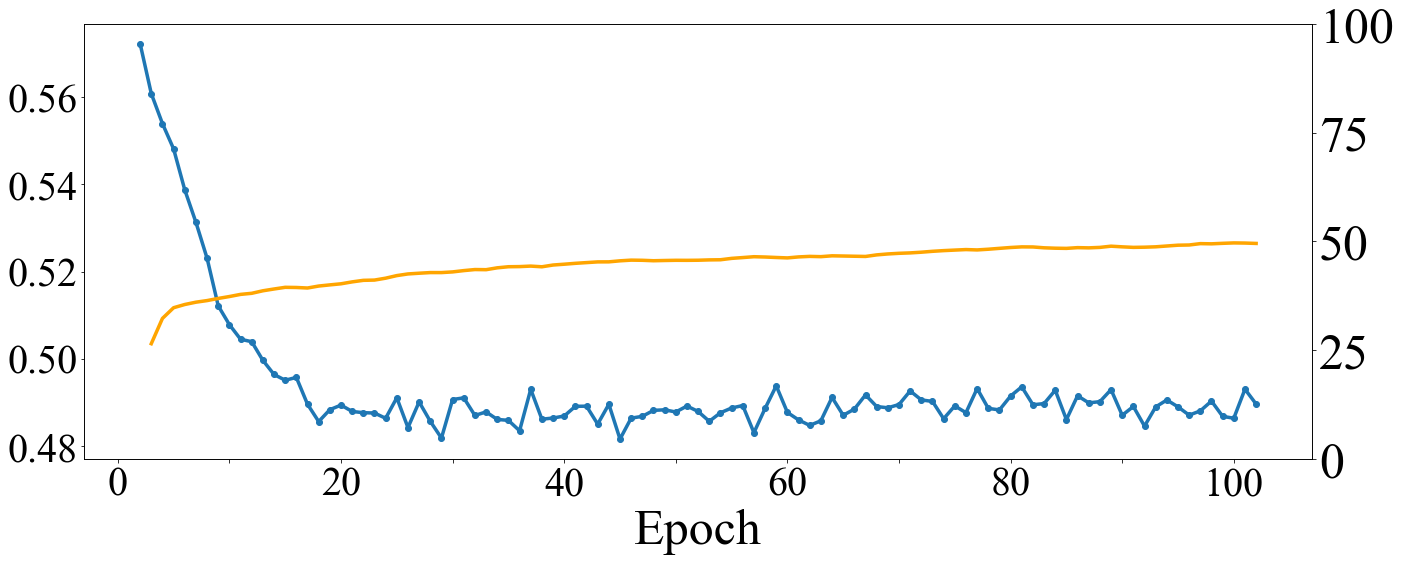

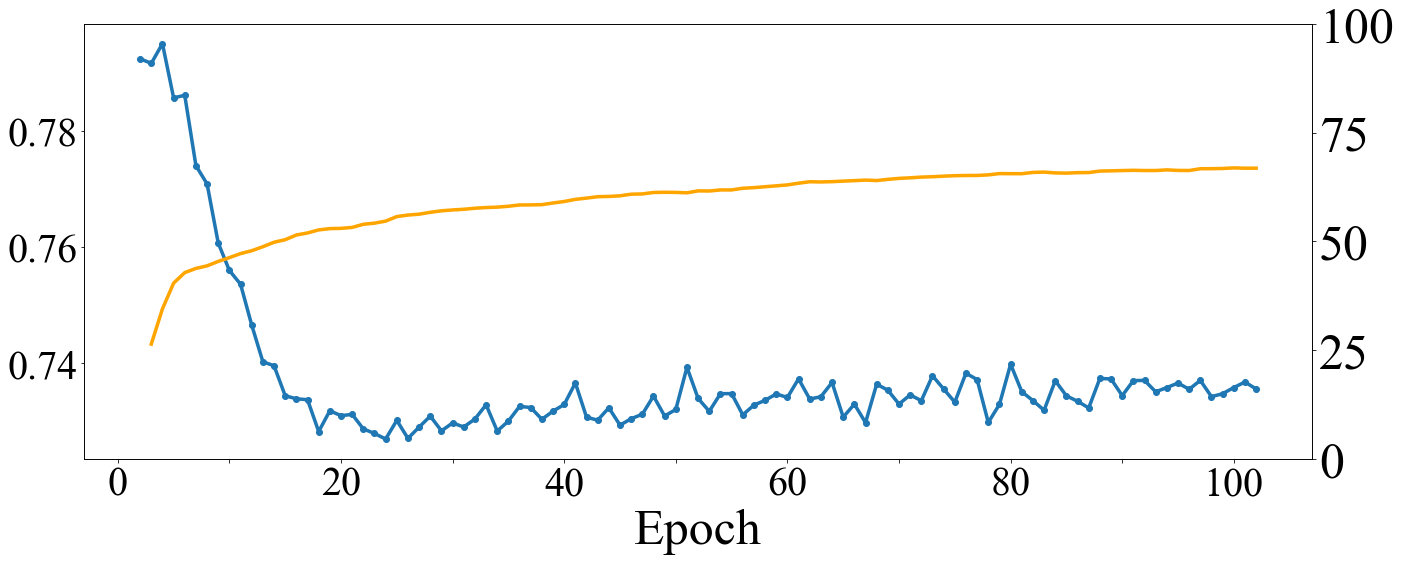

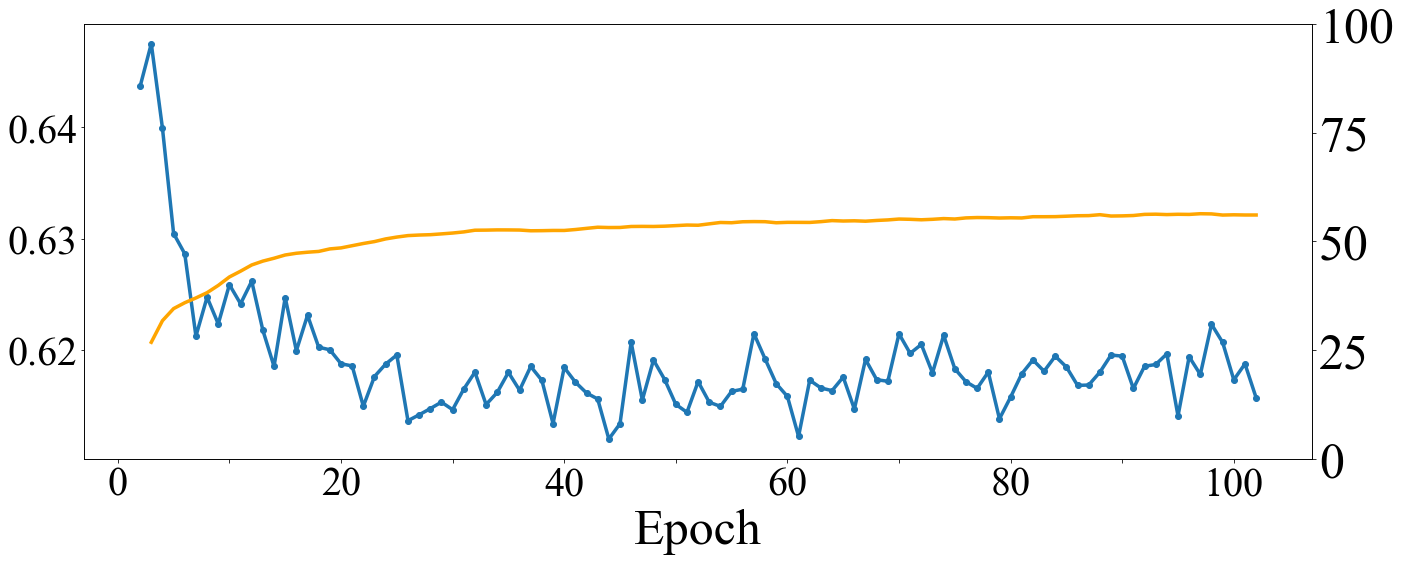

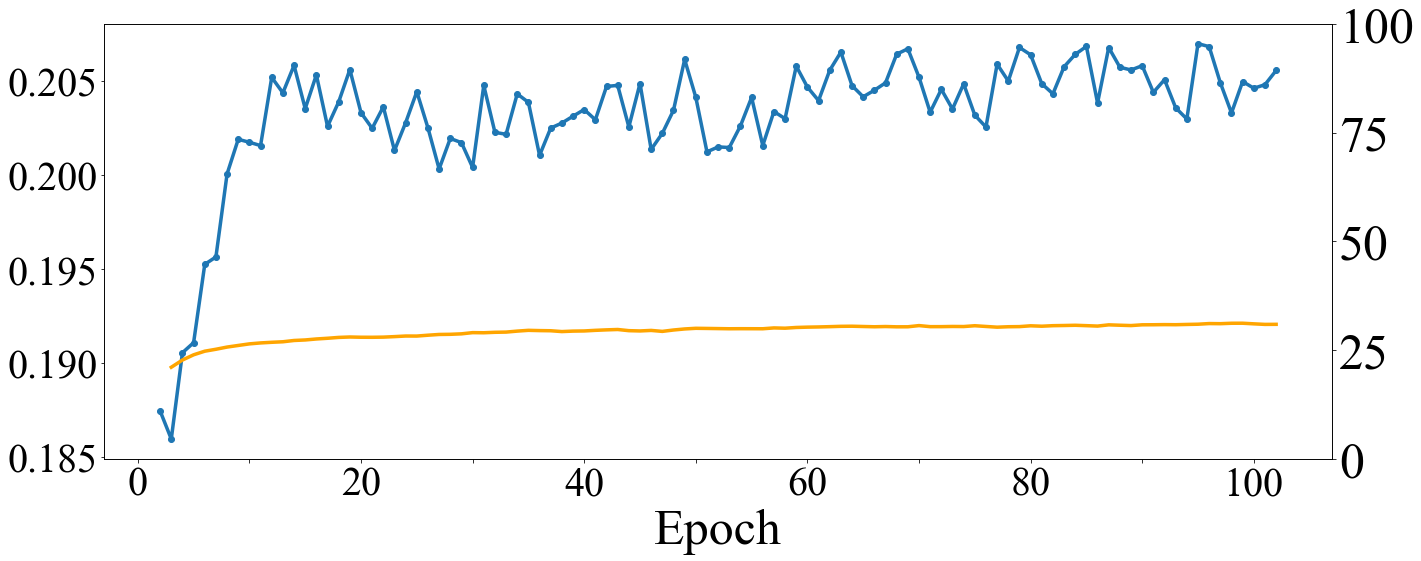

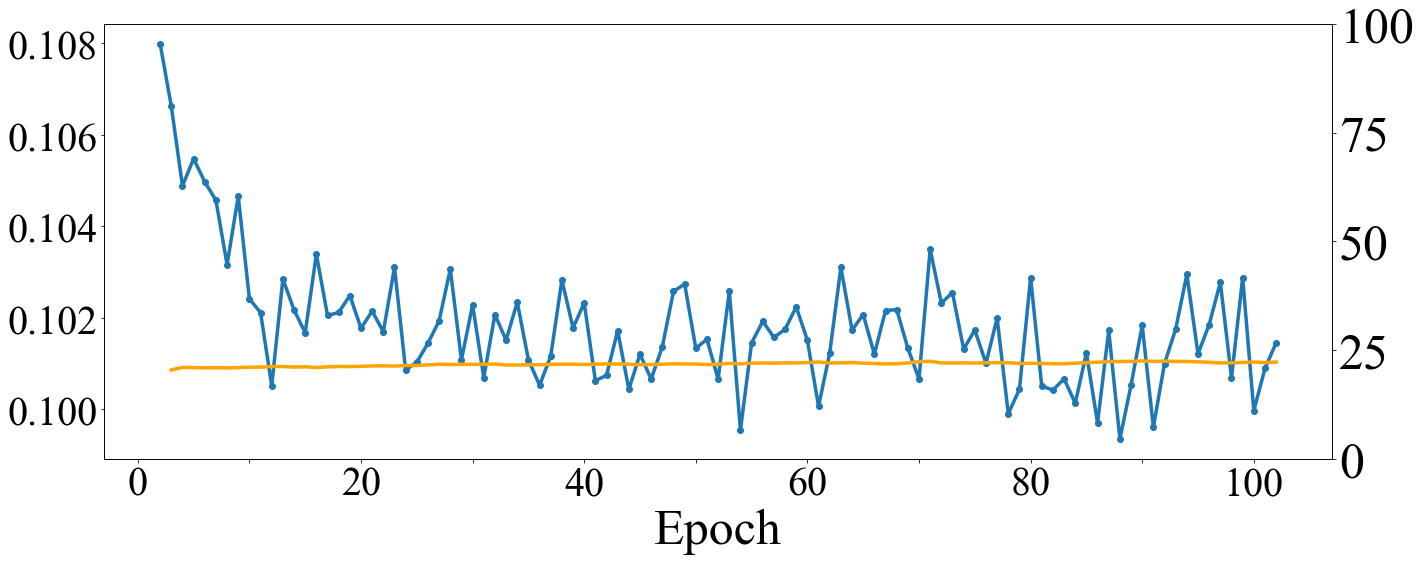

In [173]:
for data in datas:
    fig, ax1 = plt.subplots(figsize = (22, 8))
    v_score = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/v_score_query.csv'.format(data), index_col='Unnamed: 0')
    v_std = v_score.std()
    test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/test_history.csv'.format(data), index_col='Unnamed: 0')
    test_acc['epoch0'] = None
    test_acc = test_acc.reindex(columns=['epoch{}'.format(i) for i in range(0, 101)])
    ax1.plot(v_score.mean(), linewidth=3.5, marker='o')
    #ax1.errorbar(v_score.columns, v_score.mean(), yerr=v_std, fmt='-o')
    plt.xticks(np.arange(-2, 101, 10), ('0', '', '20', '', '40', '', '60', '', '80', '', '100'), fontsize = 50)
    ax2 = ax1.twinx()
    ax1.tick_params(labelsize=40)
    ax2.tick_params(labelsize=50)
    ax2.plot(test_acc.mean()*100, linewidth=3.5, color = 'orange')
    ax2.set_ylim(0, 100)
    ax1.set_xlabel("Epoch", fontsize=50)
    #plt.title(data, fontsize=40)
    plt.savefig('./img_pdf/v_score/query/err/1shot_{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    # plt.legend(fontsize=20, loc=1)
#plt.close()

In [840]:
v_score_s = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_020shot_full_default/v_score_support.csv'.format(data), index_col='Unnamed: 0')

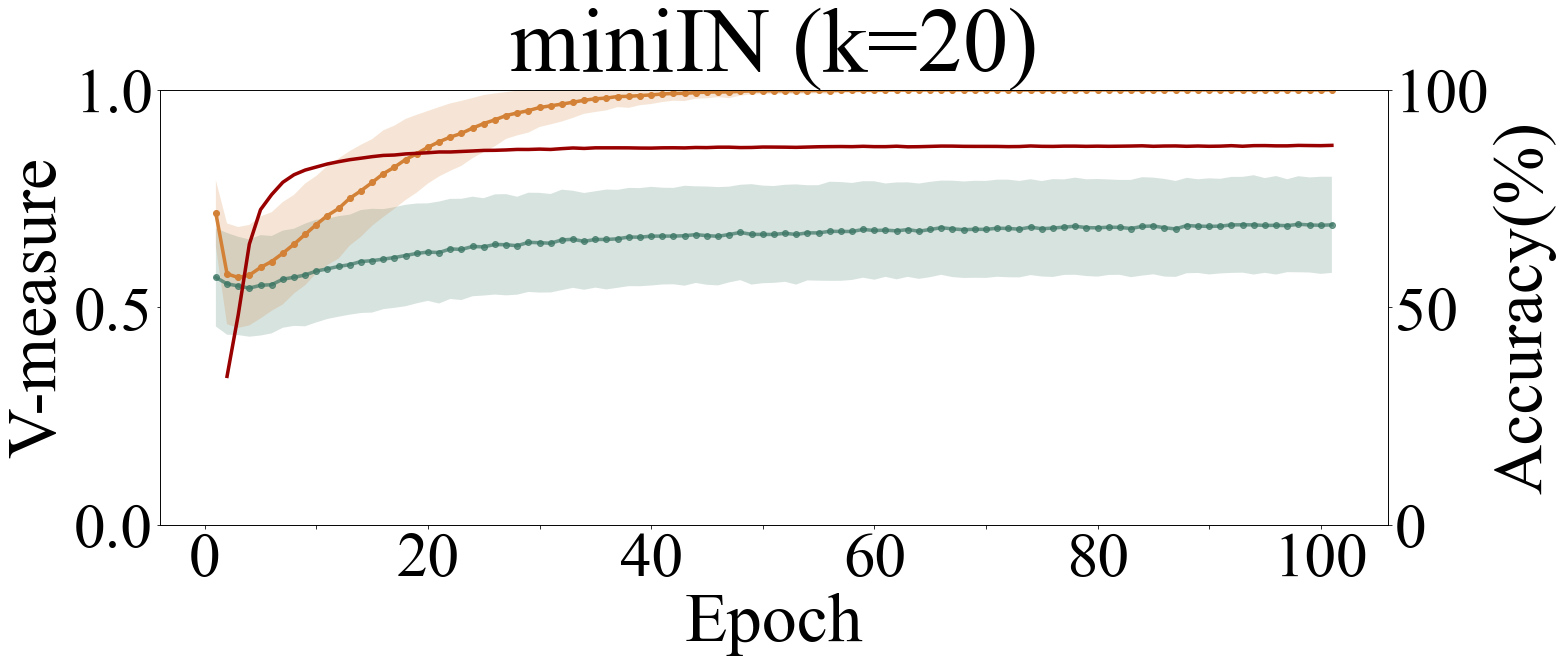

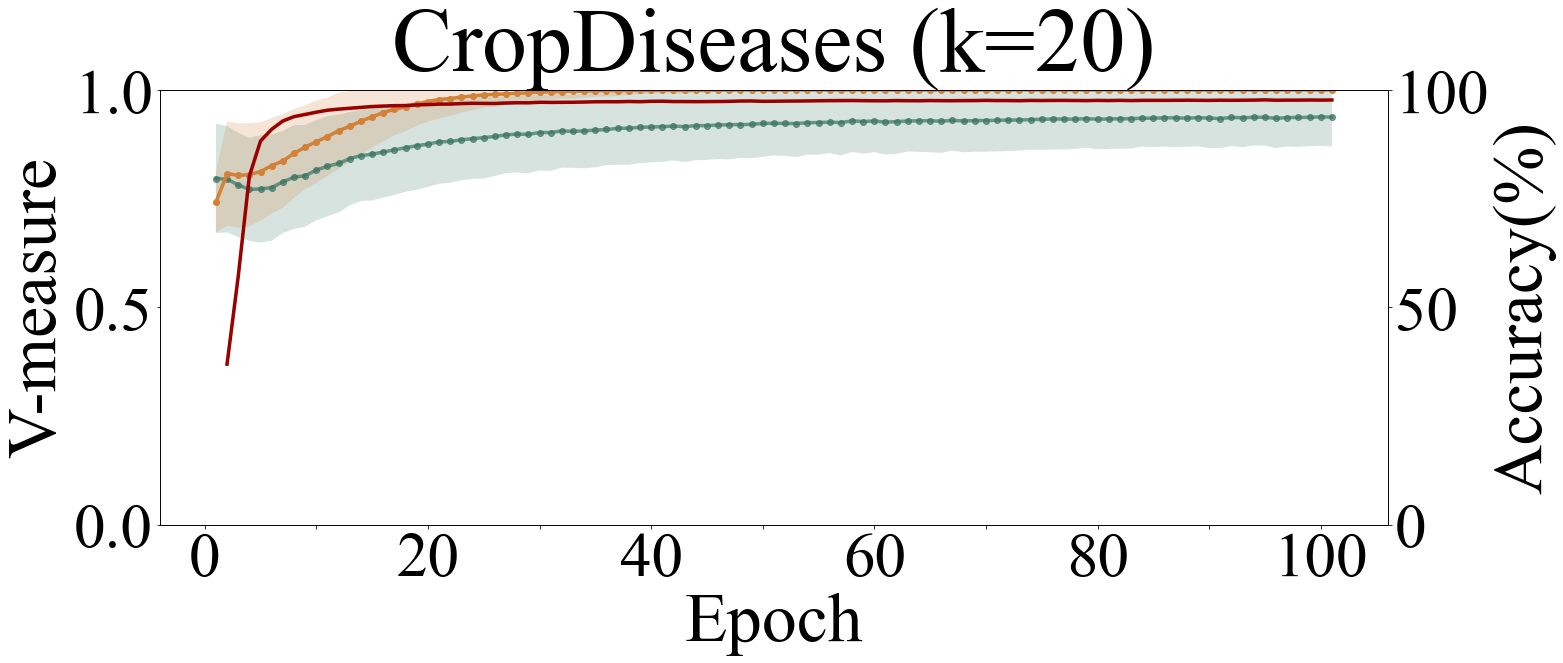

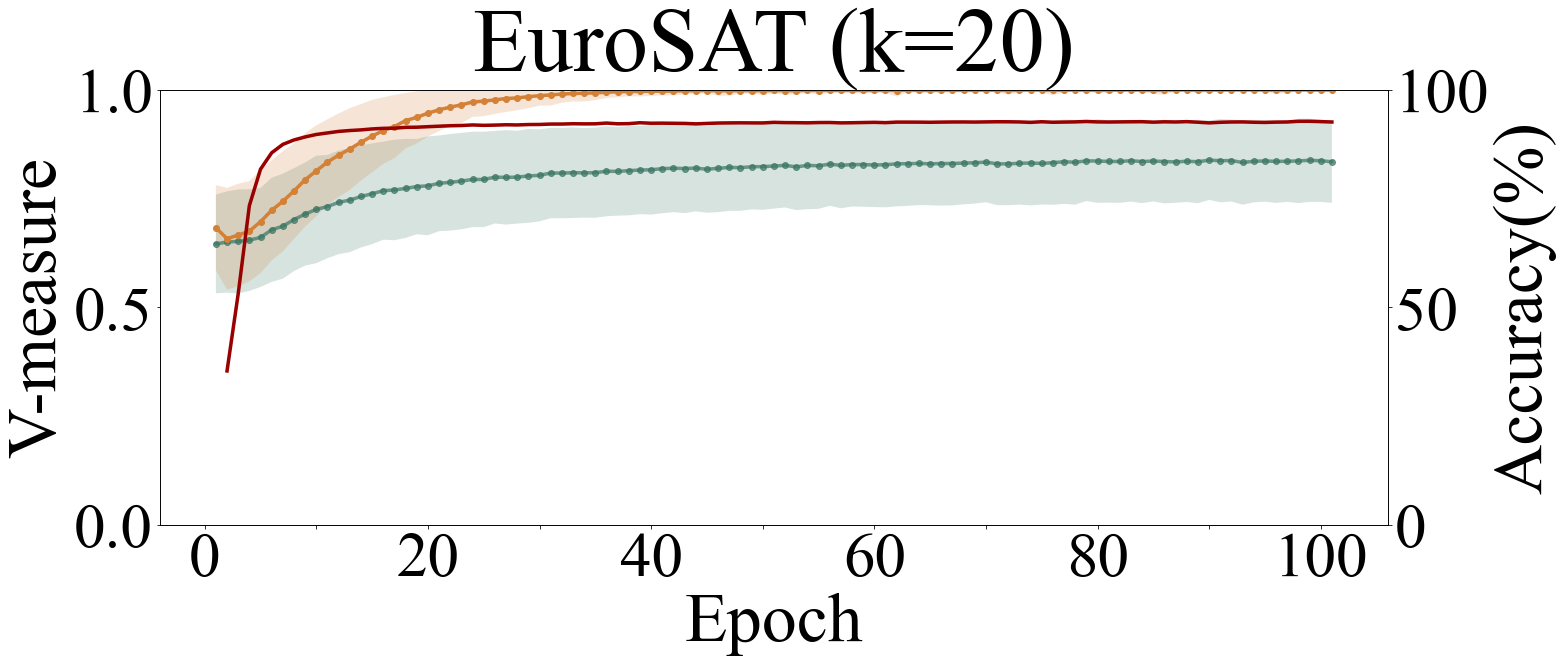

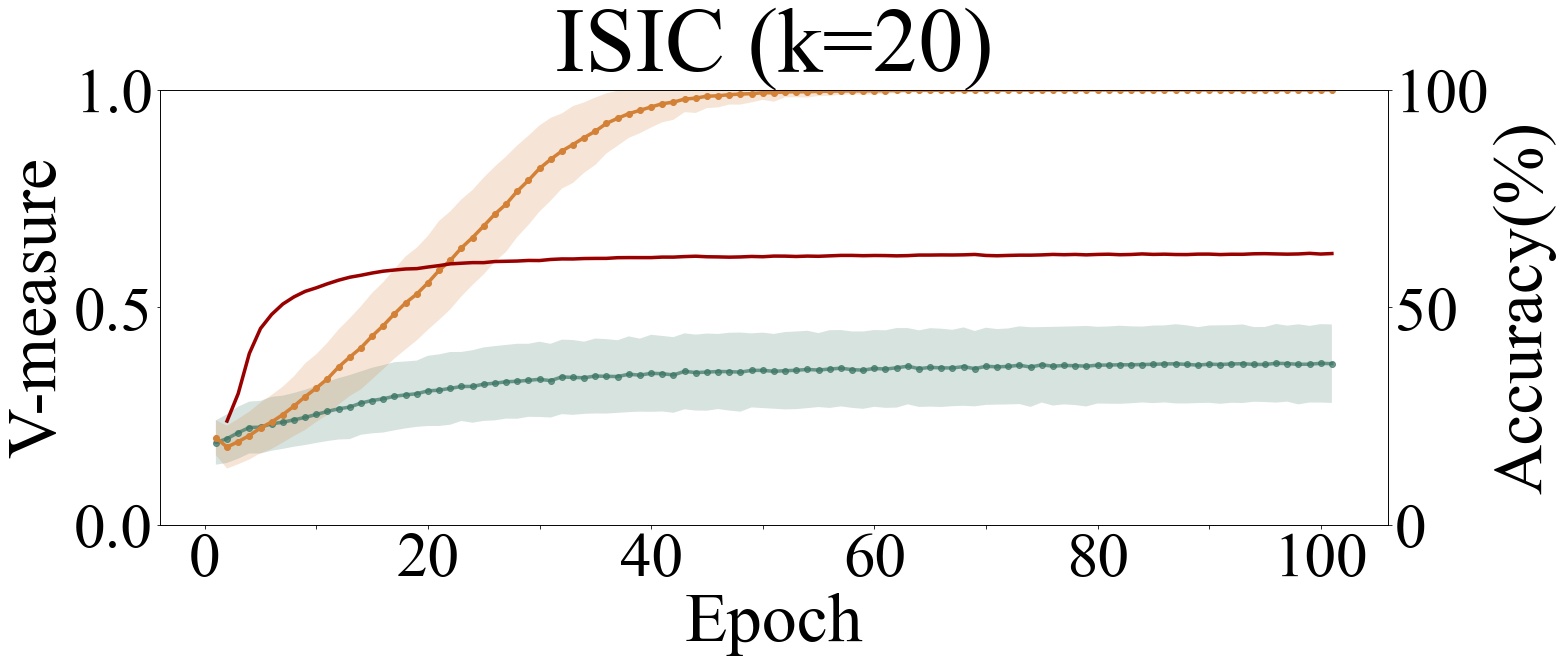

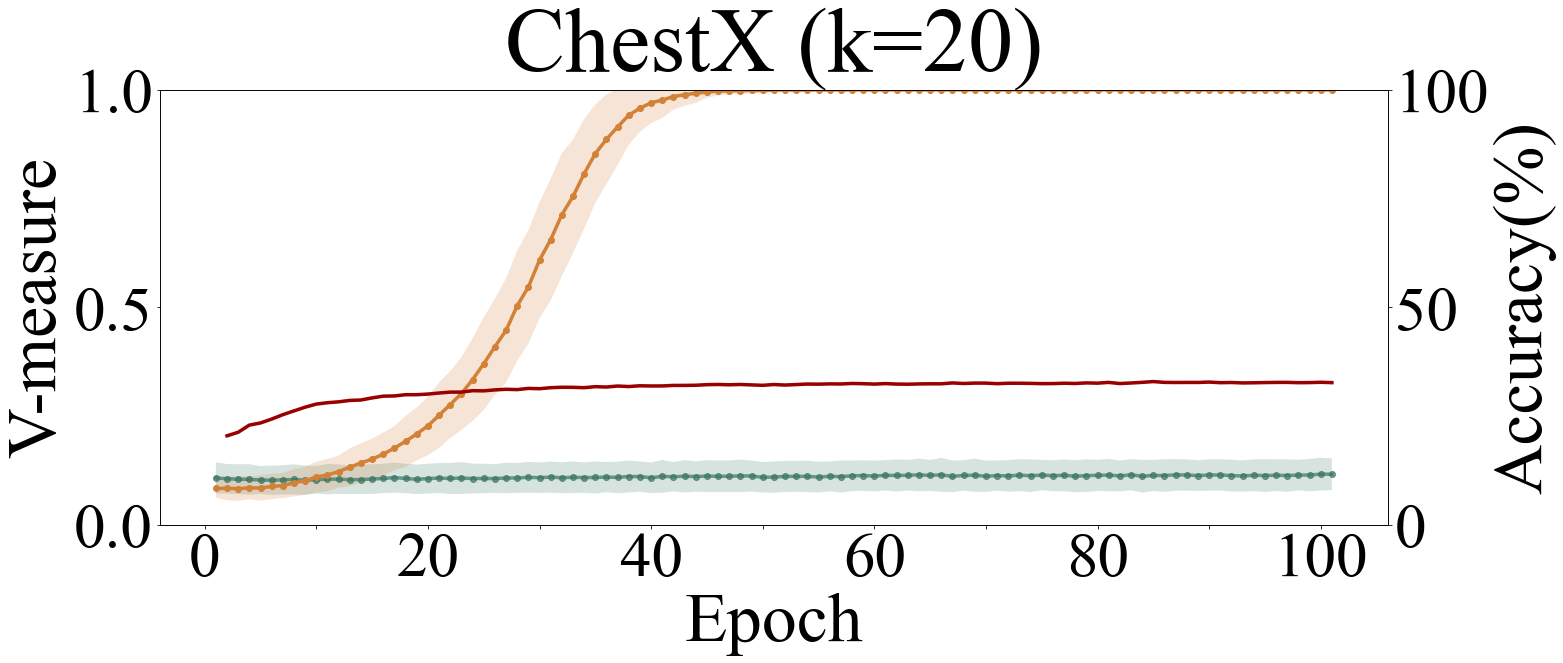

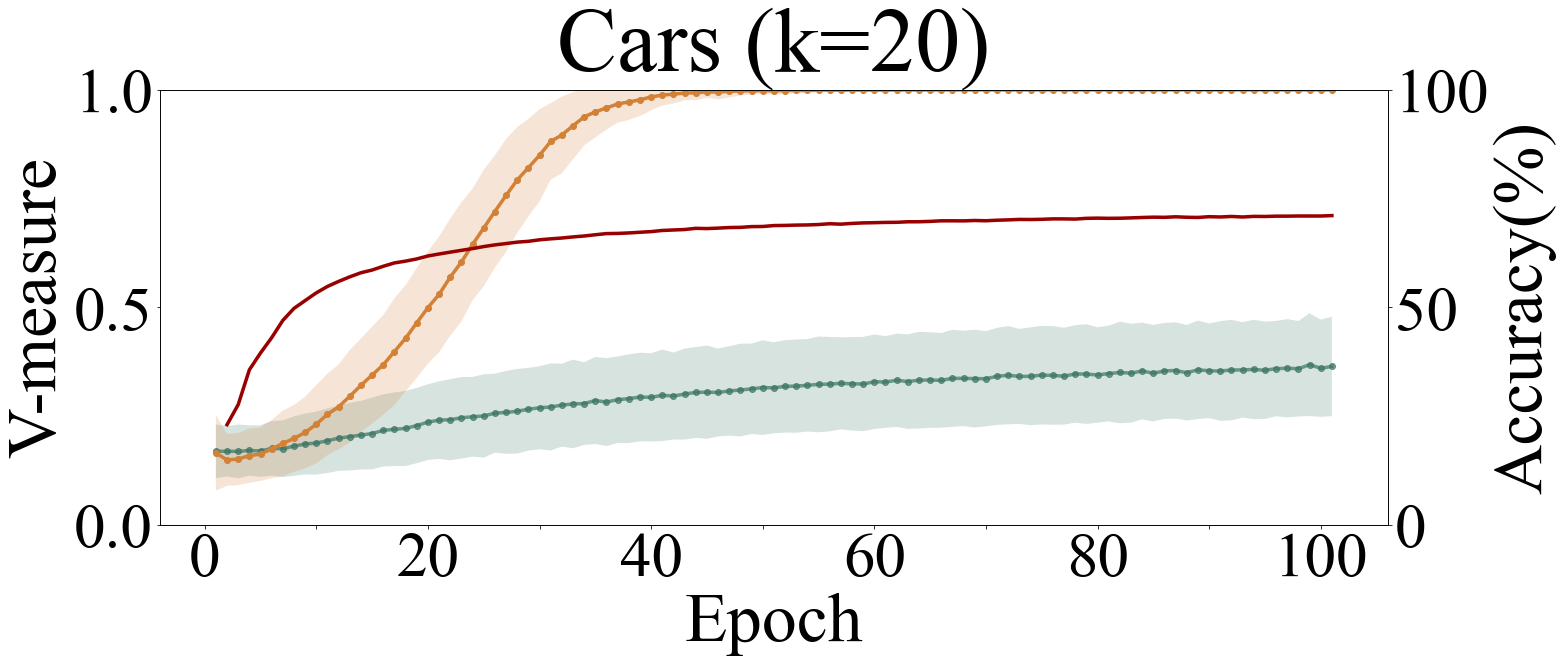

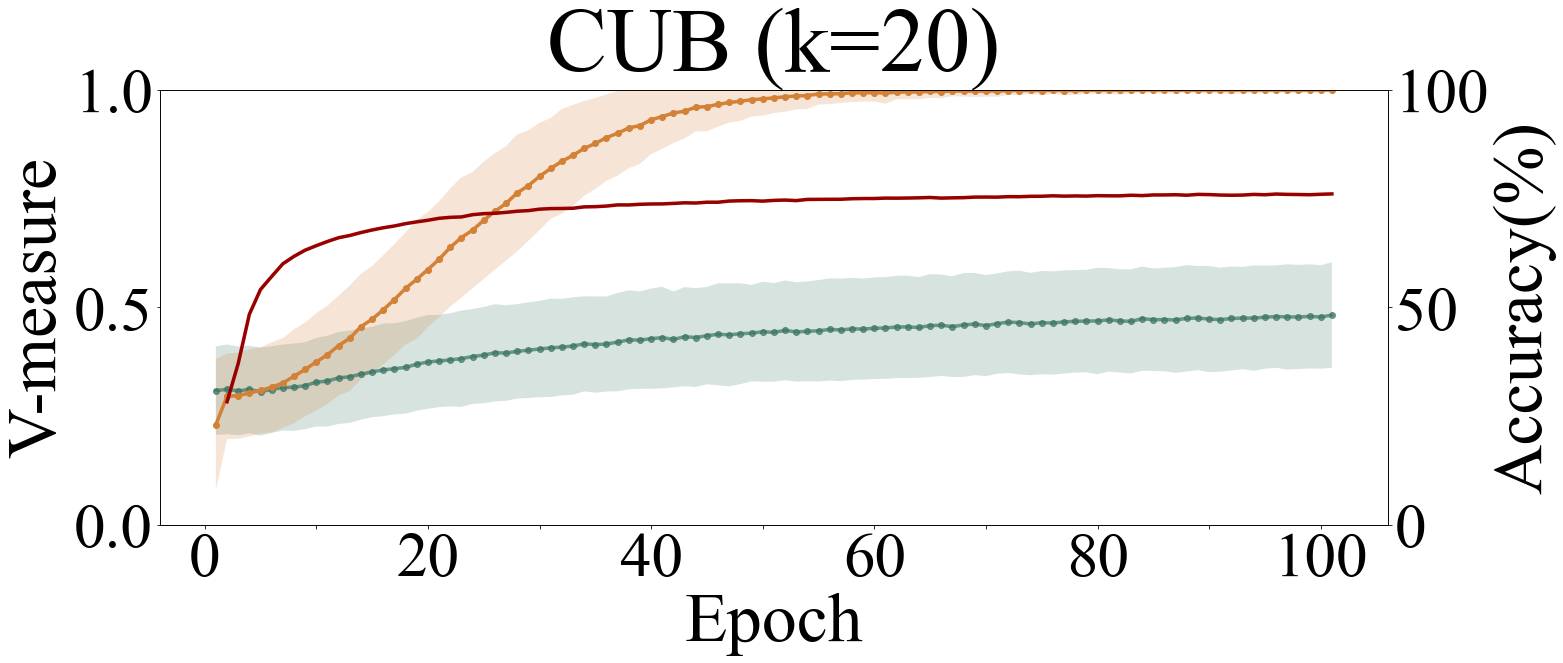

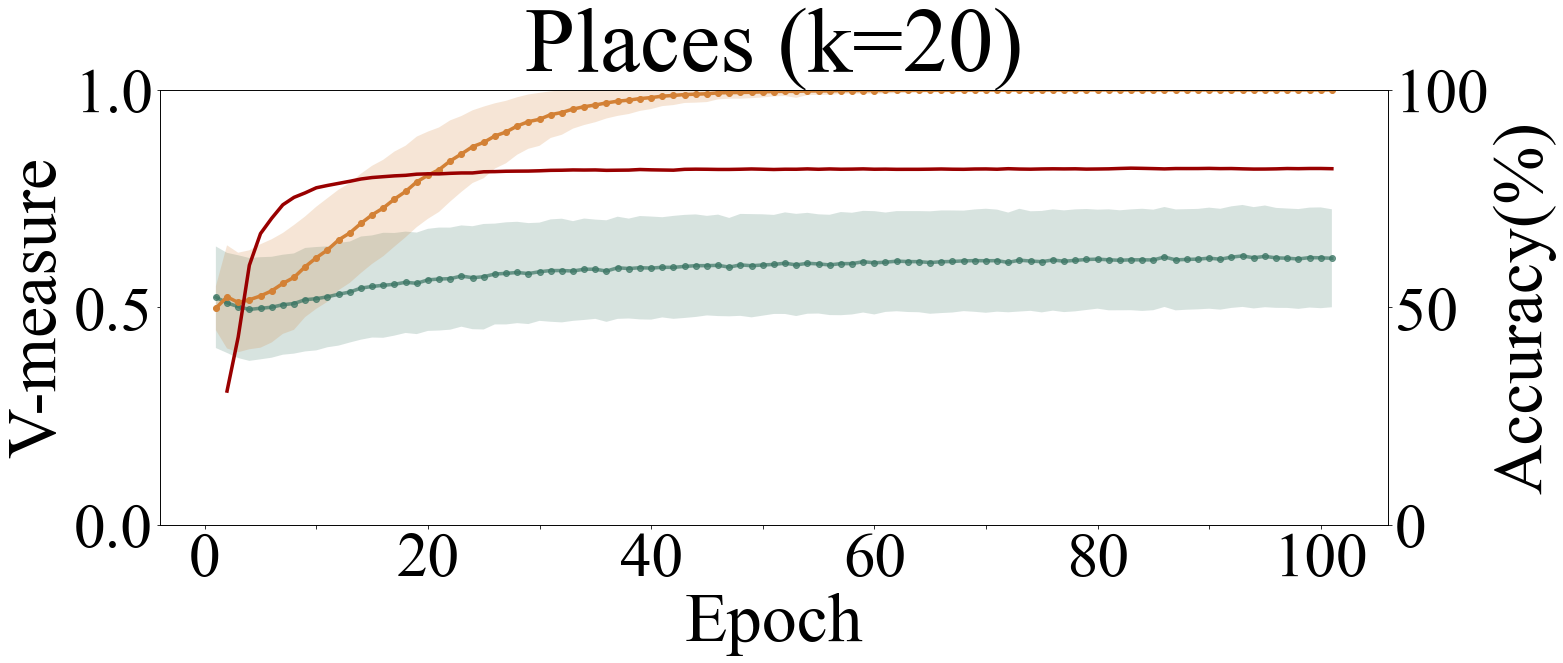

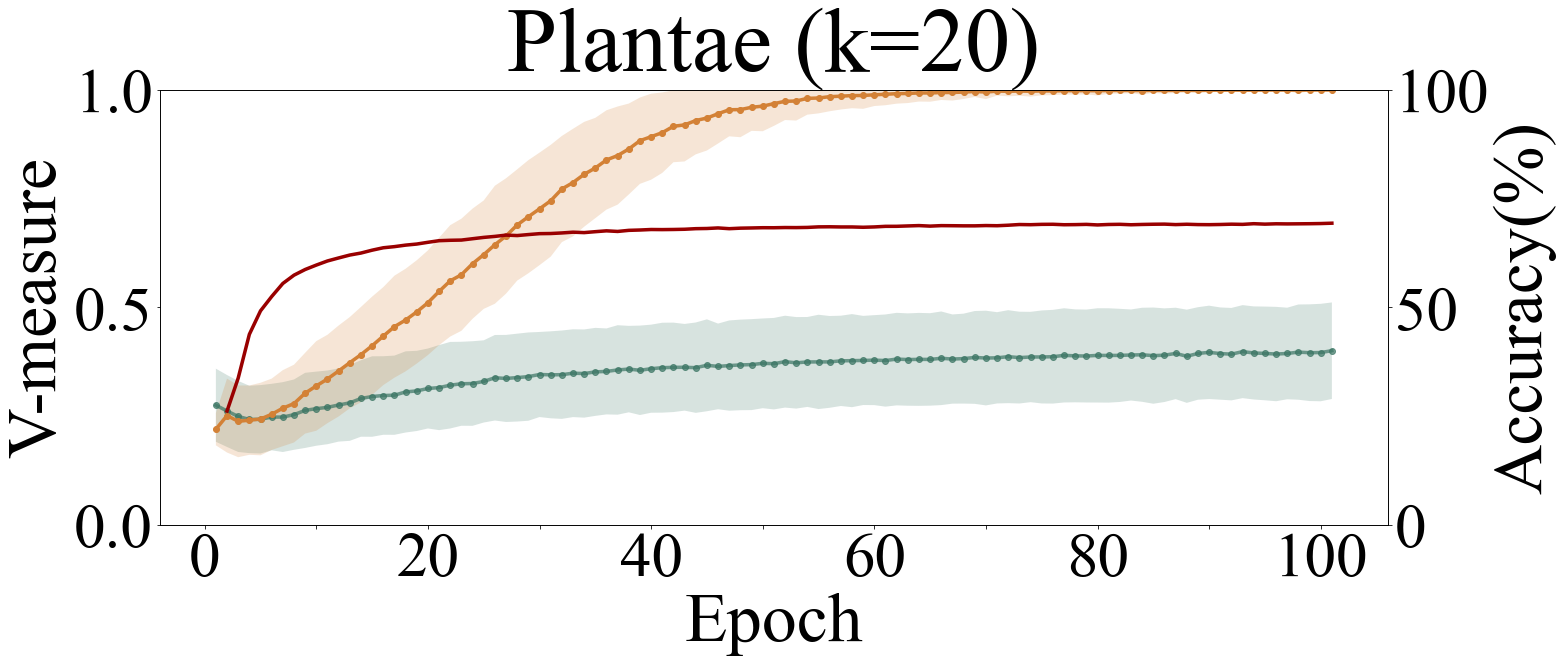

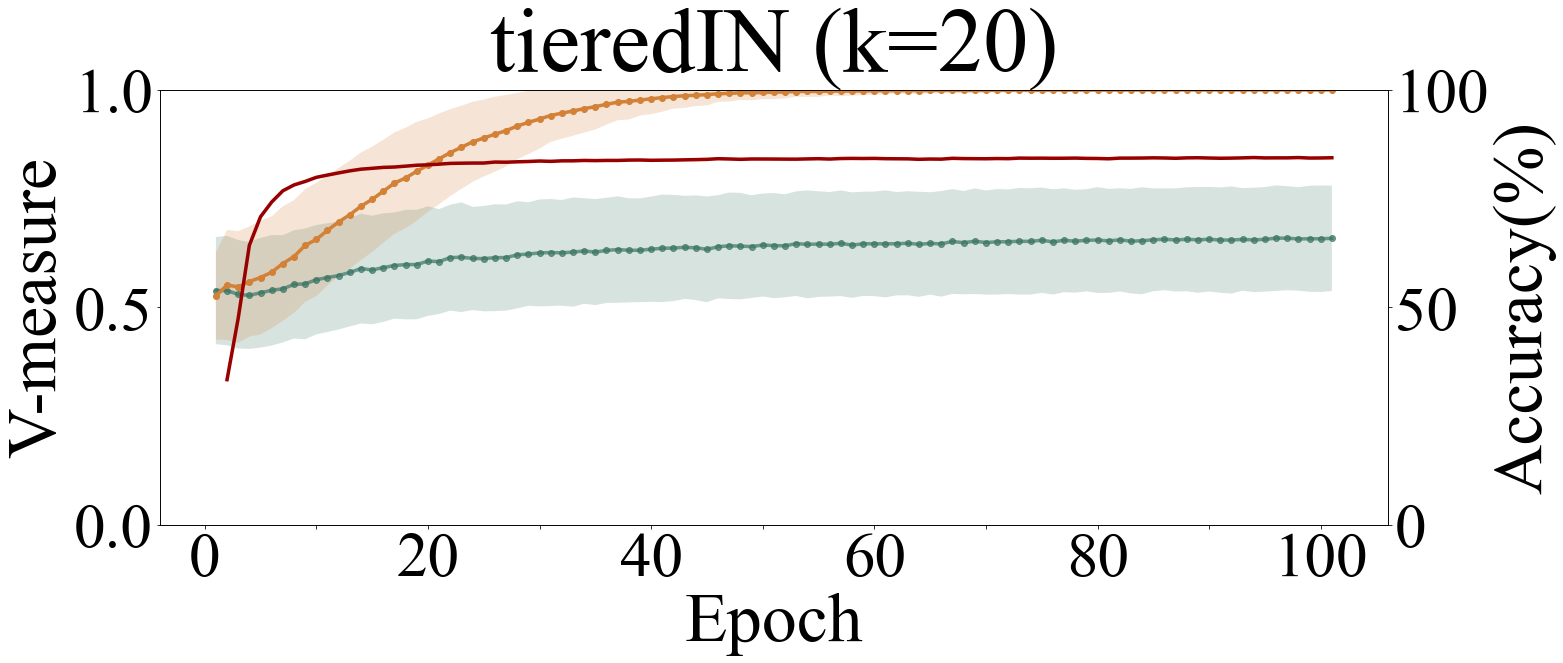

In [948]:
for idx, data in enumerate(datas+datas_fg):
    fig, ax1 = plt.subplots(figsize = (22, 8))
    v_score = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_020shot_full_default/v_score_query.csv'.format(data), index_col='Unnamed: 0')
    v_score_s = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_020shot_full_default/v_score_support.csv'.format(data), index_col='Unnamed: 0')

    test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_020shot_full_default/test_history.csv'.format(data), index_col='Unnamed: 0')
    test_acc['epoch0'] = None
    test_acc = test_acc.reindex(columns=['epoch{}'.format(i) for i in range(0, 101)])
    
    mu = v_score.mean()
    sigma = v_score.std()
    mu_s = v_score_s.mean()
    sigma_s = v_score_s.std()
    
    ax1.fill_between(v_score.columns, mu+sigma, mu-sigma, facecolor='#3a7563', alpha=0.2, label='k=20')
    ax1.fill_between(v_score_s.columns, mu_s+sigma_s, mu_s-sigma_s, facecolor='#d38136', alpha=0.2, label='k=20')
    ax1.plot(mu, linewidth=3.5, marker='o', color = '#3a7563', alpha=0.7)
    ax1.plot(mu_s, linewidth=3.5, marker='o', color = '#d38136')
    plt.xticks(np.arange(-1, 100, 10), ('0', '', '20', '', '40', '', '60', '', '80', '', '100'), fontsize = 70)
    ax1.set_xlabel("Epoch", fontsize=70)
    ax1.set_ylabel("V-measure", fontsize=70)
    ax1.tick_params(labelsize=63)
    ax1.set_ylim(0, 1)
    
    ax2 = ax1.twinx()
    ax2.plot(test_acc.mean()*100, linewidth=3.5, color = '#990000')
    ax2.set_ylim(0, 100)
    ax2.tick_params(labelsize=63)
    ax2.set_ylabel("Accuracy(%)", fontsize=70)
    plt.title(datas_full[idx]+" (k=20)", loc='center', fontsize = 90)
    plt.savefig('./img_pdf/v_score/20shot_{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    # plt.legend(fontsize=20, loc=1)
#plt.close()

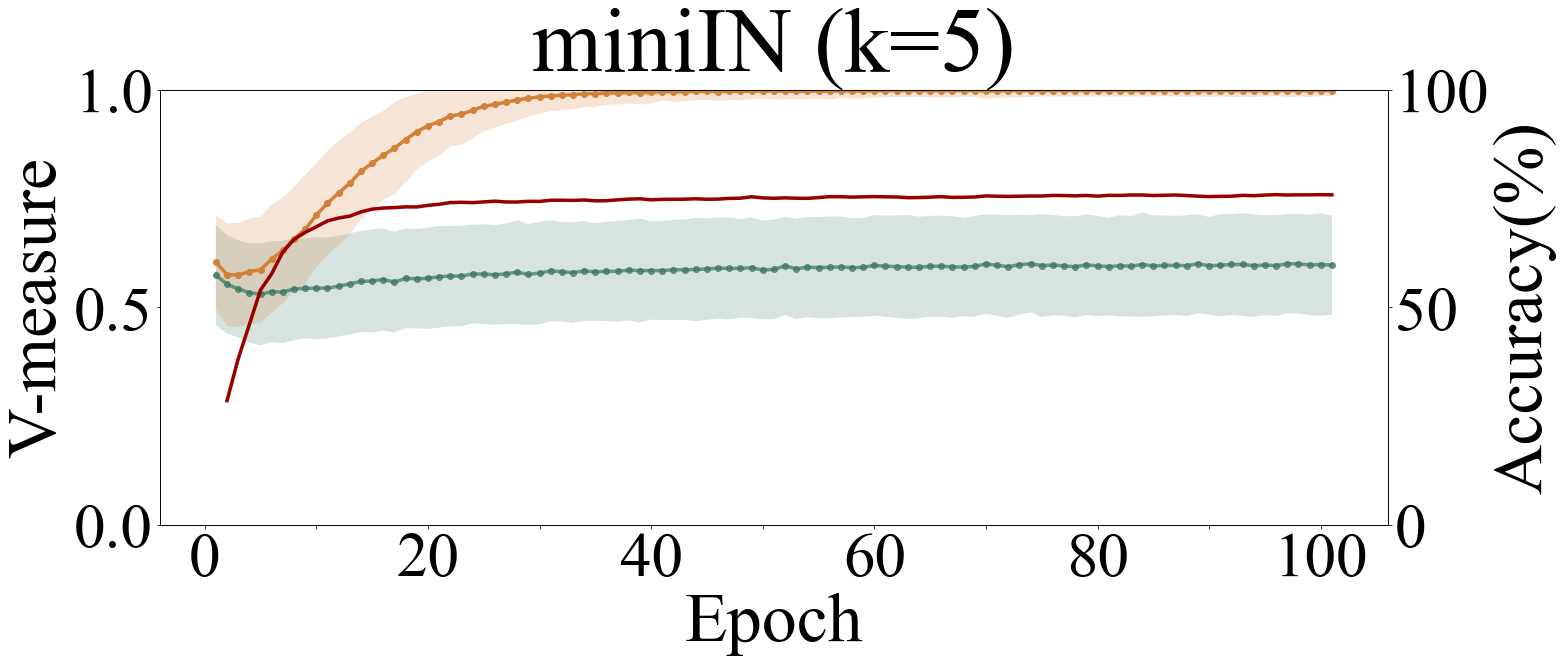

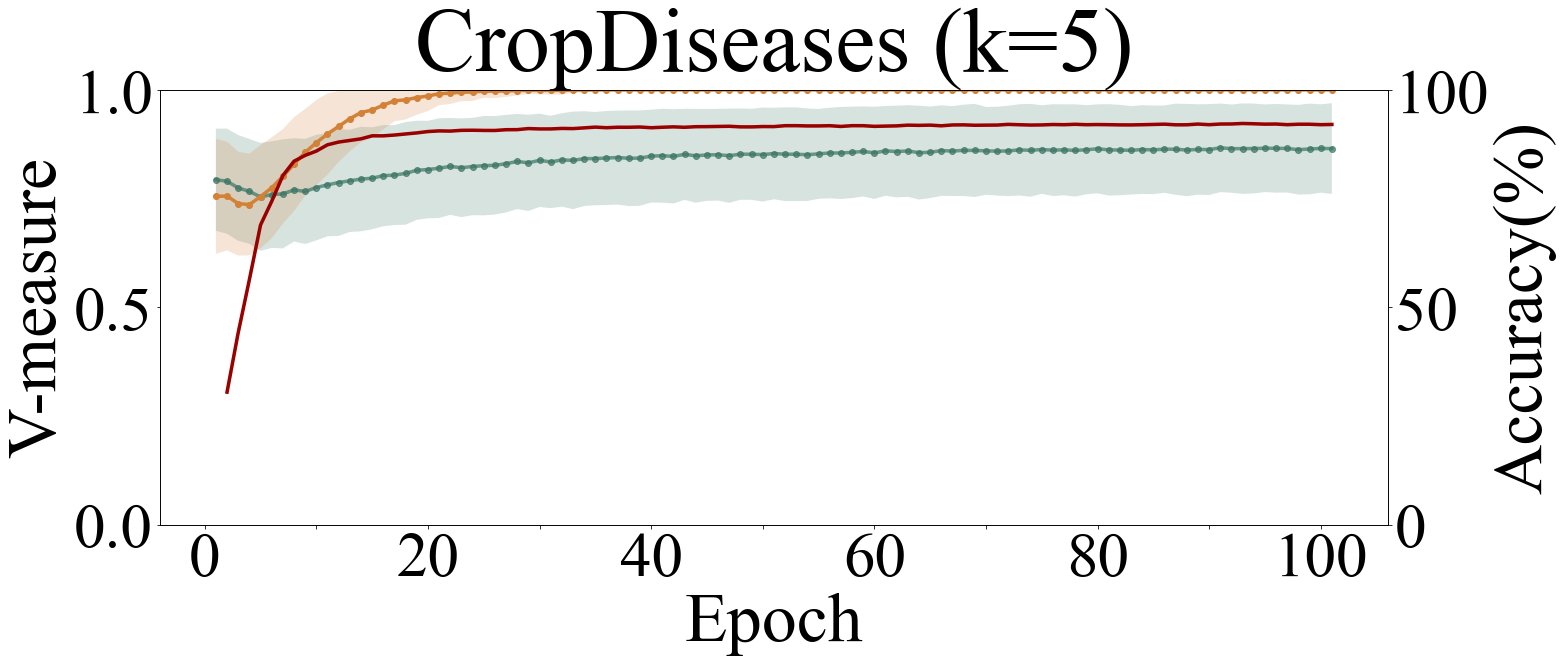

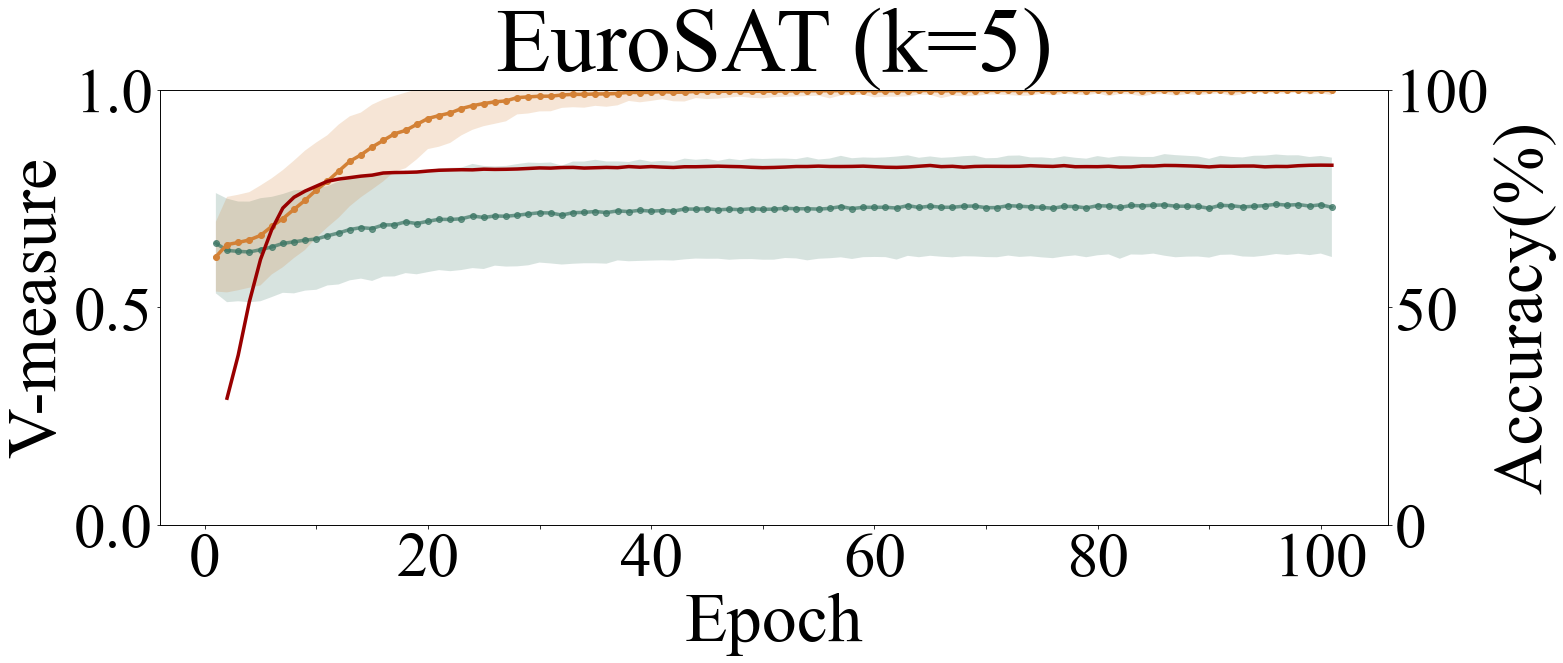

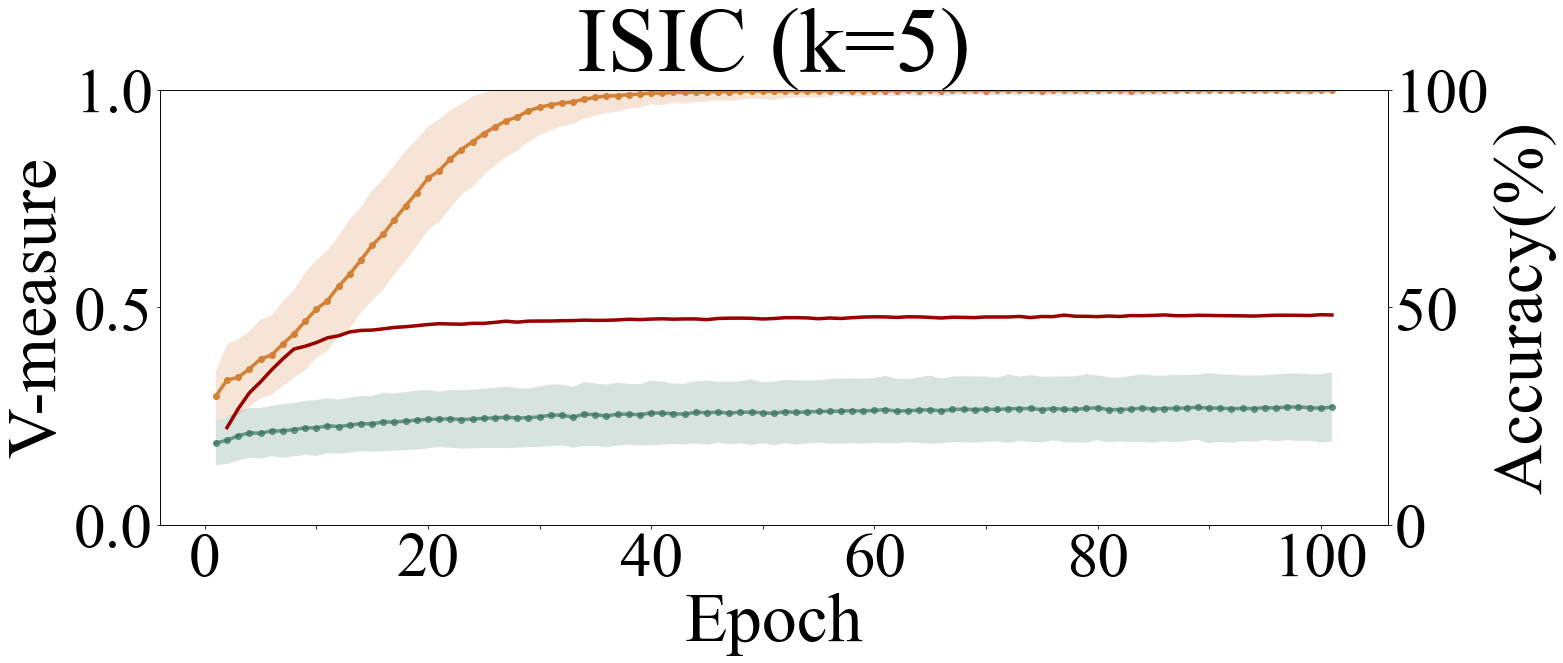

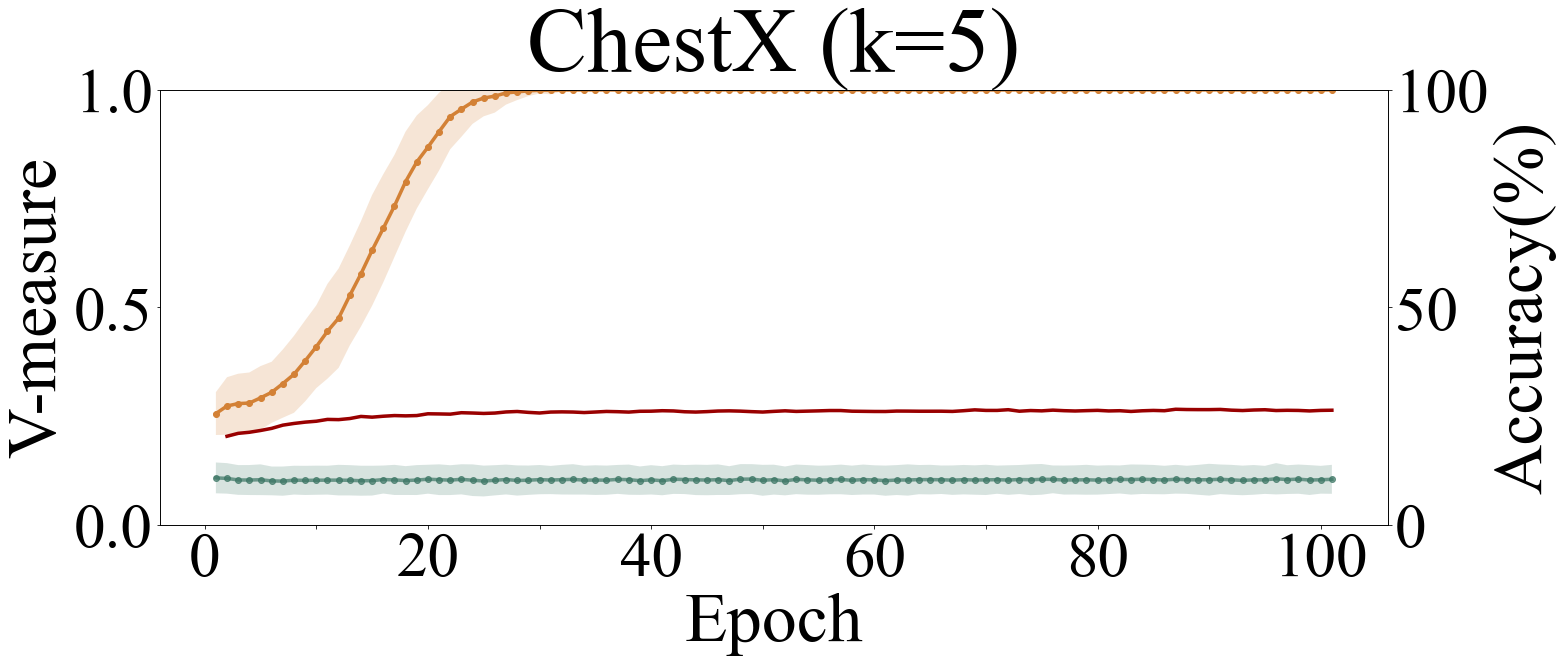

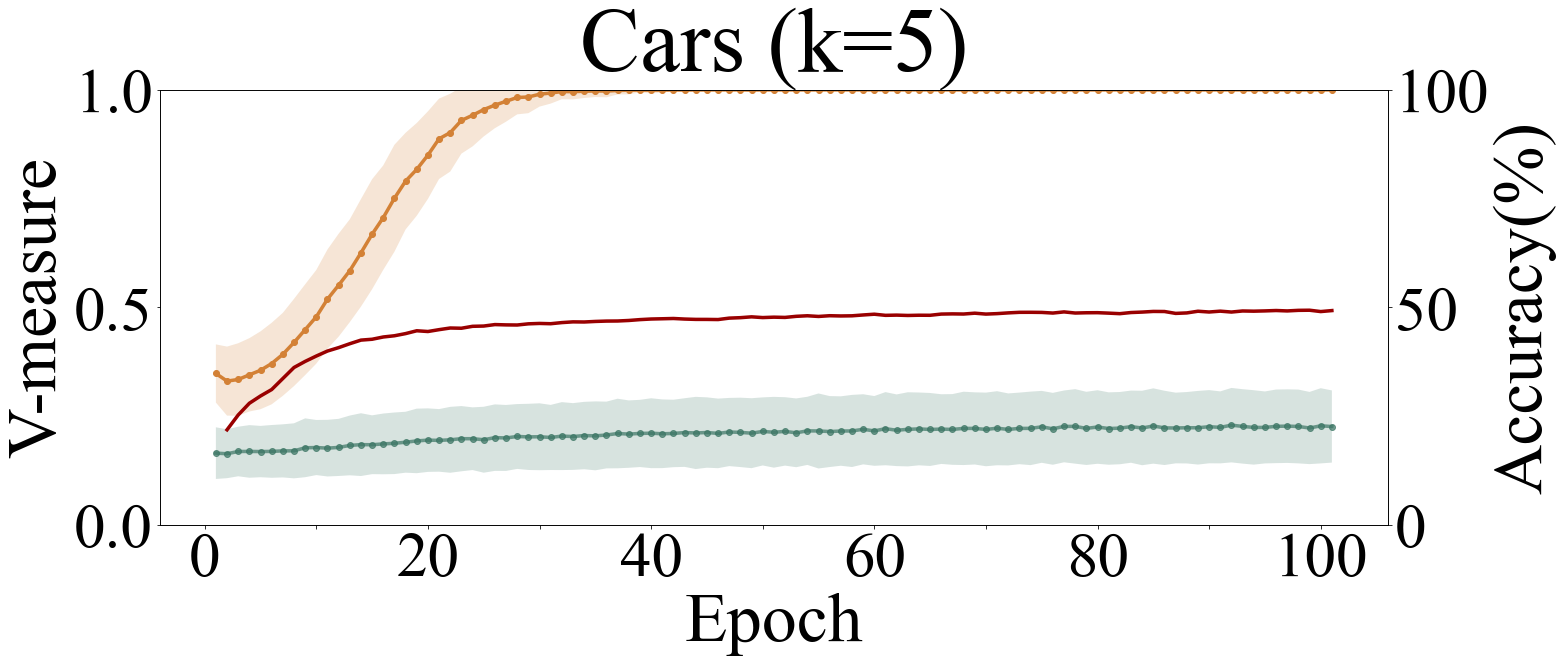

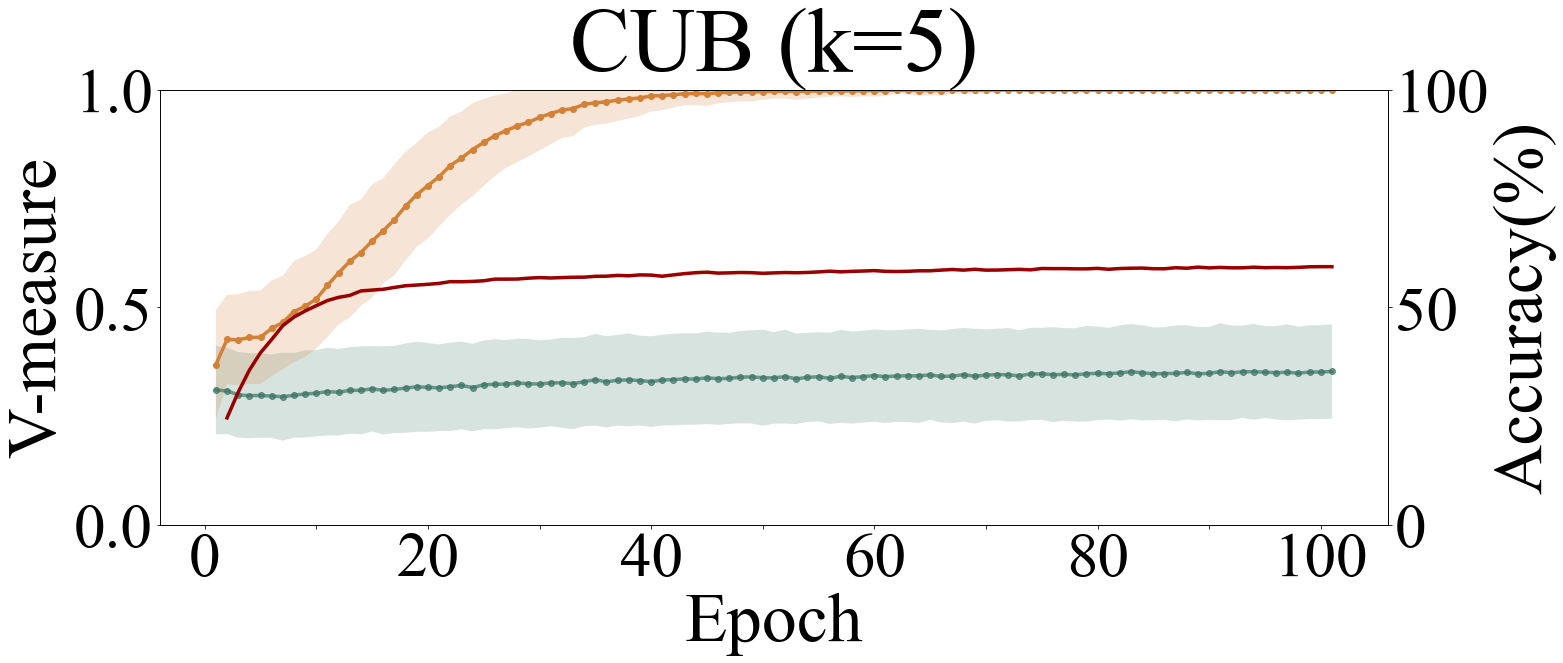

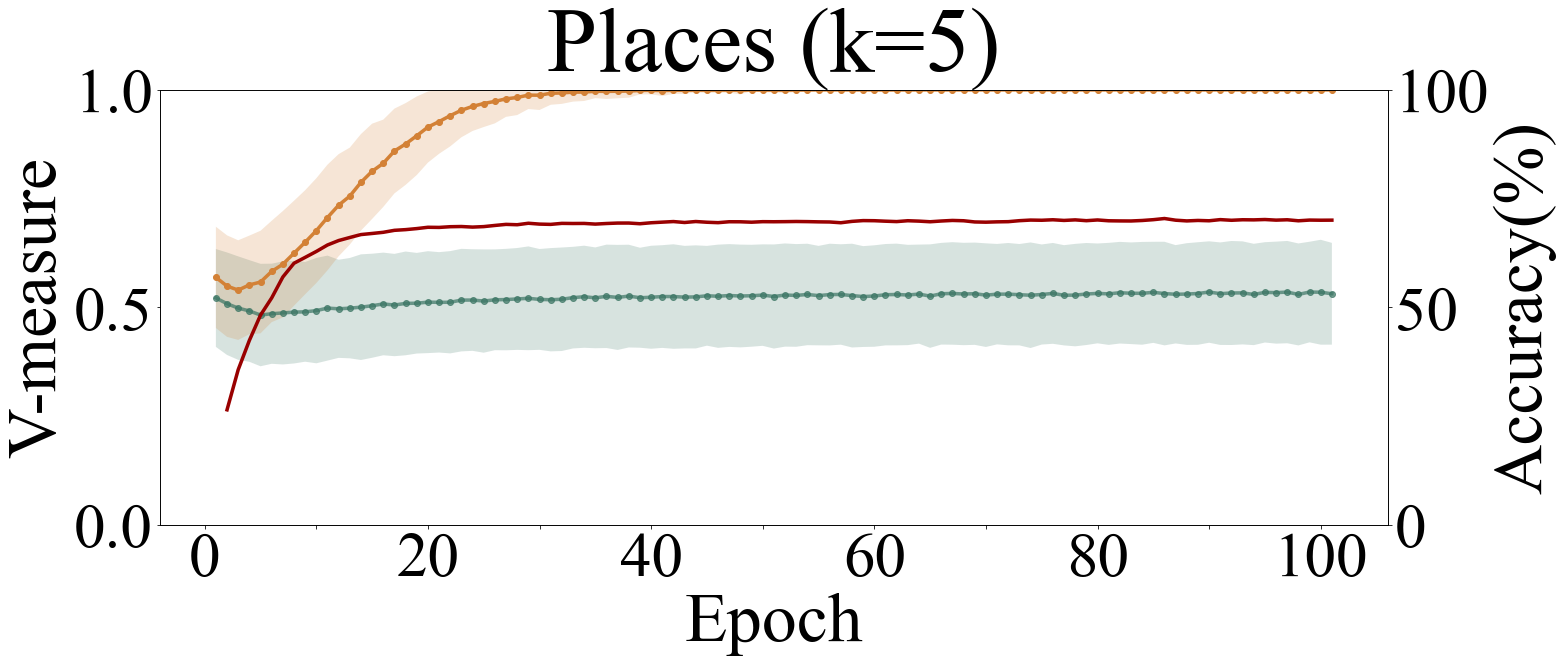

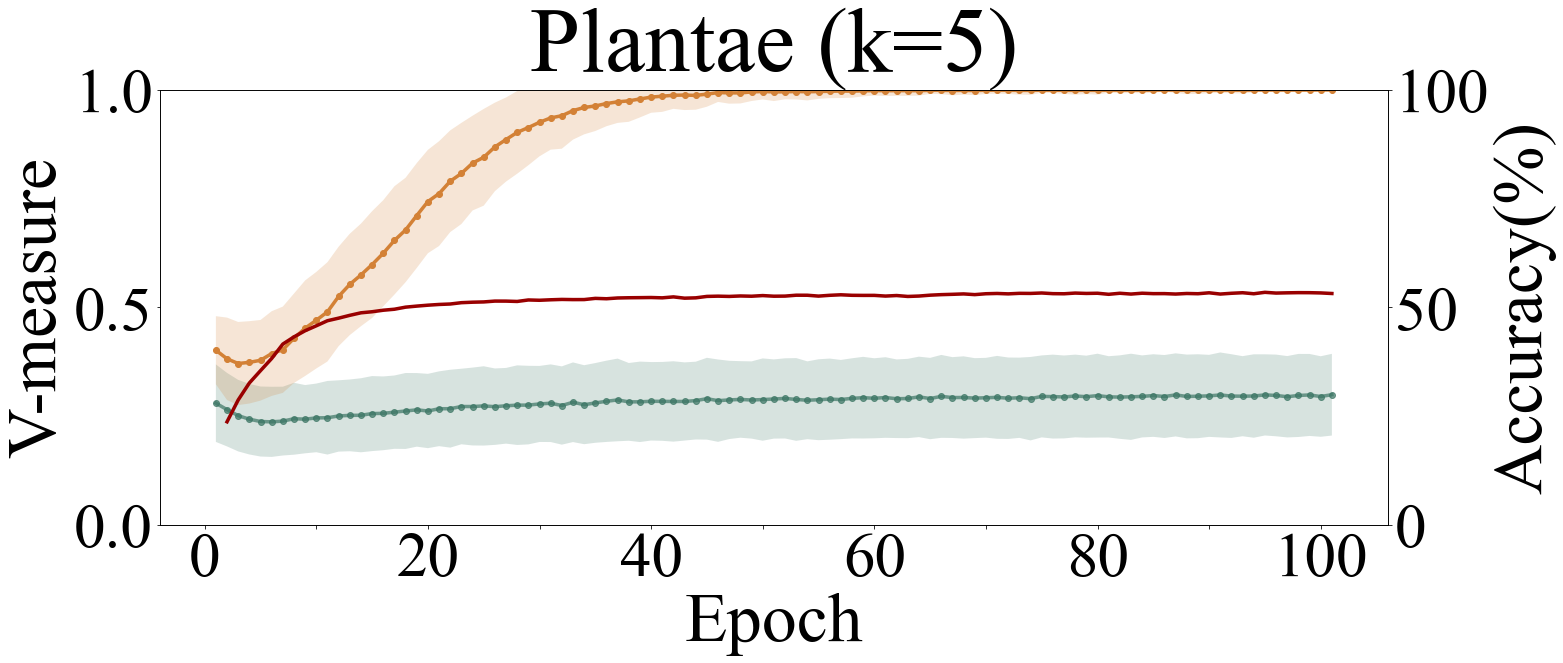

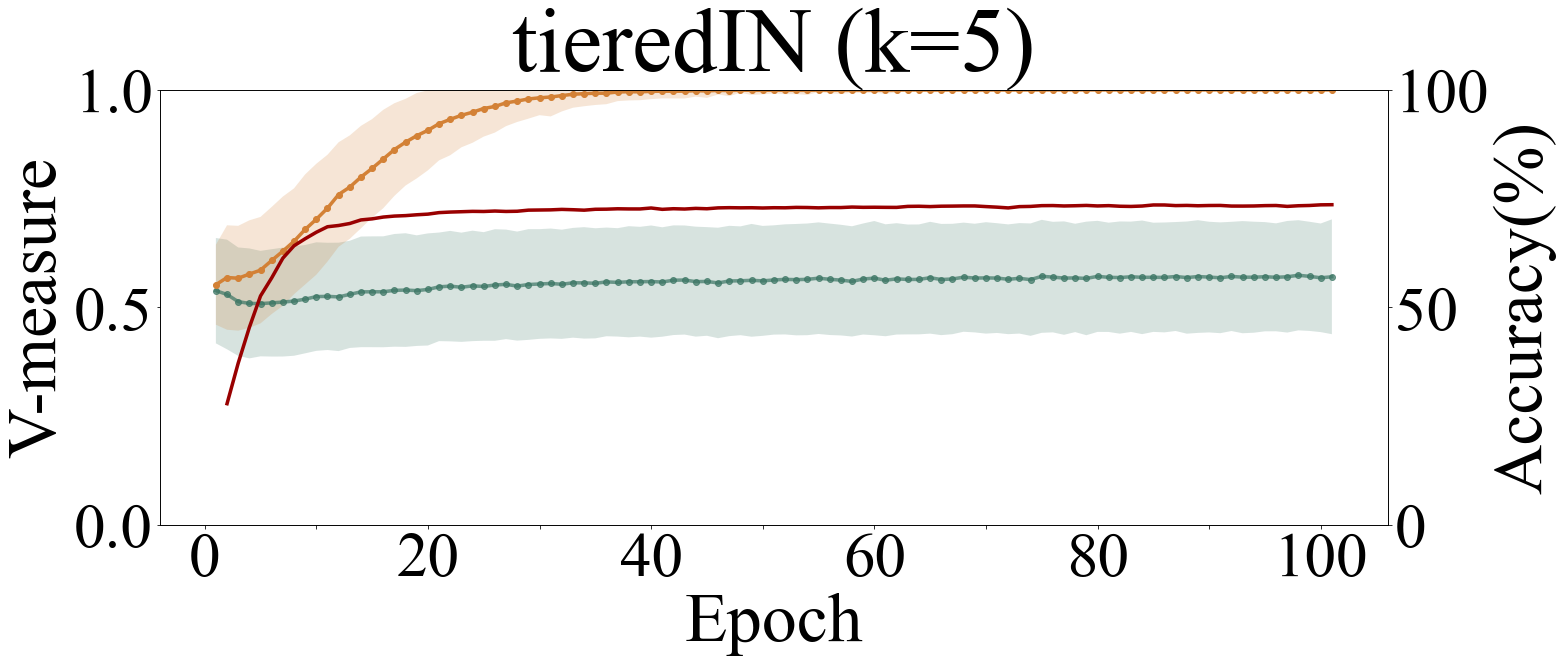

In [951]:
for idx, data in enumerate(datas+datas_fg):
    fig, ax1 = plt.subplots(figsize = (22, 8))
    v_score = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/v_score_query.csv'.format(data), index_col='Unnamed: 0')
    v_score_s = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/v_score_support.csv'.format(data), index_col='Unnamed: 0')

    test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/test_history.csv'.format(data), index_col='Unnamed: 0')
    test_acc['epoch0'] = None
    test_acc = test_acc.reindex(columns=['epoch{}'.format(i) for i in range(0, 101)])
    
    if 'epoch0.1' in v_score.columns:
        del v_score['epoch0.1']
    
    mu = v_score.mean()
    sigma = v_score.std()
    mu_s = v_score_s.mean()
    sigma_s = v_score_s.std()
    
    ax1.fill_between(v_score.columns, mu+sigma, mu-sigma, facecolor='#3a7563', alpha=0.2, label='k=20')
    ax1.fill_between(v_score_s.columns, mu_s+sigma_s, mu_s-sigma_s, facecolor='#d38136', alpha=0.2, label='k=20')
    ax1.plot(mu, linewidth=3.5, marker='o', color = '#3a7563', alpha=0.7)
    ax1.plot(mu_s, linewidth=3.5, marker='o', color = '#d38136')
    plt.xticks(np.arange(-1, 100, 10), ('0', '', '20', '', '40', '', '60', '', '80', '', '100'), fontsize = 70)
    ax1.set_xlabel("Epoch", fontsize=70)
    ax1.set_ylabel("V-measure", fontsize=70)
    ax1.tick_params(labelsize=63)
    ax1.set_ylim(0, 1)
    
    ax2 = ax1.twinx()
    ax2.plot(test_acc.mean()*100, linewidth=3.5, color = '#990000')
    ax2.set_ylim(0, 100)
    ax2.tick_params(labelsize=63)
    ax2.set_ylabel("Accuracy(%)", fontsize=70)
    plt.title(datas_full[idx]+" (k=5)", loc='center', fontsize = 90)
    #plt.title(data, fontsize=40)
    plt.savefig('./img_pdf/v_score/05shot_{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    # plt.legend(fontsize=20, loc=1)
#plt.close()

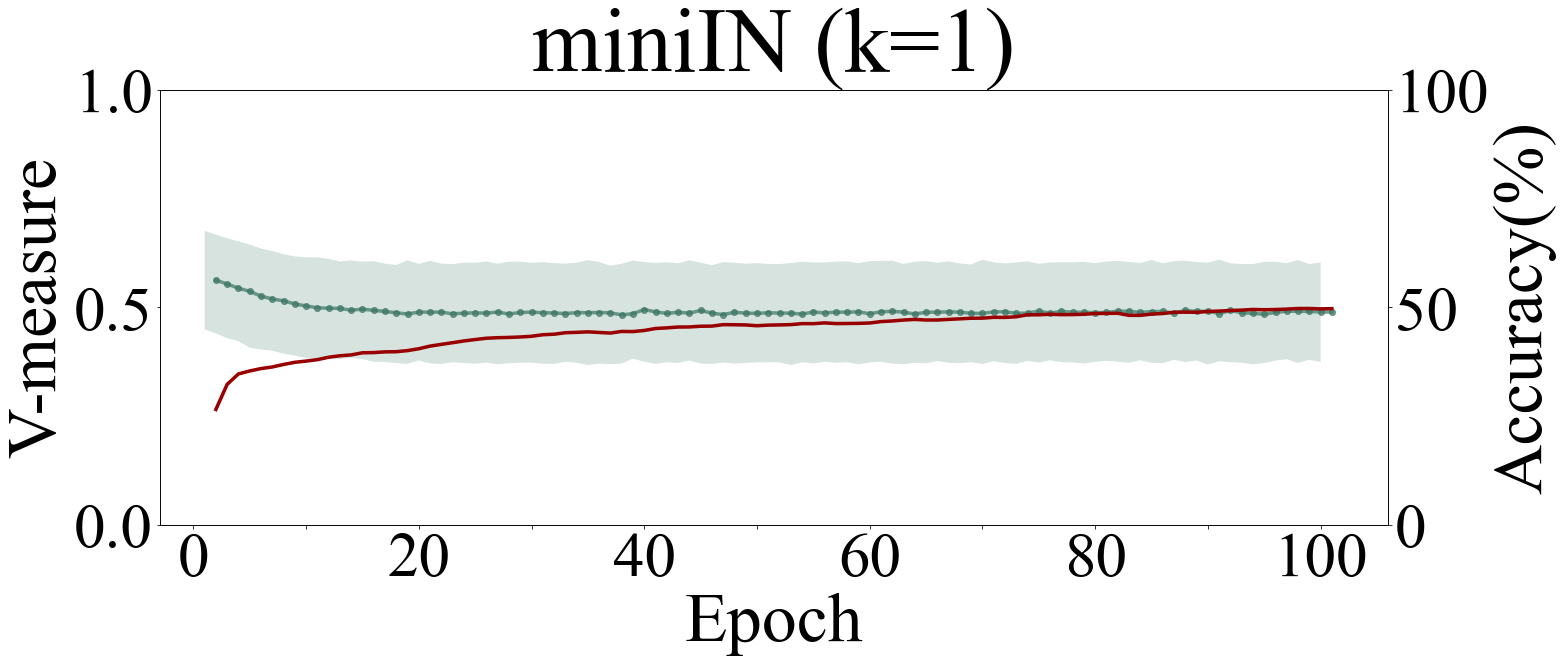

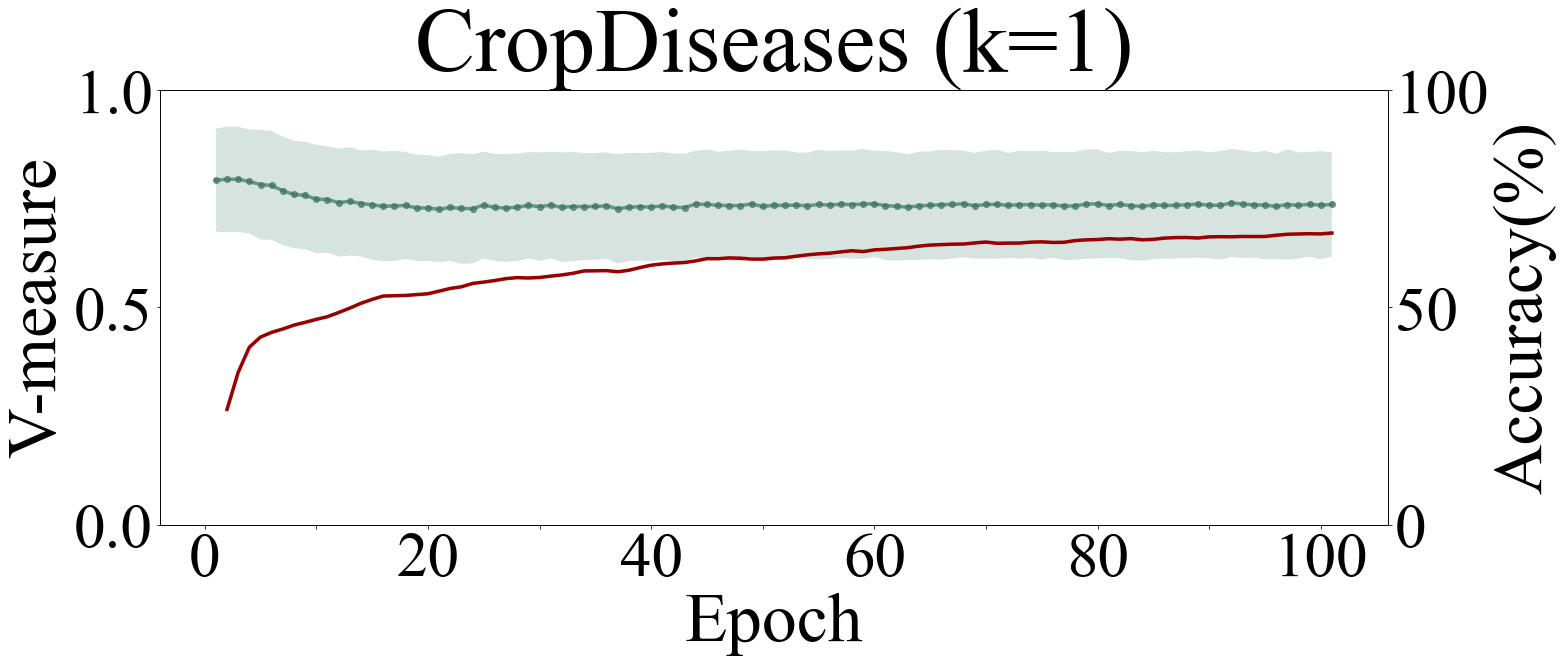

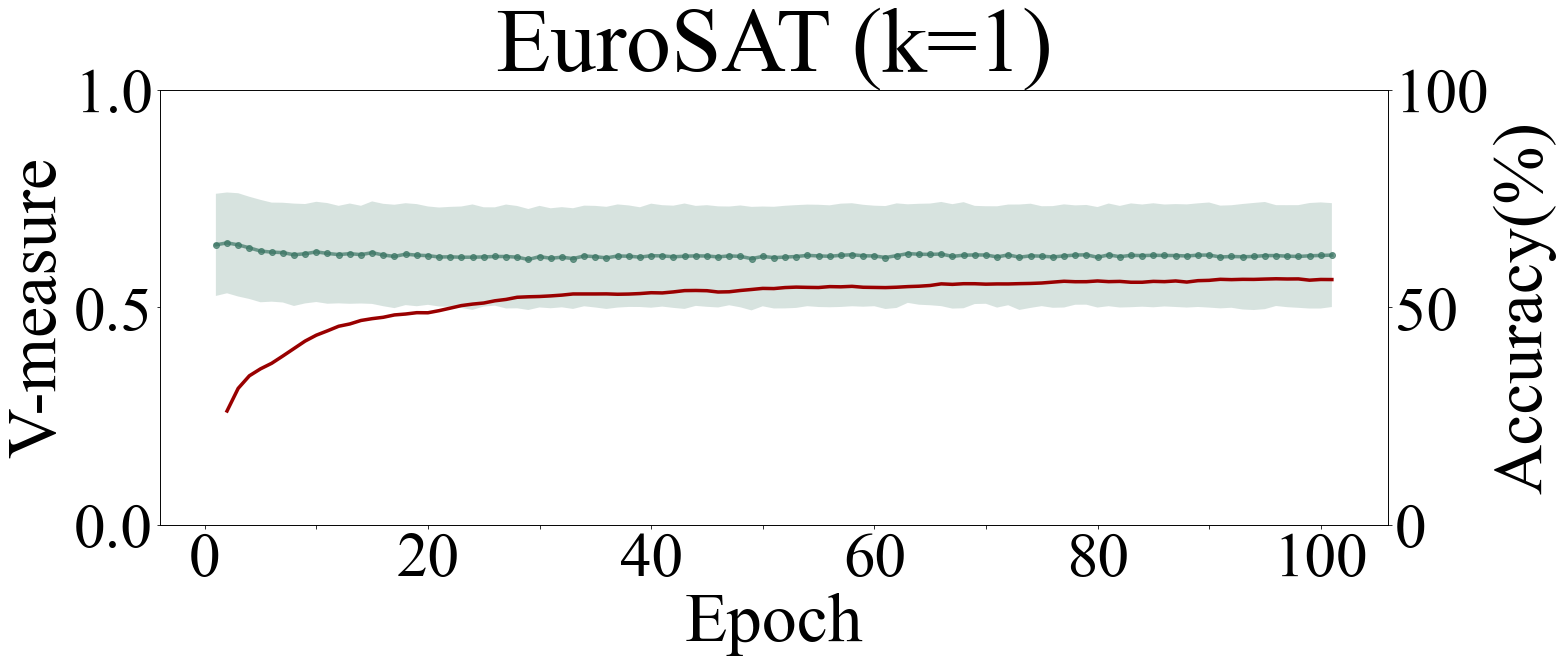

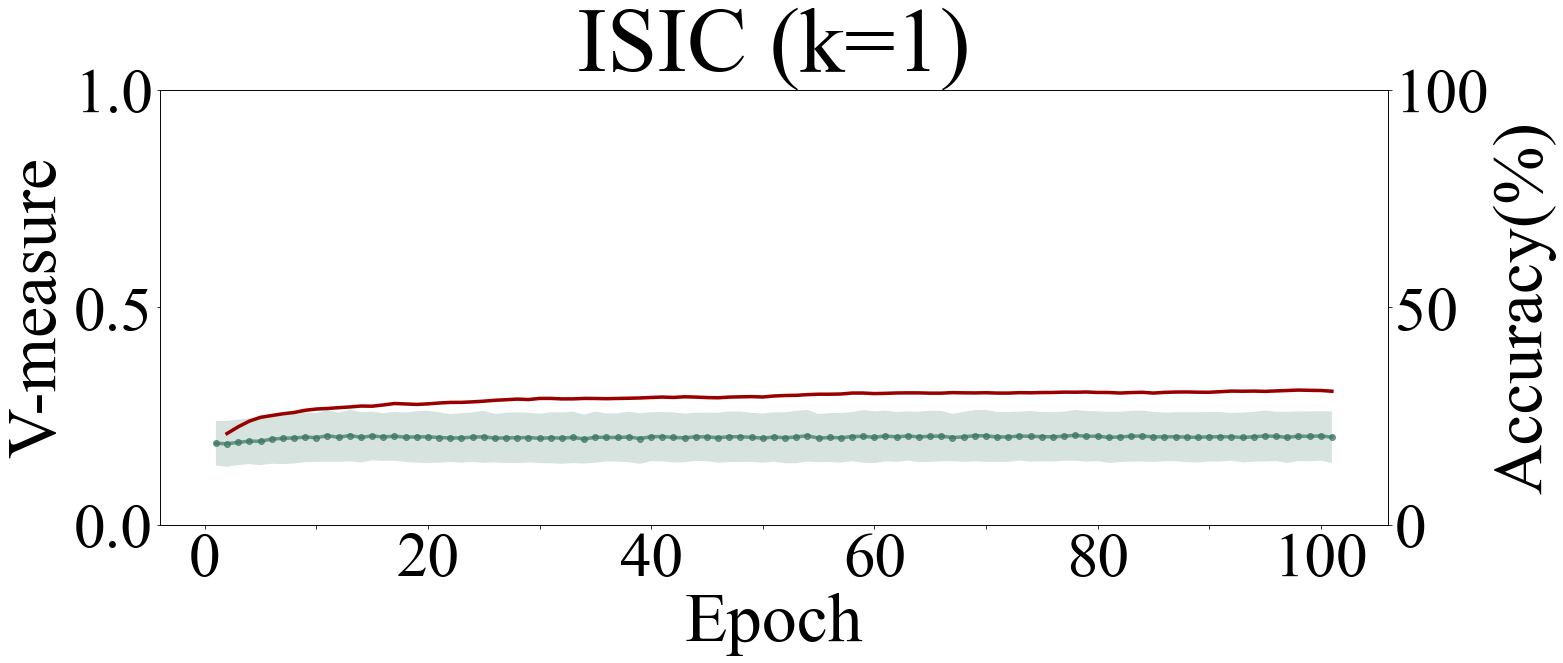

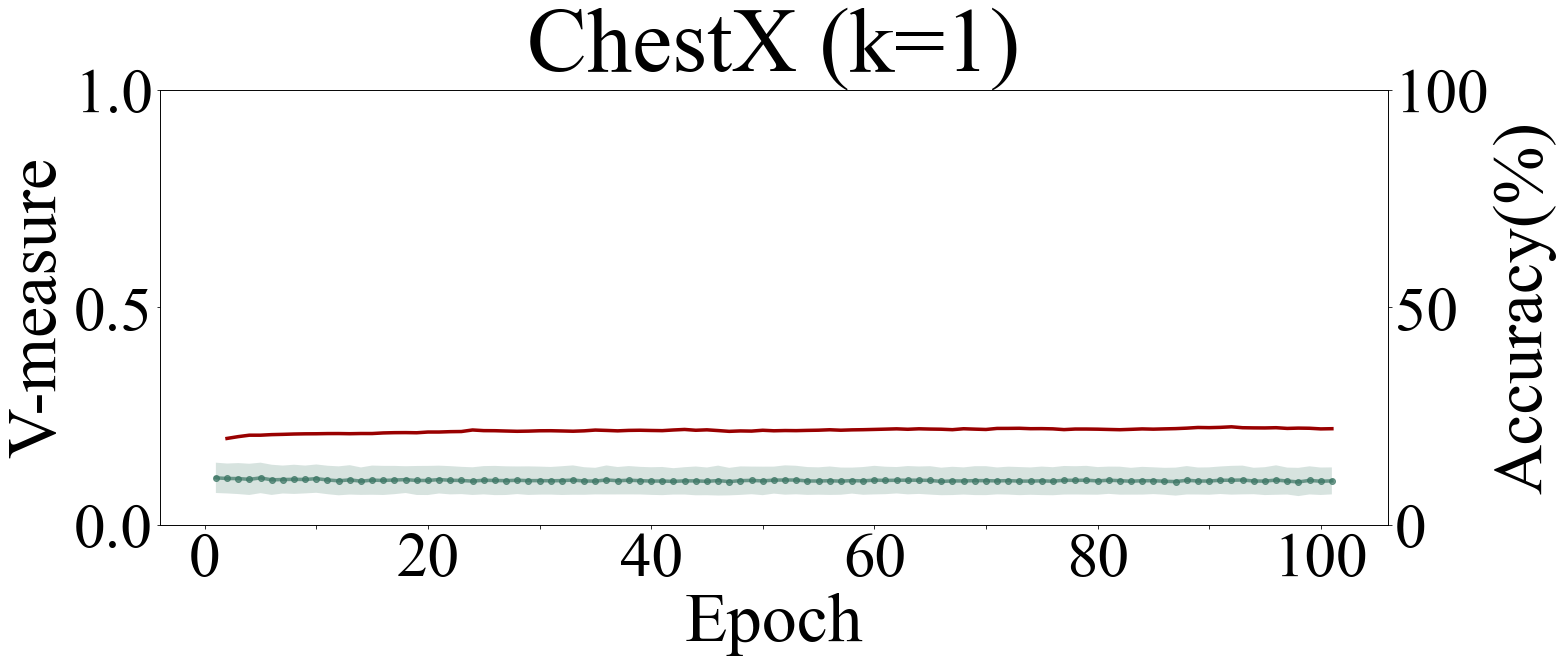

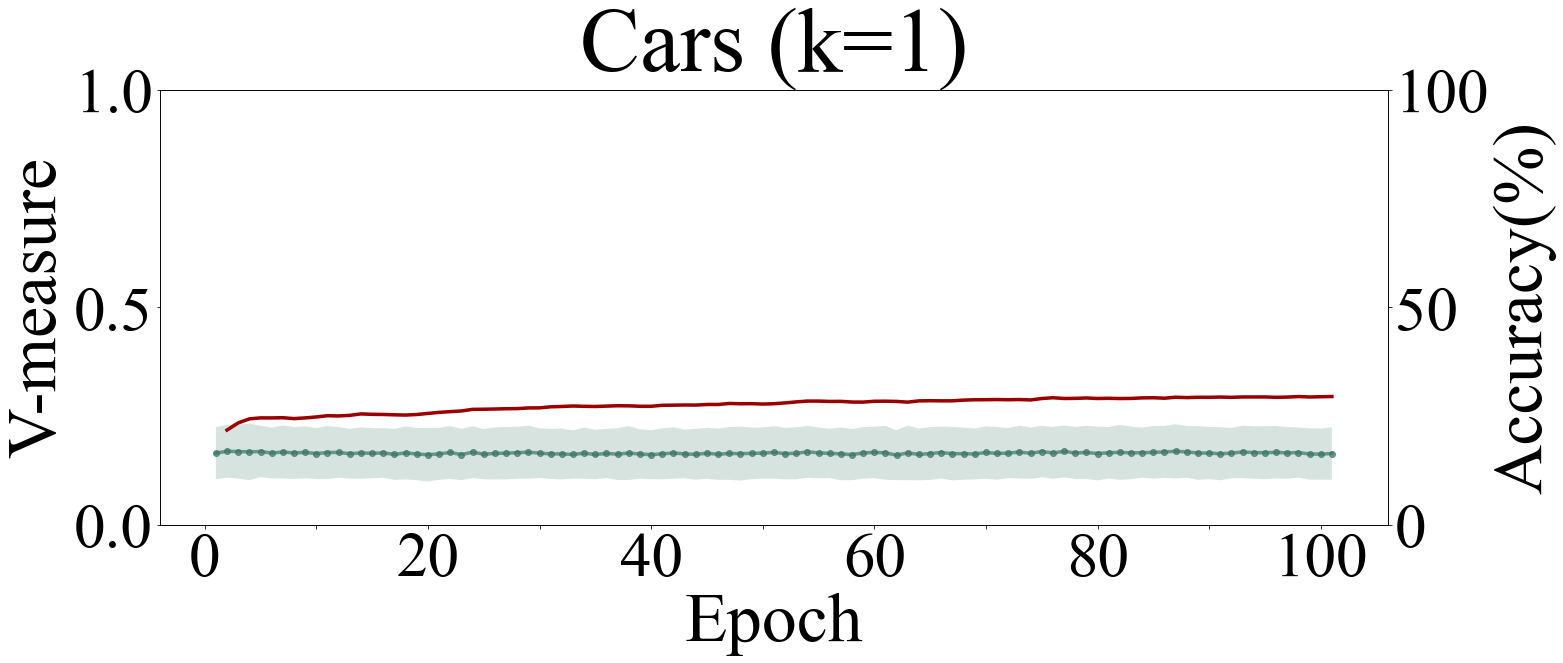

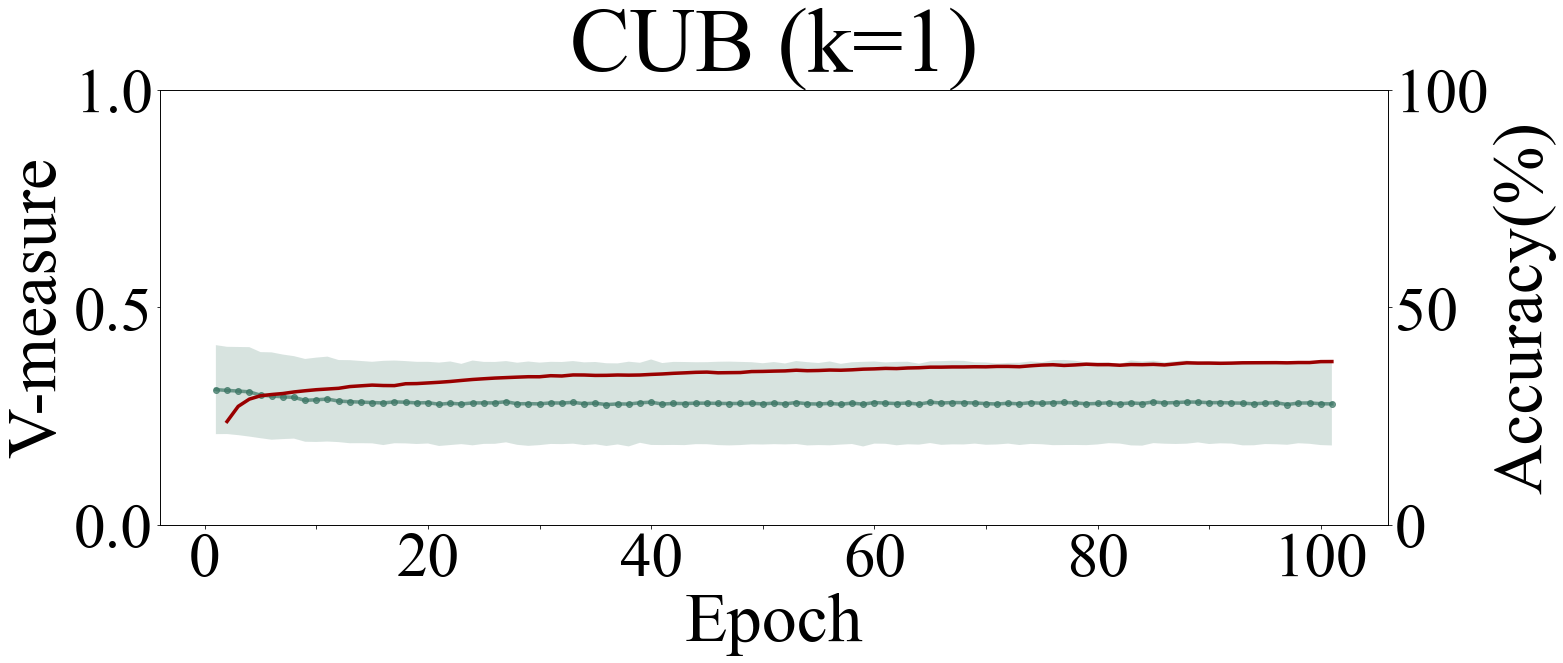

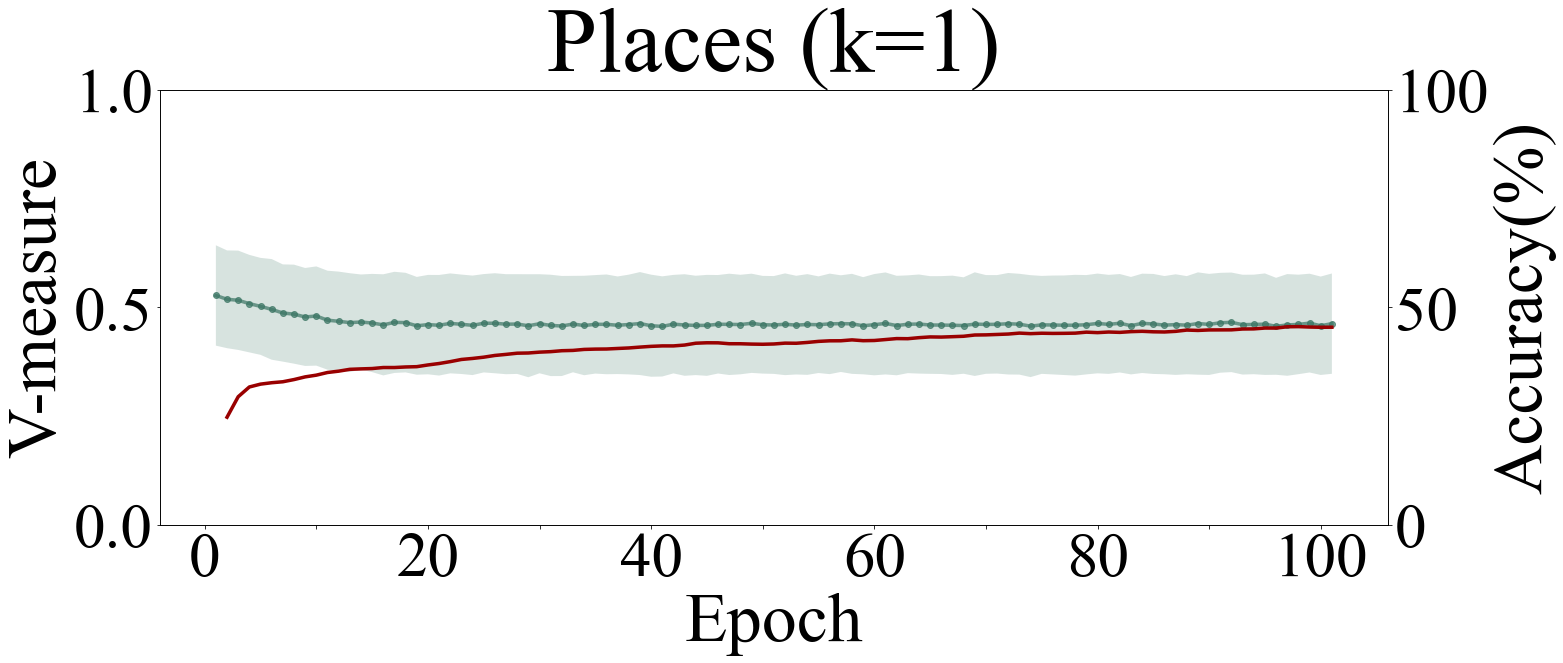

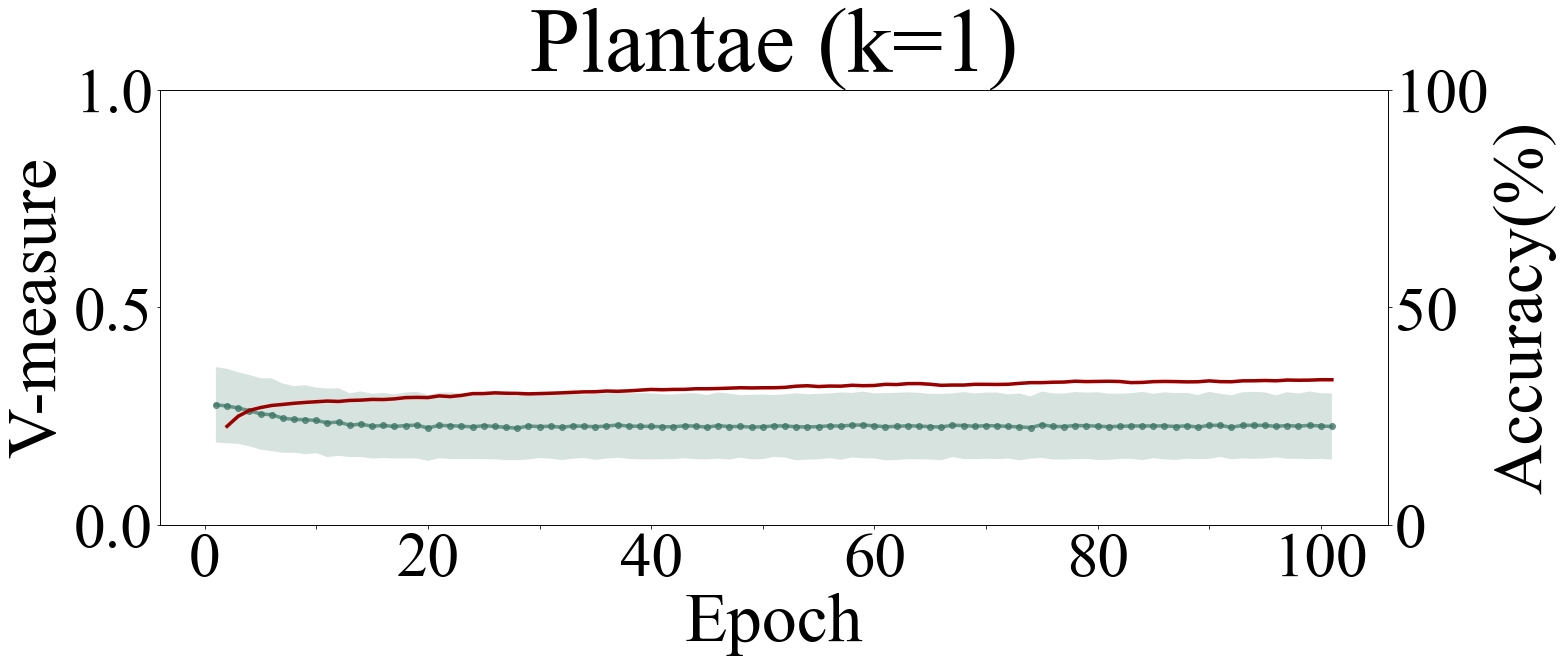

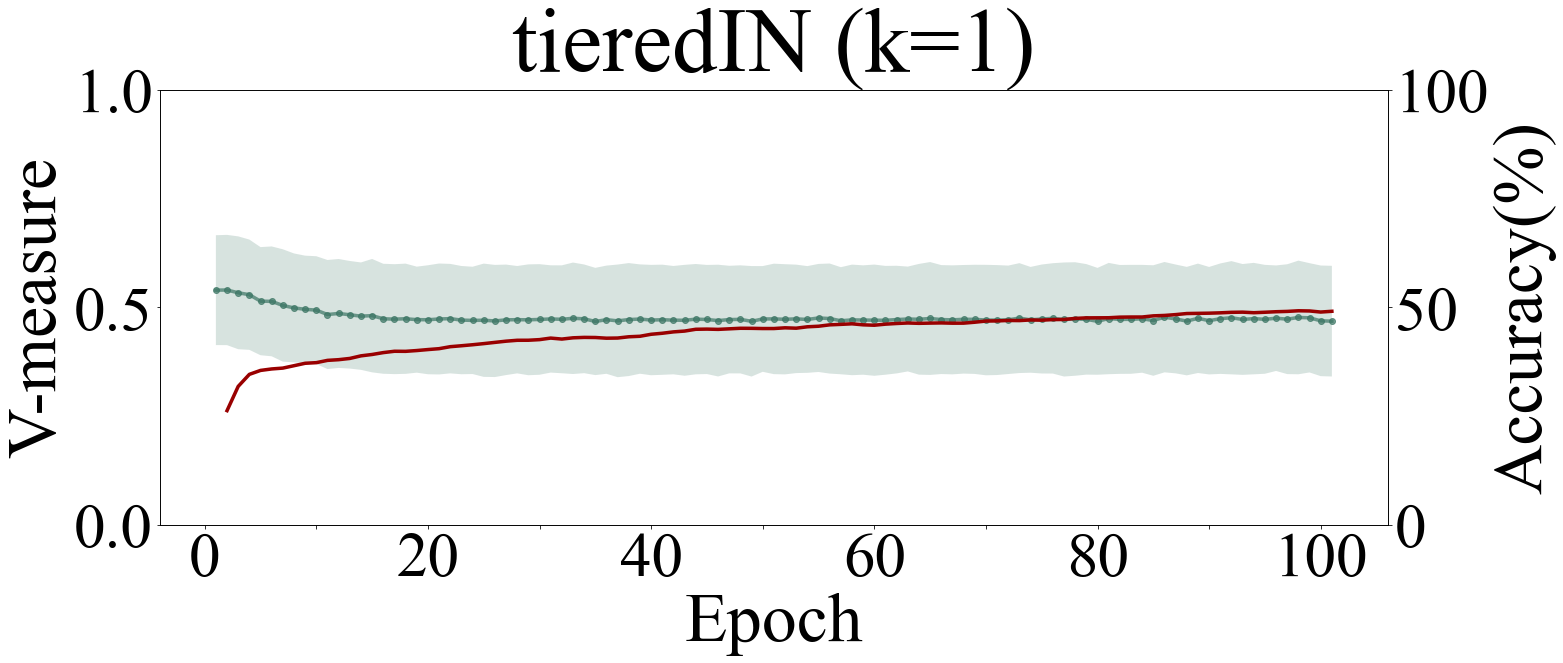

In [953]:
for idx, data in enumerate(datas+datas_fg):
    fig, ax1 = plt.subplots(figsize = (22, 8))
    v_score = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/v_score_query.csv'.format(data), index_col='Unnamed: 0')
    #v_score_s = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/v_score_support.csv'.format(data), index_col='Unnamed: 0')

    test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/test_history.csv'.format(data), index_col='Unnamed: 0')
    test_acc['epoch0'] = None
    test_acc = test_acc.reindex(columns=['epoch{}'.format(i) for i in range(0, 101)])
    
    mu = v_score.mean()
    sigma = v_score.std()
    #mu_s = v_score_s.mean()
    #sigma_s = v_score_s.std()
    
    ax1.fill_between(v_score.columns, mu+sigma, mu-sigma, facecolor='#3a7563', alpha=0.2, label='k=20')
    #ax1.fill_between(v_score_s.columns, mu_s+sigma_s, mu_s-sigma_s, facecolor='#d38136', alpha=0.2, label='k=20')
    ax1.plot(mu, linewidth=3.5, marker='o', color = '#3a7563', alpha=0.7)
    #ax1.plot(mu_s, linewidth=3.5, marker='o', color = '#d38136')
    plt.xticks(np.arange(-1, 100, 10), ('0', '', '20', '', '40', '', '60', '', '80', '', '100'), fontsize = 70)
    ax1.set_xlabel("Epoch", fontsize=70)
    ax1.set_ylabel("V-measure", fontsize=70)
    ax1.tick_params(labelsize=63)
    ax1.set_ylim(0, 1)
    
    ax2 = ax1.twinx()
    ax2.plot(test_acc.mean()*100, linewidth=3.5, color = '#990000')
    ax2.set_ylim(0, 100)
    ax2.tick_params(labelsize=63)
    ax2.set_ylabel("Accuracy(%)", fontsize=70)
    plt.title(datas_full[idx]+" (k=1)", loc='center', fontsize = 90)
    #plt.title(data, fontsize=40)
    plt.savefig('./img_pdf/v_score/01shot_{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    # plt.legend(fontsize=20, loc=1)
#plt.close()

In [898]:
v

epoch1      0.086892
epoch2      0.088070
epoch3      0.102387
epoch4      0.052657
epoch5      0.064637
              ...   
epoch96     0.102082
epoch97     0.114755
epoch98     0.083052
epoch99     0.052206
epoch100    0.114253
Name: 600, Length: 100, dtype: float64

In [896]:
corr = []
for i in range(600):
    acc = test_acc.iloc[i,:][1:]
    v = v_score.iloc[i,:][1:]
    corr.append(stats.pearsonr(acc, v))

In [899]:
best = []
for i in range(600):
    episode = test_acc.iloc[i,:][1:]
    mx = episode.max()
    best.append(int(episode[episode==mx].index[0][5:]))
v_best = []
for i in range(600):
    episode = v_score_s.iloc[i,:][1:]
    mx = episode.max()
    v_best.append(int(episode[episode==mx].index[0][5:]))
pd.DataFrame([best, v_best]).T

0   1
0    16  36
1    49  40
2    29  33
3    43  36
4    56  36
..   ..  ..
595  34  35
596  21  35
597  64  47
598  50  33
599  87  38

[600 rows x 2 columns]

In [900]:
from scipy import stats

stats.pearsonr(best, v_best)

(0.0617331462170925, 0.13093256110372126)

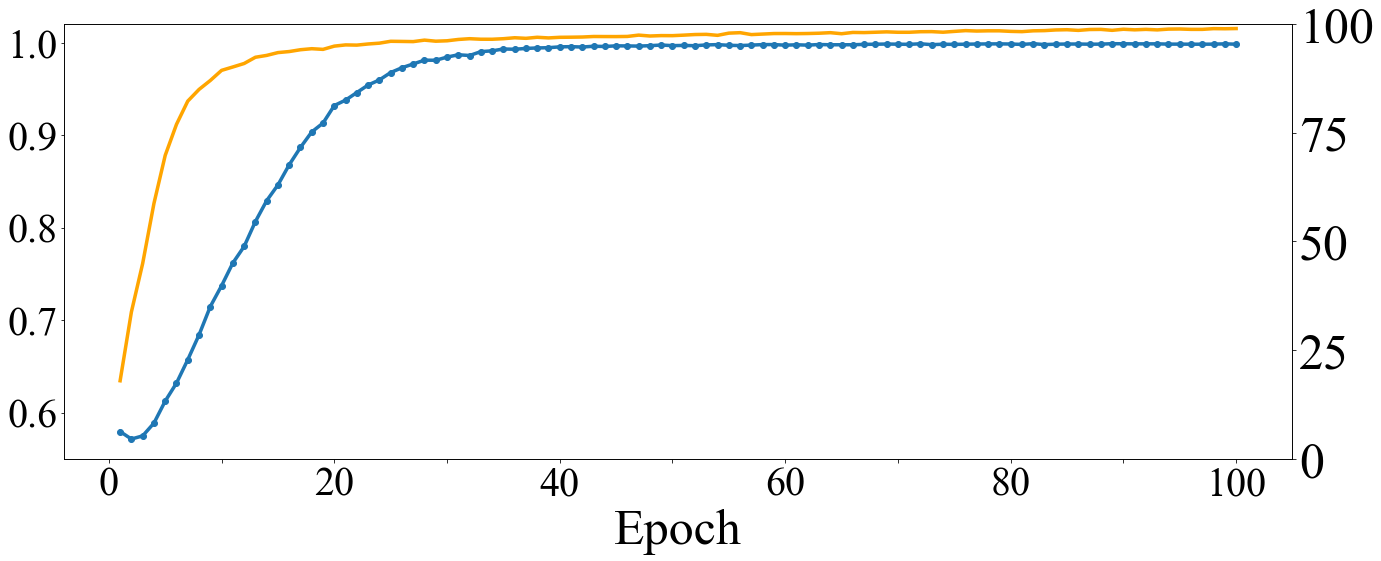

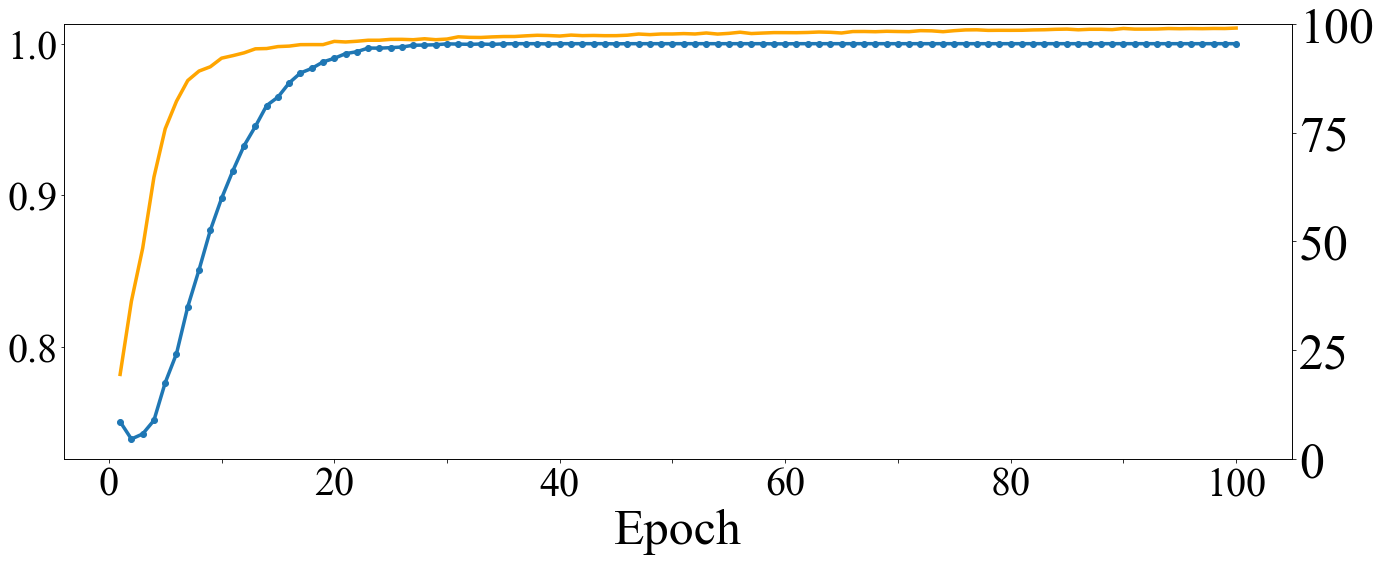

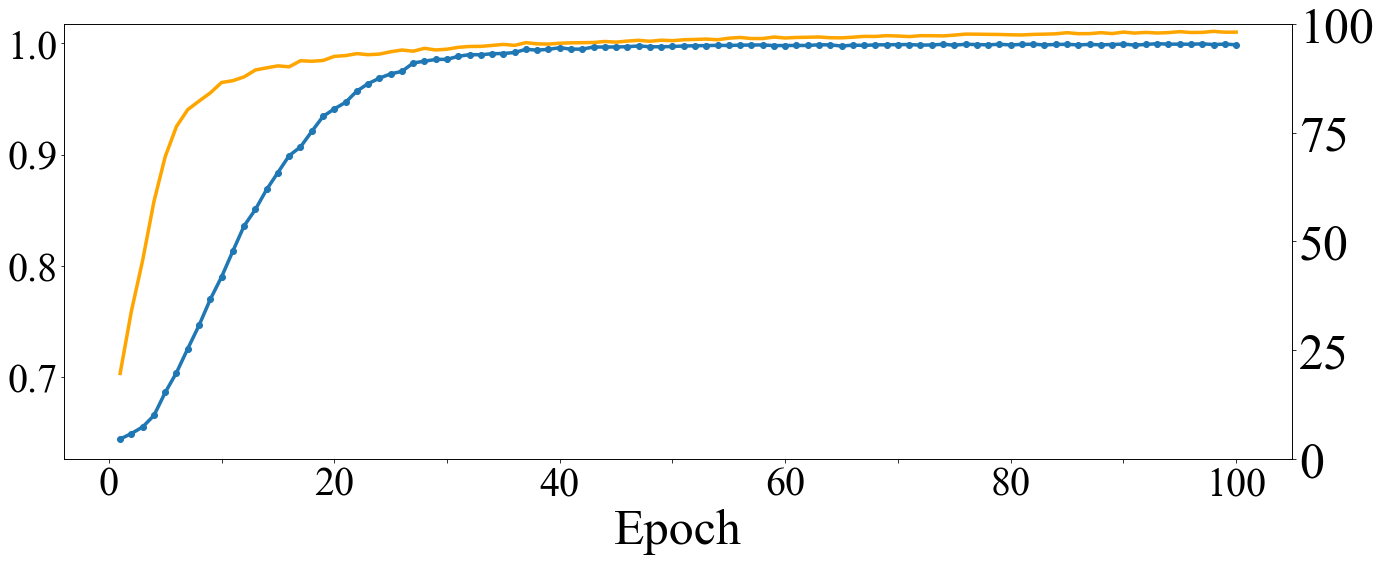

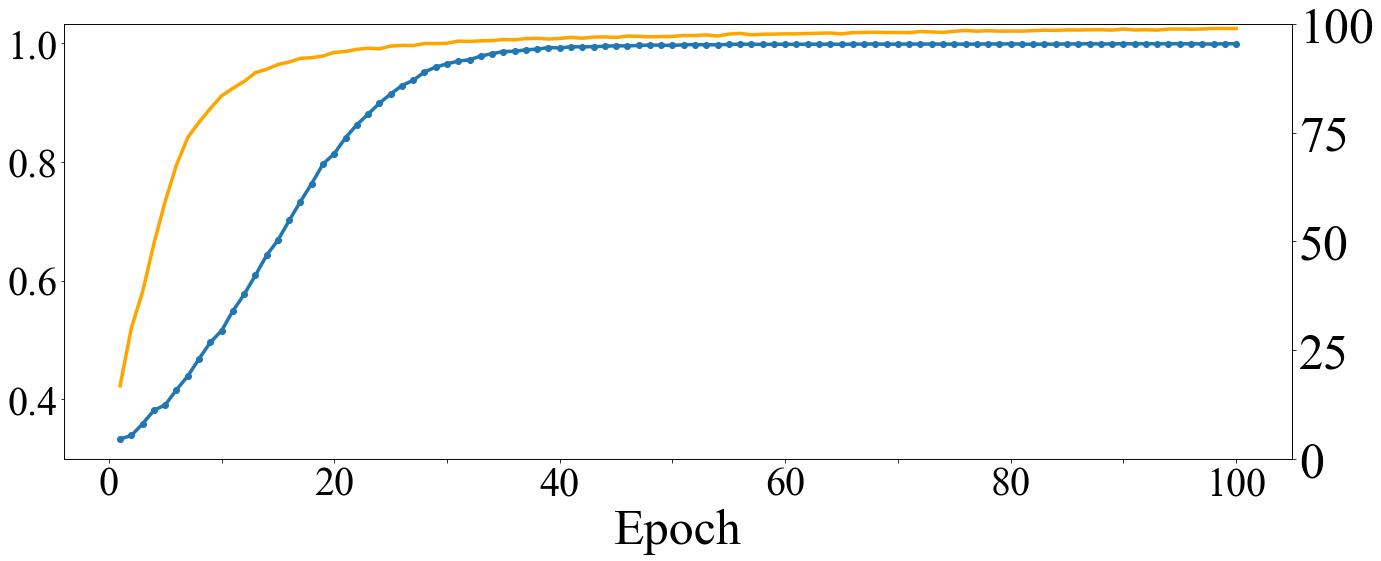

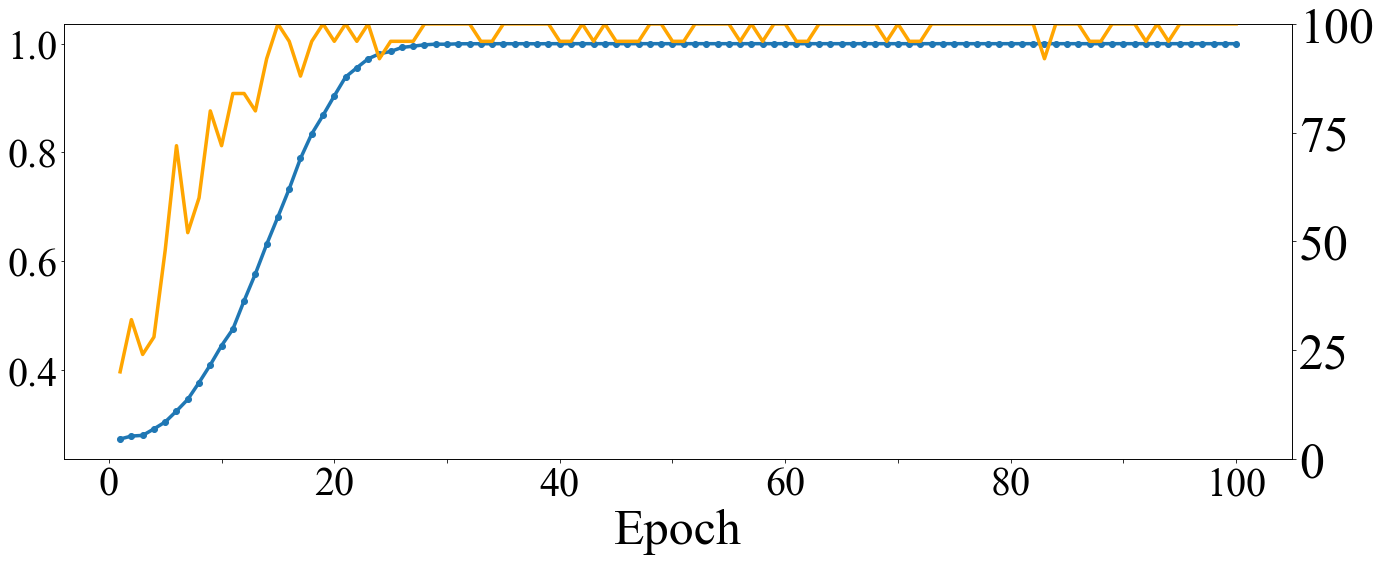

In [155]:
for data in datas:
    fig, ax1 = plt.subplots(figsize = (22, 8))
    v_score = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/v_score_support.csv'.format(data), index_col='Unnamed: 0')
    v_std = v_score.std()
    test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/train_history.csv'.format(data), index_col='Unnamed: 0')
    ax1.plot(v_score.mean(), linewidth=3.5, marker='o')
    #ax1.errorbar(v_score.columns, v_score.mean(), yerr=v_std, fmt='-o')
    plt.xticks(np.arange(-1, 100, 10), ('0', '', '20', '', '40', '', '60', '', '80', '', '100'), fontsize = 50)
    ax2 = ax1.twinx()
    ax1.tick_params(labelsize=40)
    ax2.tick_params(labelsize=50)
    ax2.plot(test_acc.mean()*100, linewidth=3.5, color = 'orange')
    ax2.set_ylim(0, 100)
    ax1.set_xlabel("Epoch", fontsize=50)
    #plt.title(data, fontsize=40)
    plt.savefig('./img_pdf/v_score/support/5shot_{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    # plt.legend(fontsize=20, loc=1)
#plt.close()


# for data in ['mini_test', 'crop','euro', 'isic']:
#     v_score = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/v_score_query.csv'.format(data), index_col='Unnamed: 0')
#     fig = plt.figure(figsize=(22,6))
#     plt.plot(v_score.mean())
#     plt.xticks(np.arange(-1, 100, 10), fontsize = 20)
#     plt.xlabel("epoch", fontsize = 40)
#     plt.yticks(fontsize = 40)
#     plt.ylabel("V measurement score", fontsize=30)
#     plt.title(data, fontsize=40)
#     plt.savefig('./img_pdf/v_score/query/5shot_{}.pdf'.format(data), bbox_inches='tight', format='pdf')
#     # plt.legend(fontsize=20, loc=1)
# #plt.close()

In [ ]:
CD-FSL/logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_001shot_full_default/augmentation/base/test_history.csv

In [146]:
df = pd.DataFrame(None, index= datas, columns= ['1shot', '5shot'] )
for data in datas:
    for shot in ['1shot', '5shot']:
        v_score = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_full_default/v_score_query.csv'.format(data,shot), index_col='Unnamed: 0')
        init = v_score.iloc[:, 0].mean()
        final = v_score.iloc[:, -1].mean()
        diff = (final-init)/init * 100
        result = "{:.3f}, {:.3f}, ({:.3f}%)".format(init, final, diff)
        df.loc[data][shot] = result

In [147]:
df

1shot                    5shot
mini_test  0.572, 0.490, (-14.460%)   0.574, 0.600, (4.444%)
crop        0.792, 0.736, (-7.181%)   0.794, 0.868, (9.402%)
euro        0.644, 0.616, (-4.343%)  0.648, 0.730, (12.741%)
isic         0.187, 0.206, (9.671%)  0.188, 0.271, (43.987%)
chest       0.108, 0.101, (-6.049%)  0.108, 0.105, (-3.059%)